# Exploratory data analysis (EDA)


## Dataset: Used Car Price

### 1. Problem Statement

### Description of the Dataset


- Context:
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]



- Content:
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.



- The data set includes information about:


Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration
To explore this type of models and learn more about the subject.

#### Importing packages        

In [1]:
import os
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
missing_values = ["n/a", "na", "--",'null','',' ','NA','?','NaN']
data=pd.read_csv(r'C:\Users\PKK\Desktop\EDA\telco-customer-churn\Dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv',na_values=missing_values)

In [3]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

### Understanding the  Dataset
### General Information about Dataset

In [6]:
#calling predefined methods
from dataset_info import Dataset_inspection,Outlier_analysis
from plots import Graphical_analysis

#calling method to get information about dataset
Dataset_inspection(data).dataset_info()



Shape of Dataset (7043, 21)

Number of Rows 7043 
Number of Columns:  21

Feature Names : 
 ['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']

Information about Datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null  

Any missing datapoints in dataset: True
Columnwise missing data present in the dataset
              total_missing_count  percentage_missing datatype
TotalCharges                   11            0.156183  float64

 
 Total percentage of missing data : 0.00743730688356558  % 


 Total percentage of rows affected by missing data : 0.1561834445548772 % 



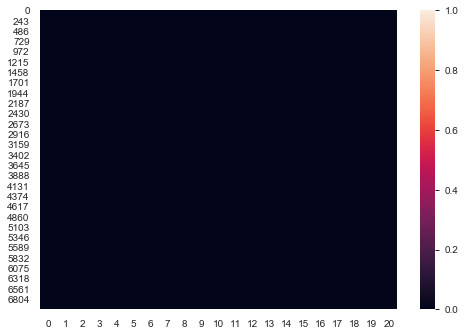

In [7]:
#calling methods to analysis missing data

Dataset_inspection(data).missing_data_analysis()

In [8]:
#removing unnecessary columns
data.drop(columns='customerID',inplace=True)

In [10]:
numerical_data=data.select_dtypes(['int64','float64'])
categorical_data=data.select_dtypes(['object'])

### Outlier Analysis

Name of Feature : SeniorCitizen
Skewness of Feature : 1.8336327440928564


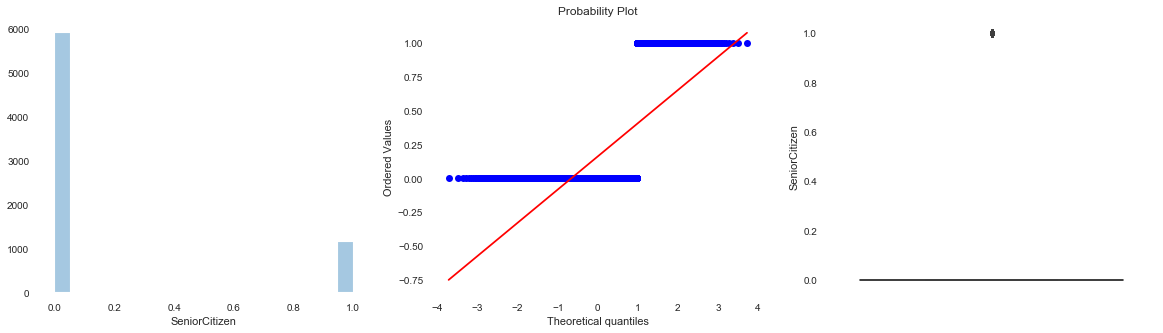

Name of Feature : tenure
Skewness of Feature : 0.2395397495619829


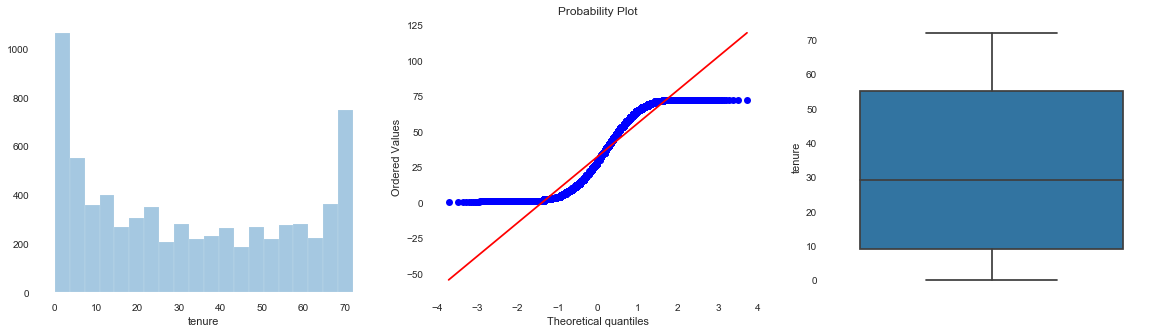

Name of Feature : MonthlyCharges
Skewness of Feature : -0.22052443394398033


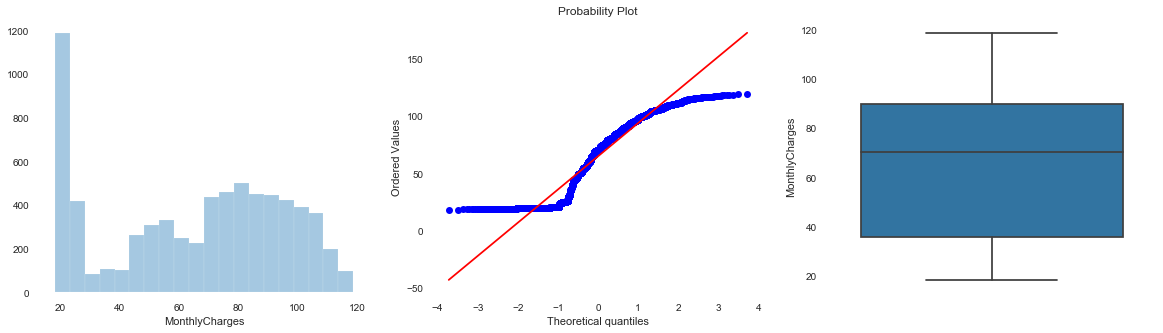

Name of Feature : TotalCharges
Skewness of Feature : 0.961642499724251


C:\Users\PKK\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\PKK\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\PKK\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


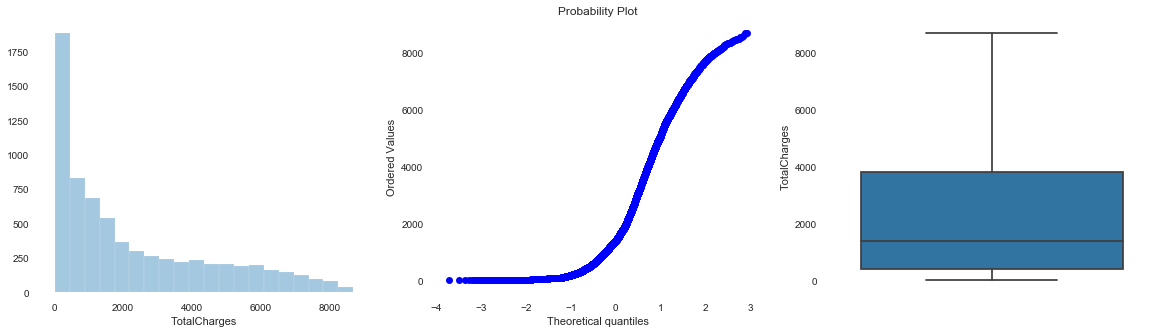


Skewness Table: 
     Feature_name  Outliers_Number  Percentage_of_Outliers  Skewness
0   SeniorCitizen             1142               16.214681  1.833633
1          tenure                0                0.000000  0.239540
2  MonthlyCharges                0                0.000000 -0.220524
3    TotalCharges                0                0.000000  0.961642 





In [11]:
#Outlier Analysis

#calling predefined method
Outlier_analysis(numerical_data).graphical_outlier_analysis()

In [26]:
#Performing Chi Square test for statistical analysis
#importing predefined methods
from statistical_analysis import Statistical_analysis
for col in categorical_data:
    Statistical_analysis.Significance_tests(data).chi_square_test(col,'Churn')

Chi square test between features:  gender  and  Churn
chi-square statistic:- 0.522366503358827
critical_value: 3.841458820694124
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.46983394114265187
p_value > 0.05 
Test Results : Retain H0,There is no relationship between 2 categorical variables 


Chi square test between features:  Partner  and  Churn
chi-square statistic:- 159.41452843242658
critical_value: 3.841458820694124
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0
p_value < 0.05 
Test Results  Reject H0,There is a relationship between 2 categorical variables 


Chi square test between features:  Dependents  and  Churn
chi-square statistic:- 189.94033391334852
critical_value: 3.841458820694124
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0
p_value < 0.05 
Test Results  Reject H0,There is a relationship between 2 categorical variables 


Chi square test between features:  PhoneService  and  Churn
chi-square statistic:- 1.0044084772333213
critic

In [27]:

#Correlation test
EDA_dataprep.correlation_plot(numerical_data)

In [19]:
#univariate analysis with dataprep library
#importing methods
from EDA_dataprep import EDA_dataprep
EDA_dataprep.univarite_numerical(data,'tenure')

In [22]:
EDA_dataprep.univariatre_multiple_plots(numerical_data)

In [28]:
from plots import Graphical_analysis

In [29]:
numerical_data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

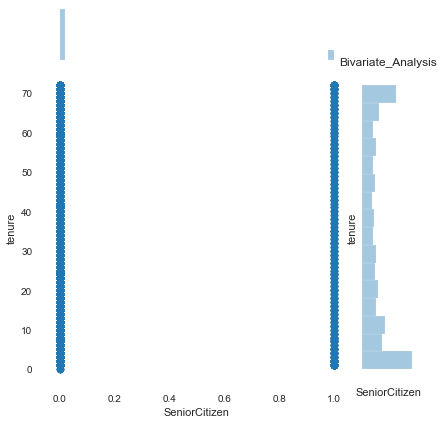

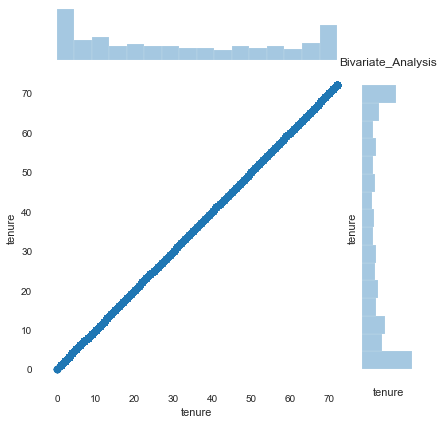

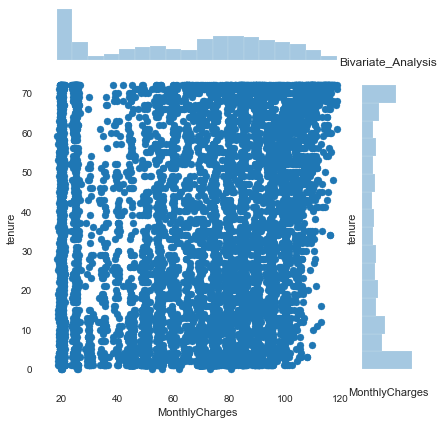

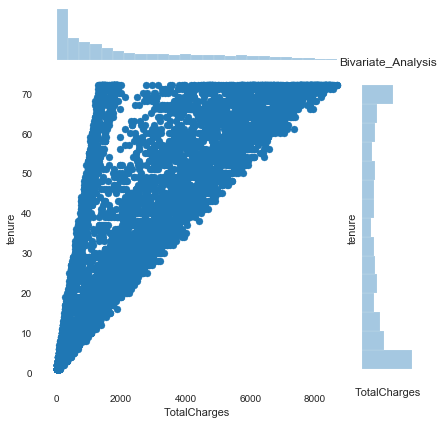

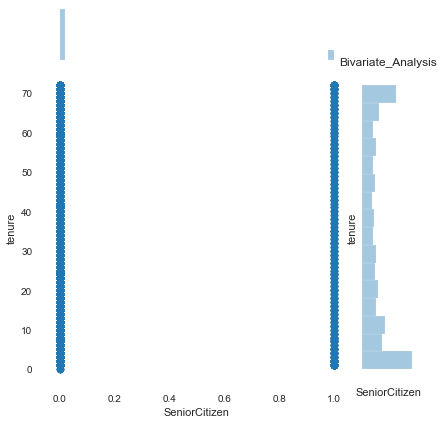

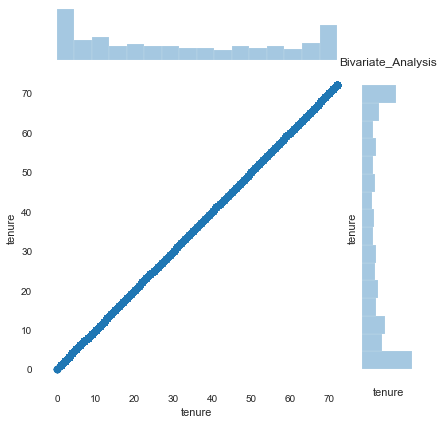

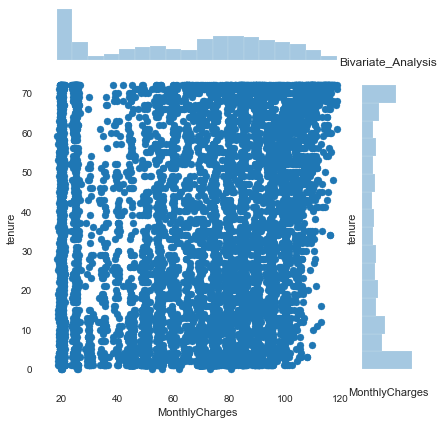

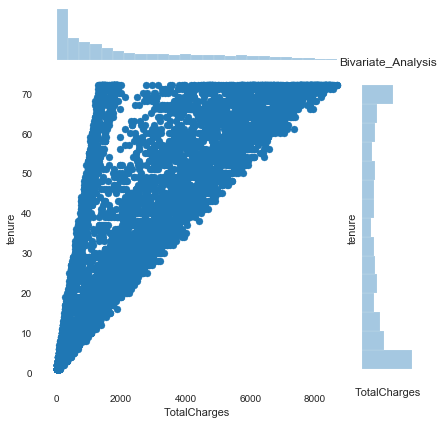

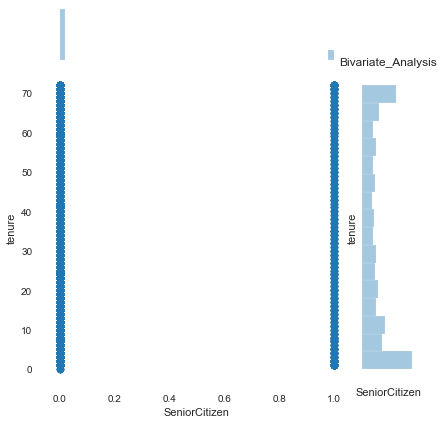

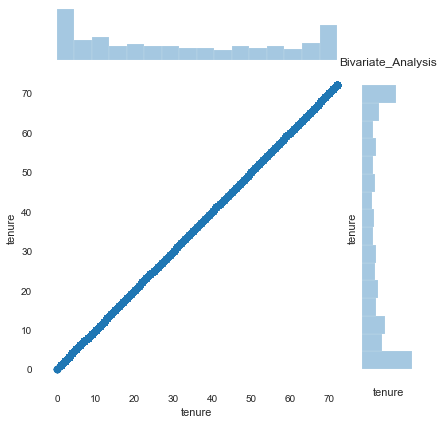

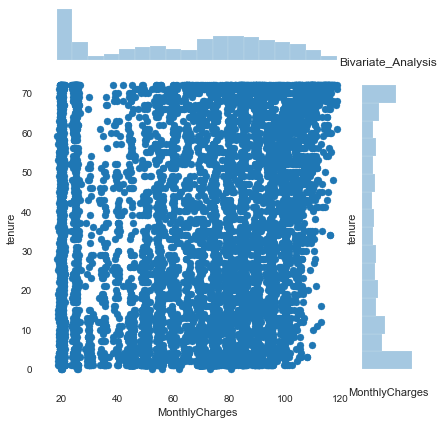

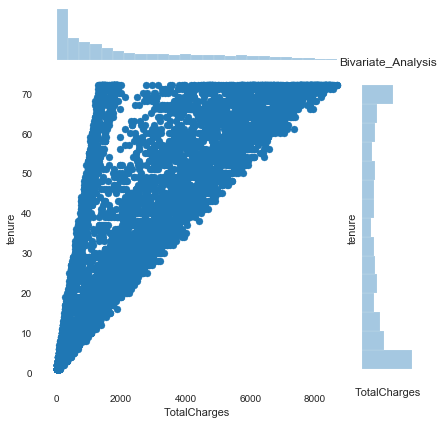

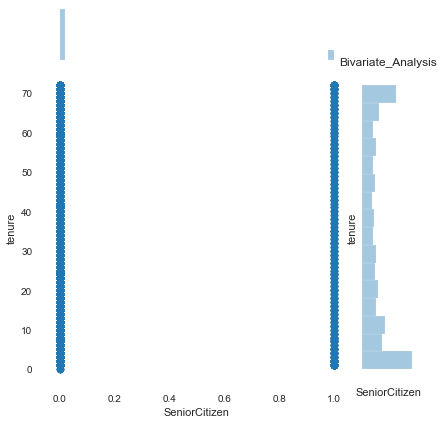

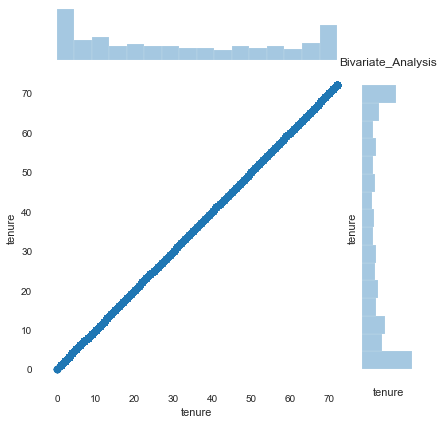

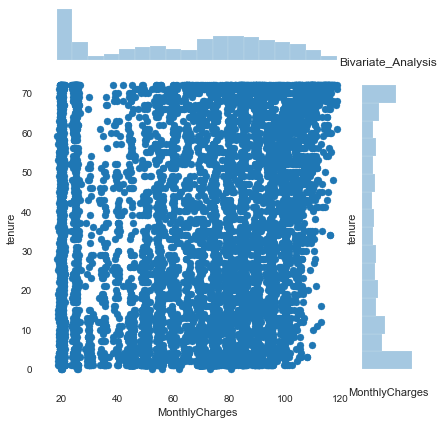

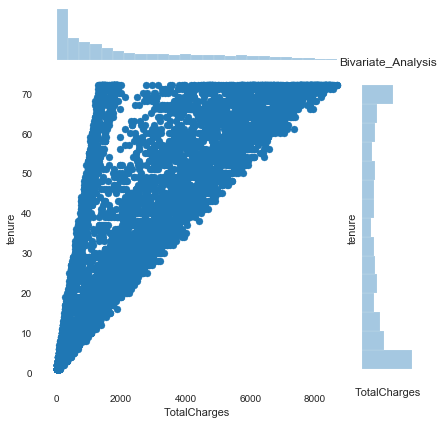

In [30]:
for col in numerical_data:
    Graphical_analysis.Numerical_data_analysis(numerical_data).bivariate_analysis_scatterplot('tenure')

Percentage of datapoints present in class : 

 Male      50.47565
Female    49.52435
Name: gender, dtype: float64


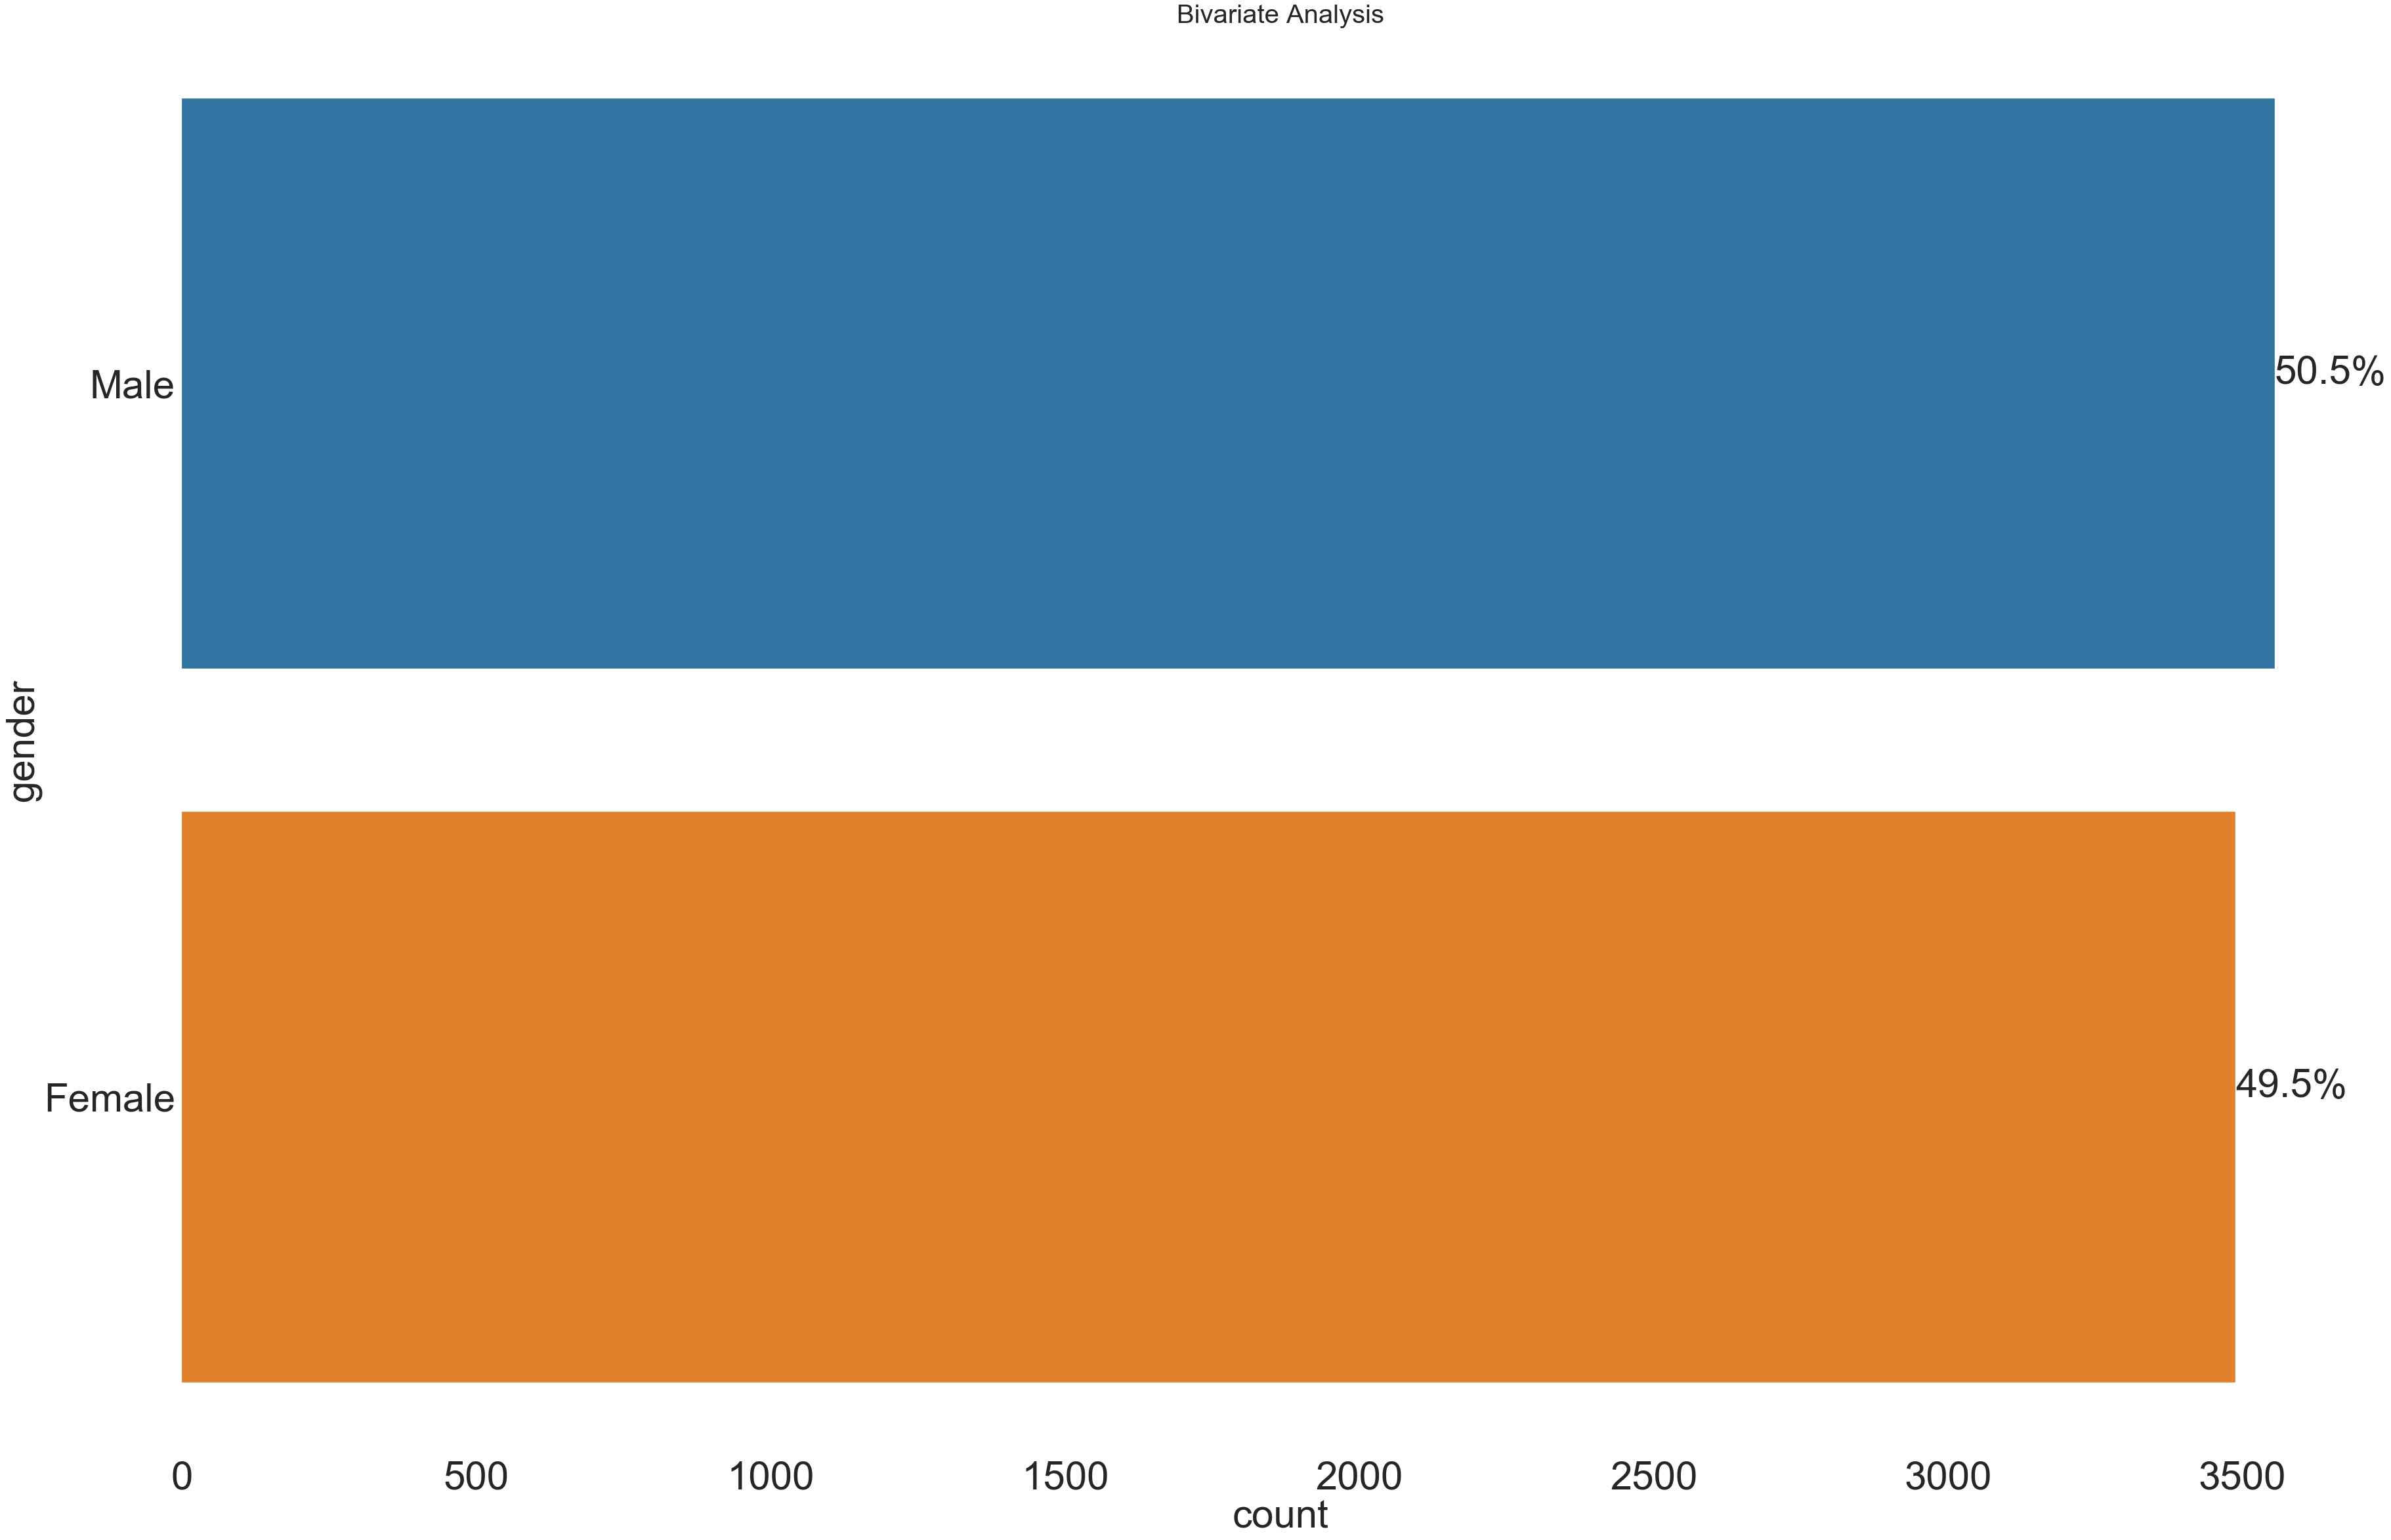

Percentage of datapoints present in class : 

 No     51.69672
Yes    48.30328
Name: Partner, dtype: float64


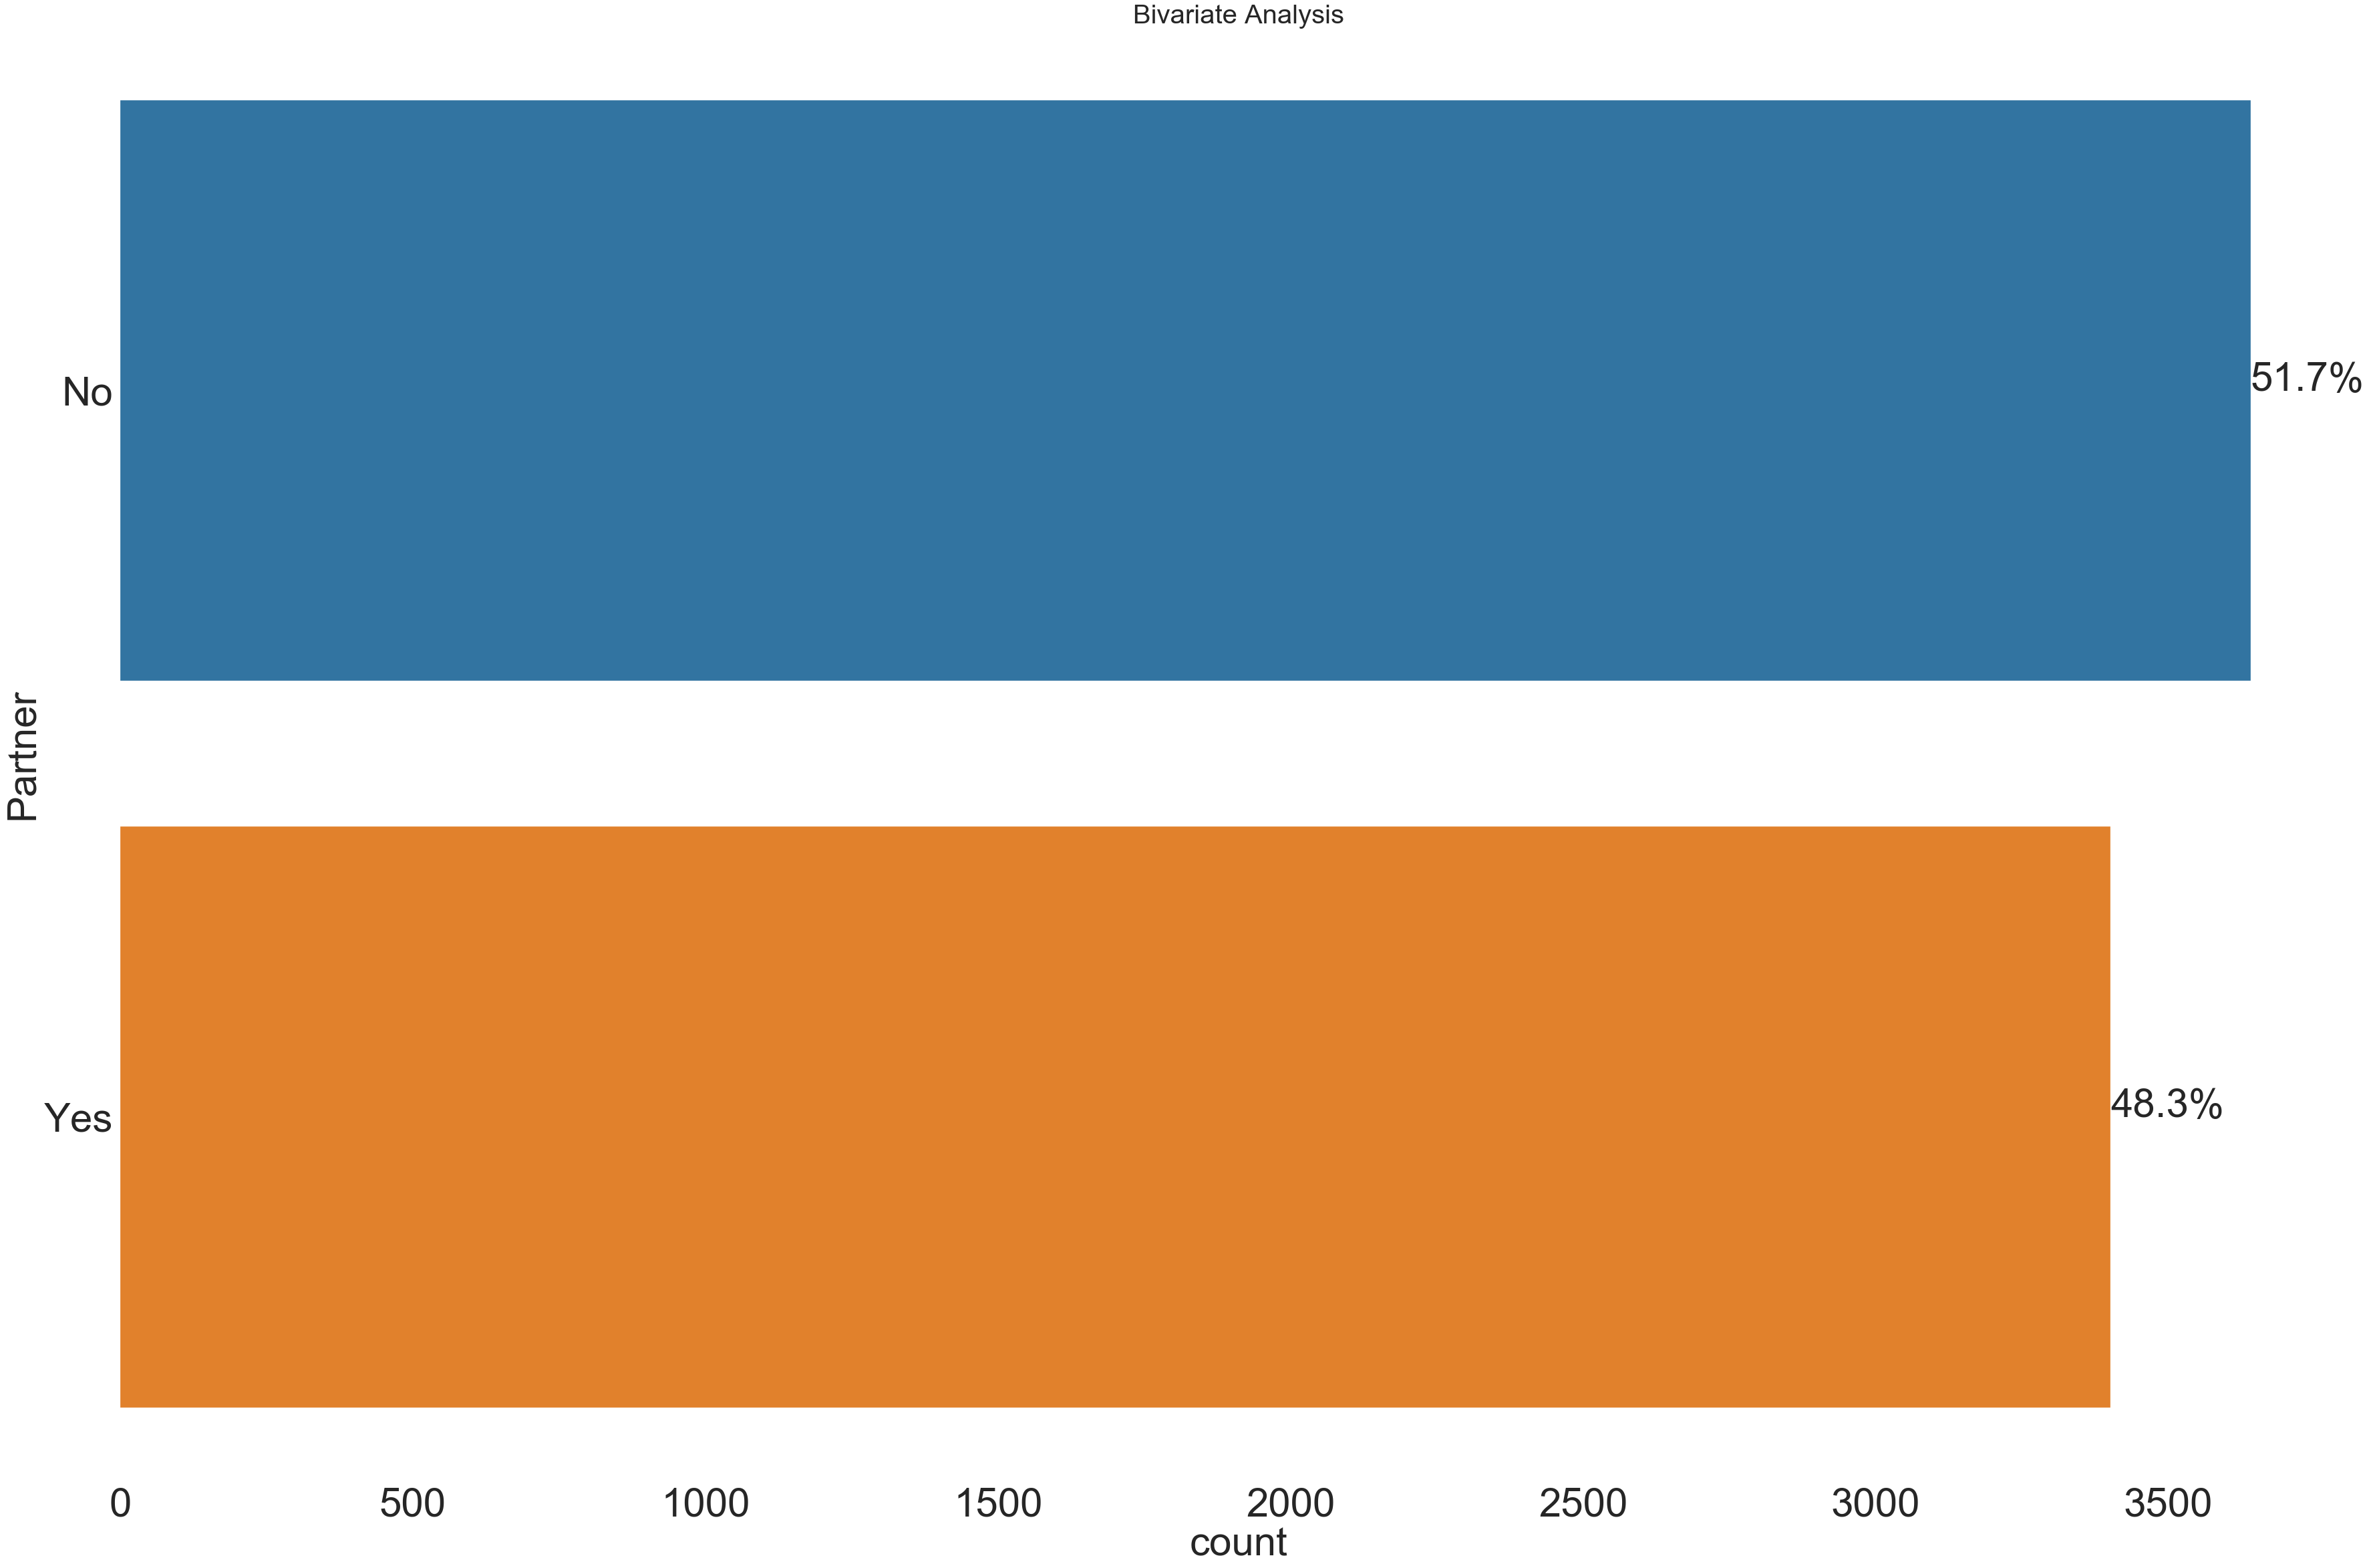

Percentage of datapoints present in class : 

 No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64


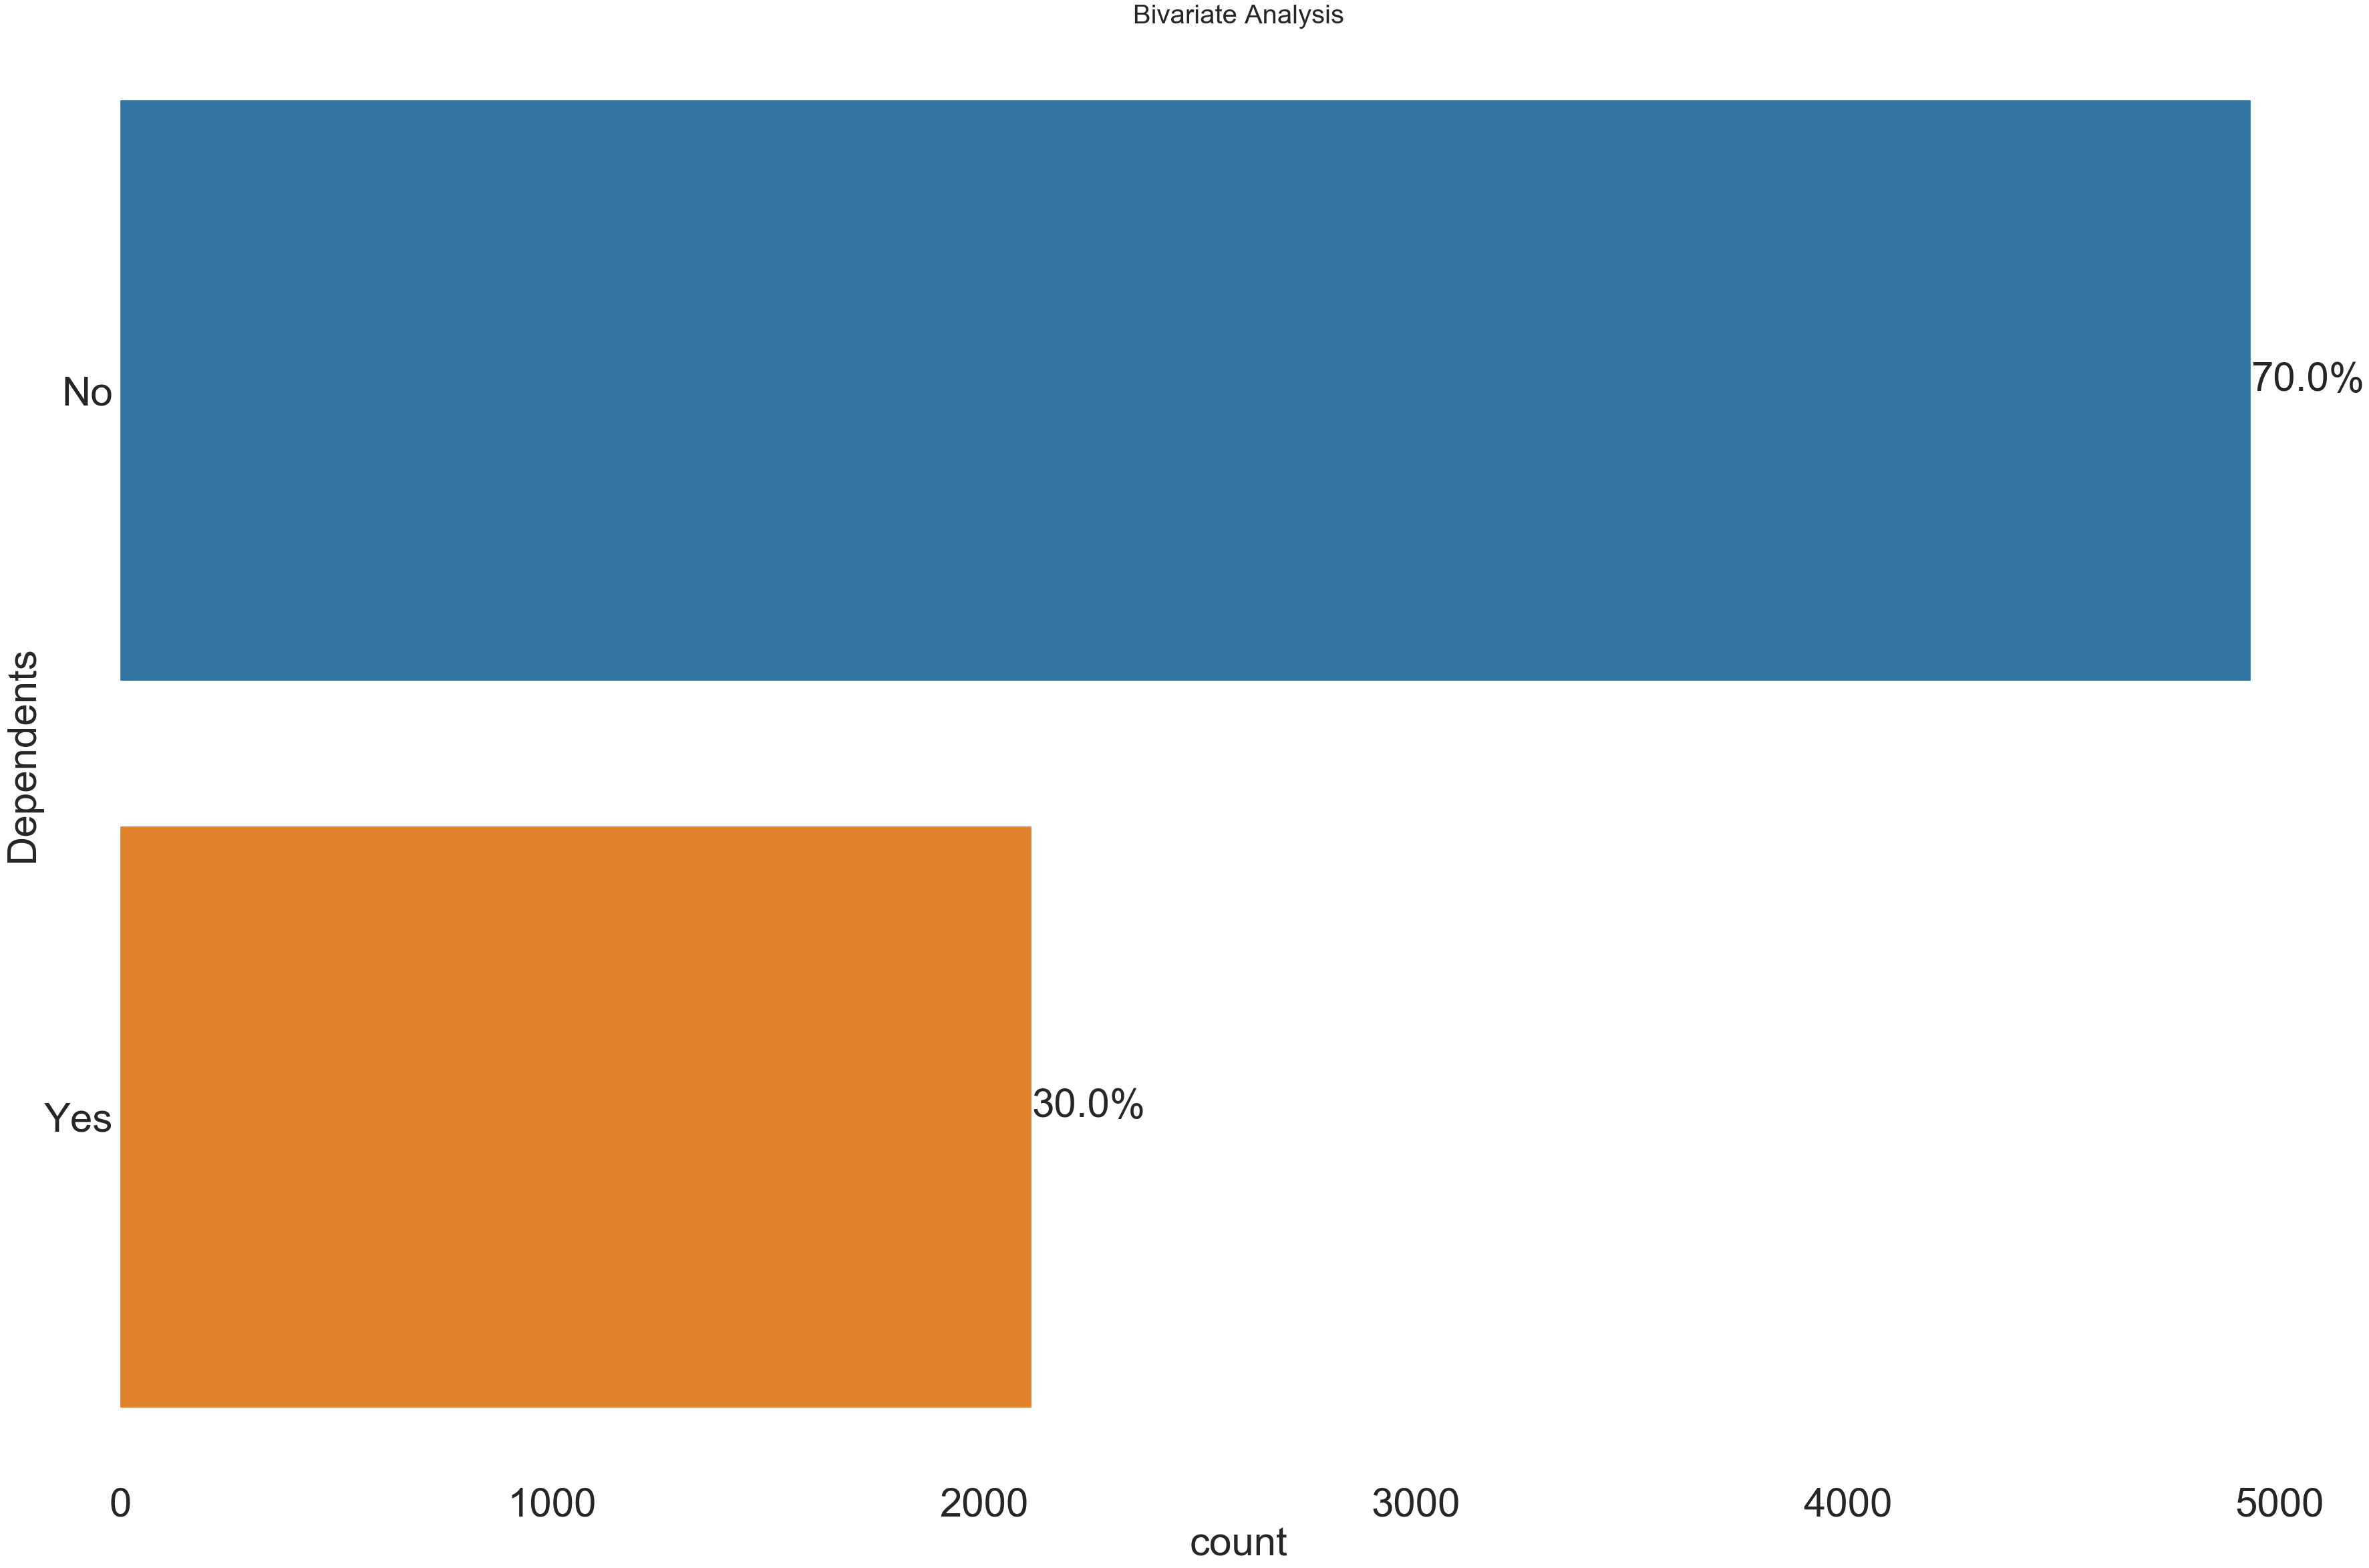

Percentage of datapoints present in class : 

 Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64


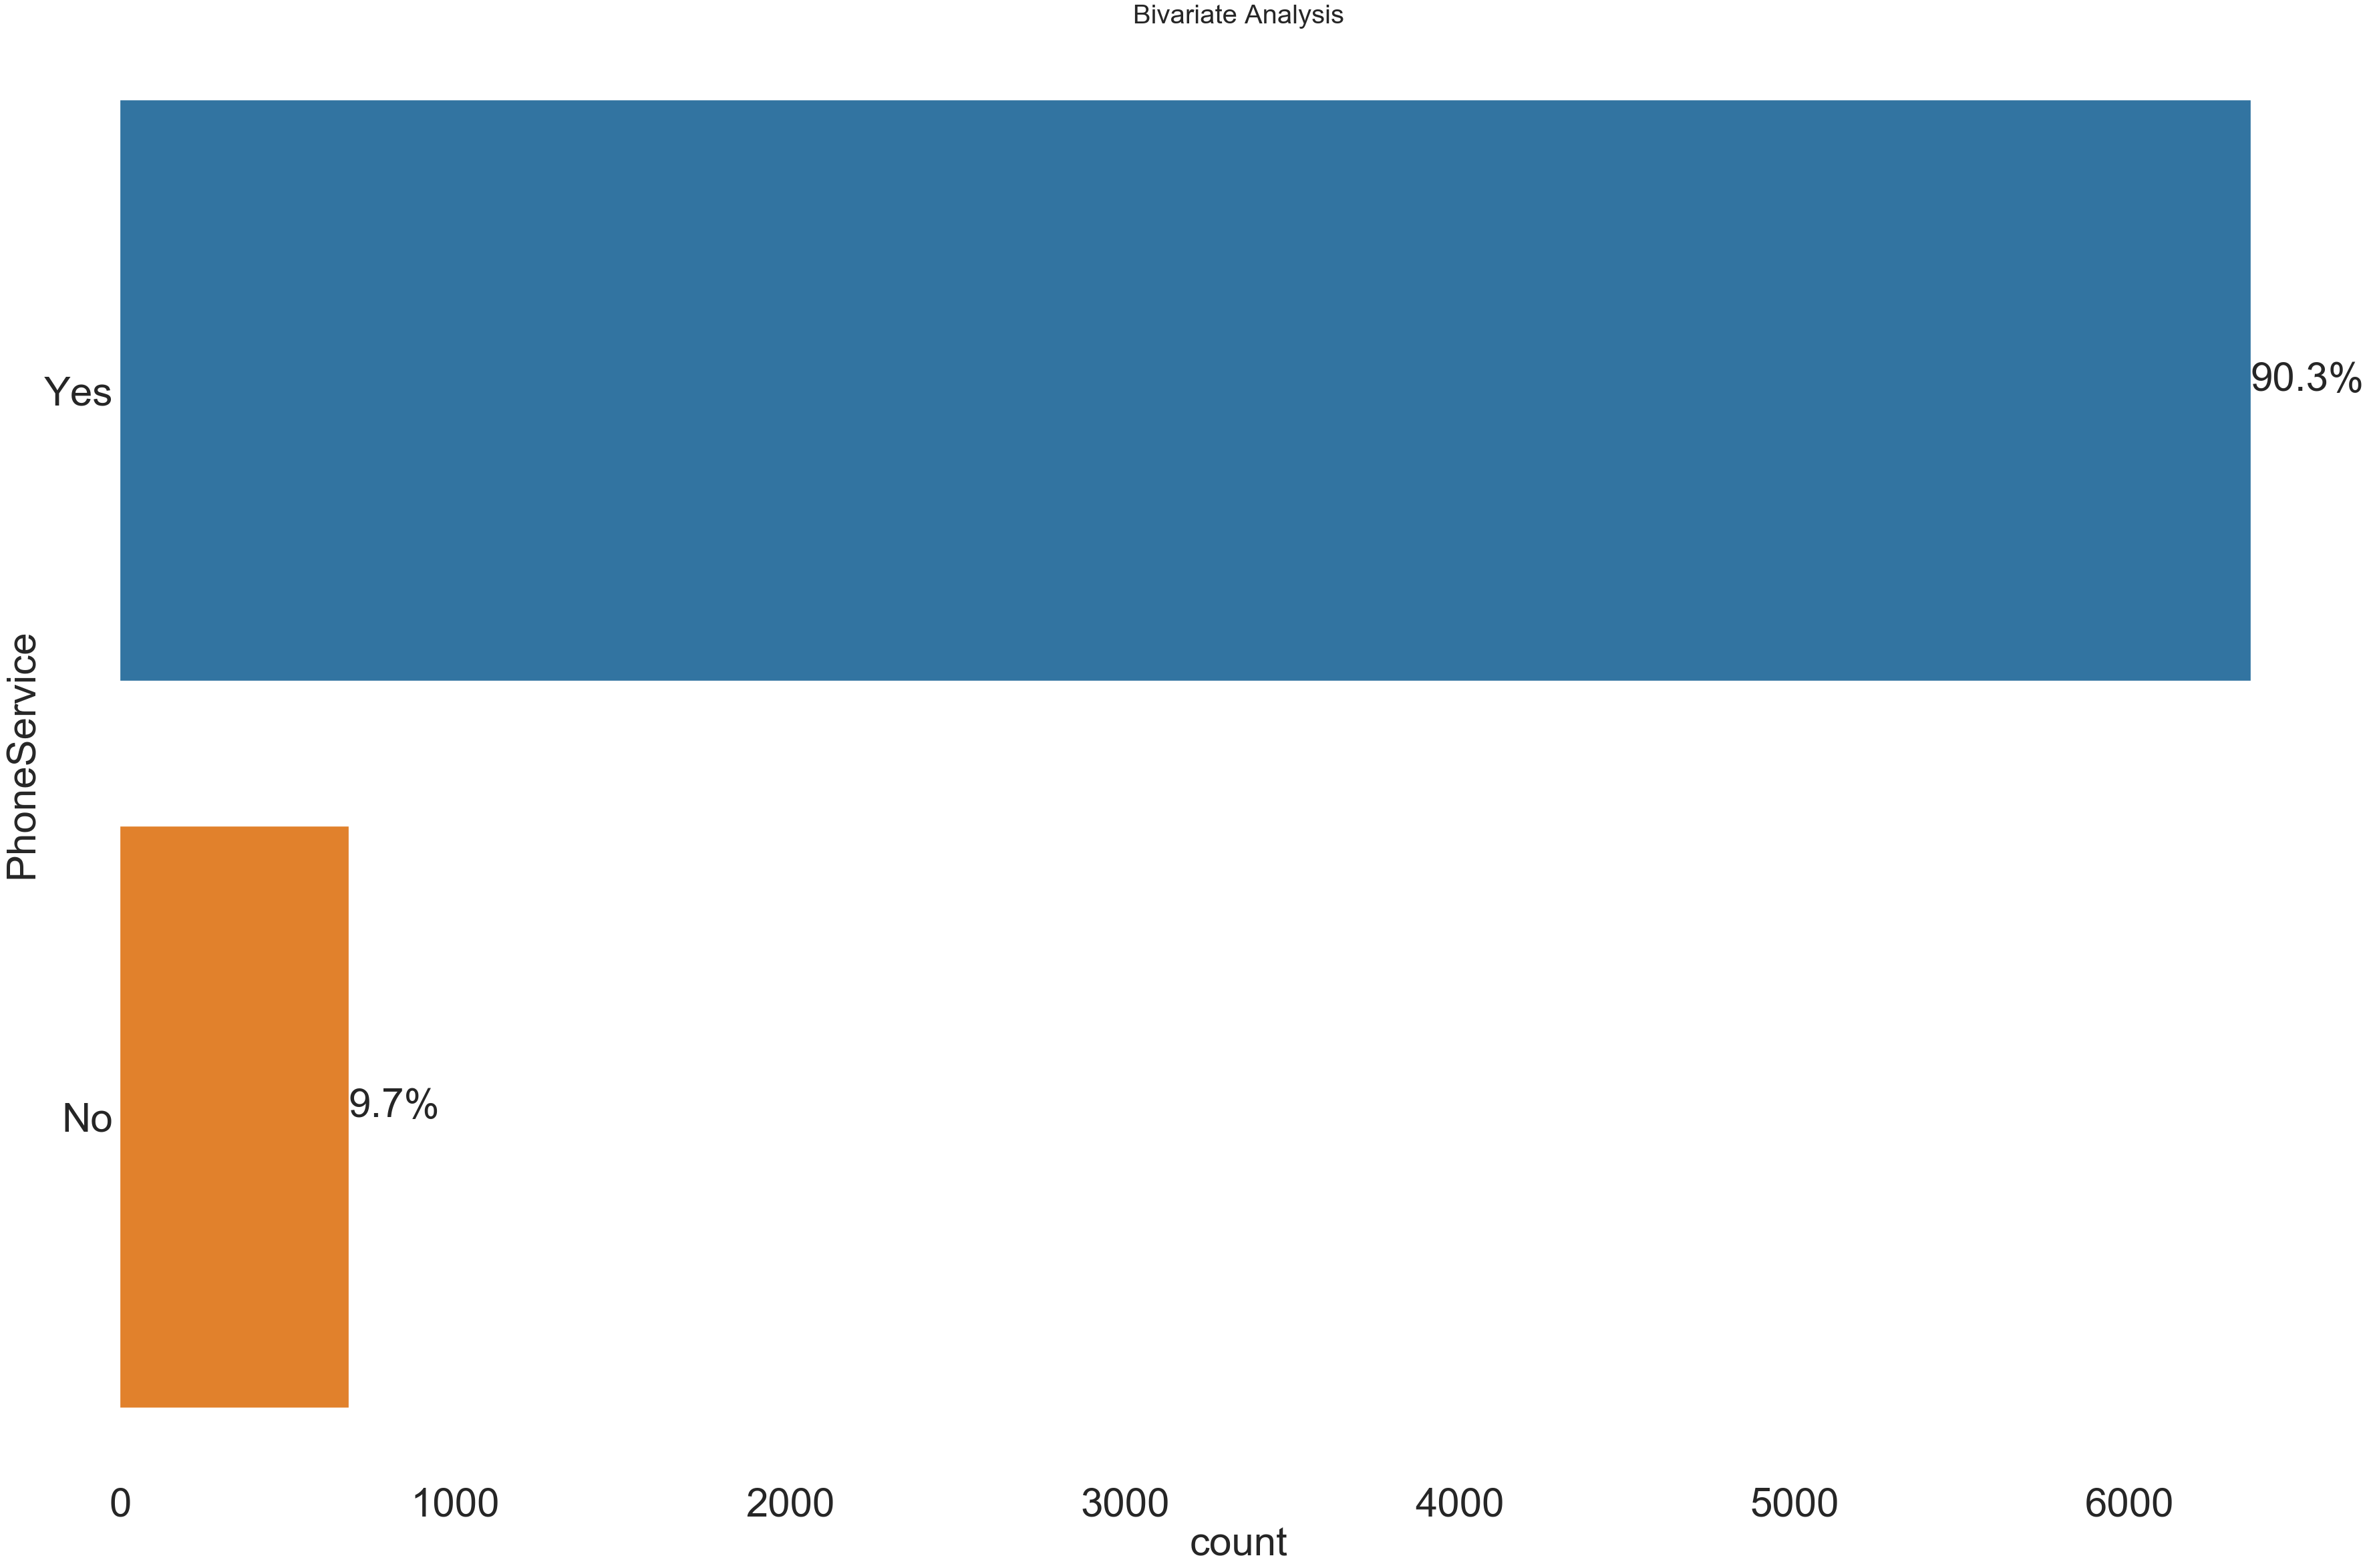

Percentage of datapoints present in class : 

 No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: MultipleLines, dtype: float64


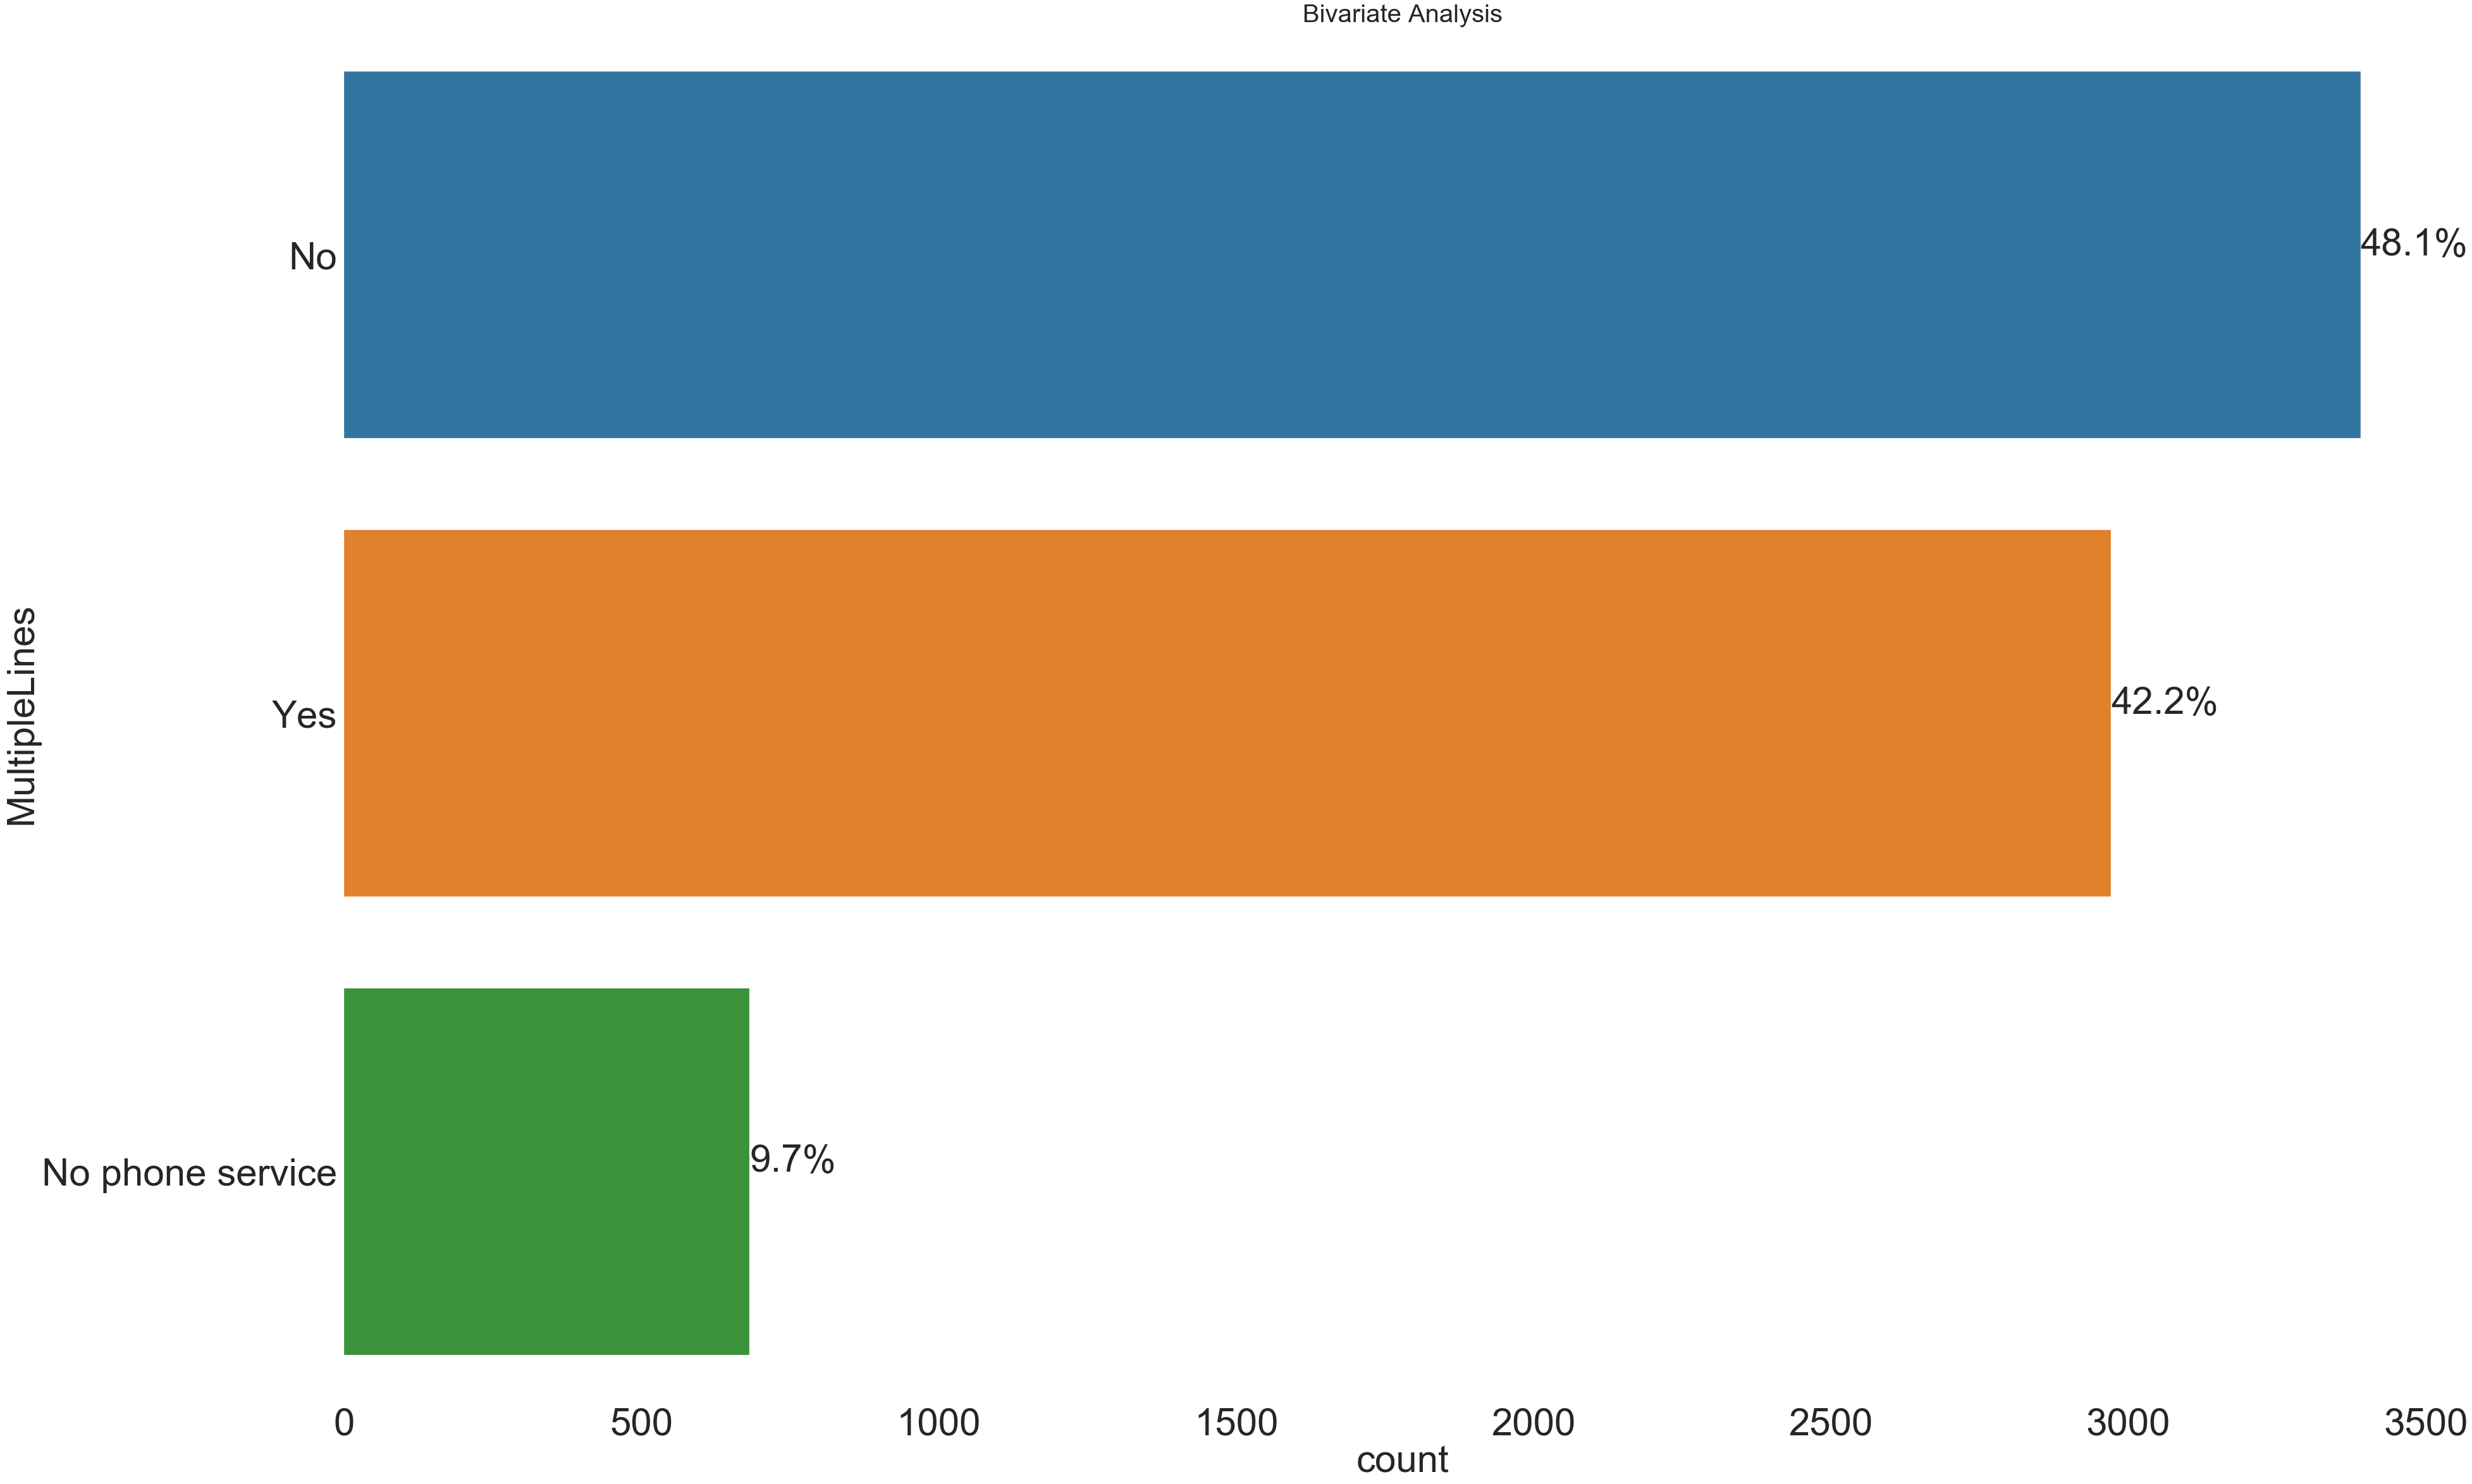

Percentage of datapoints present in class : 

 Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64


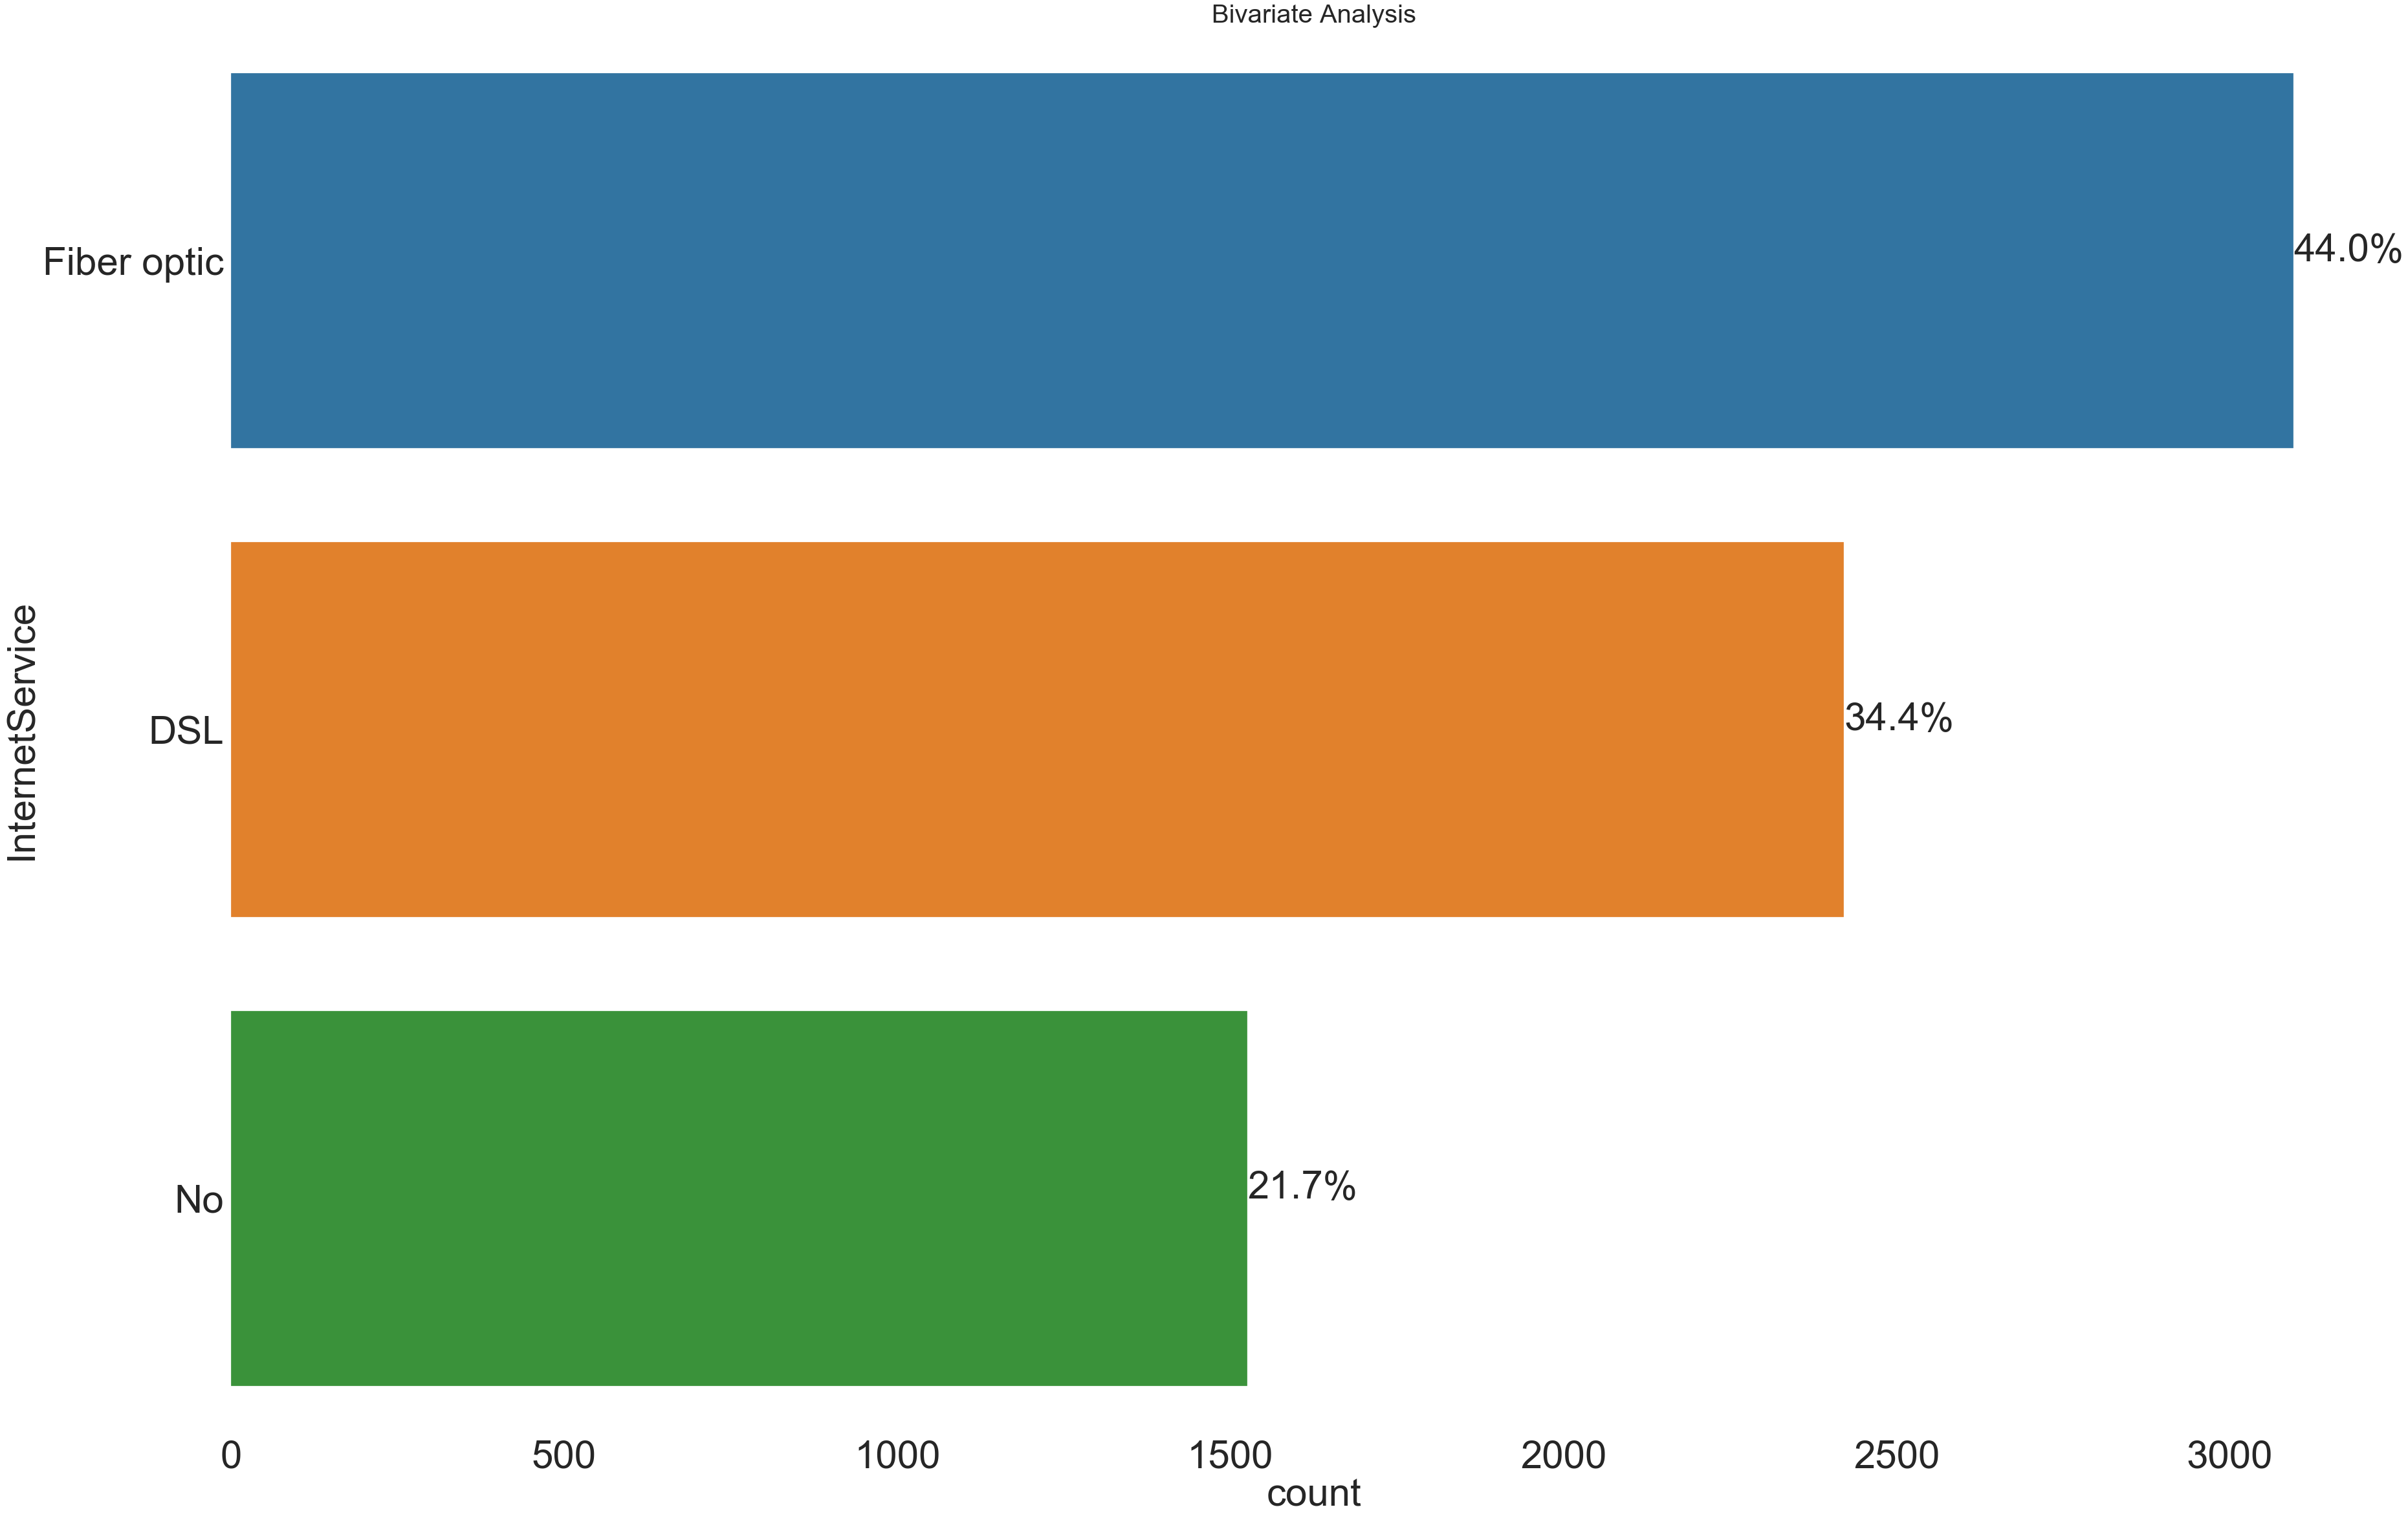

Percentage of datapoints present in class : 

 No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: OnlineSecurity, dtype: float64


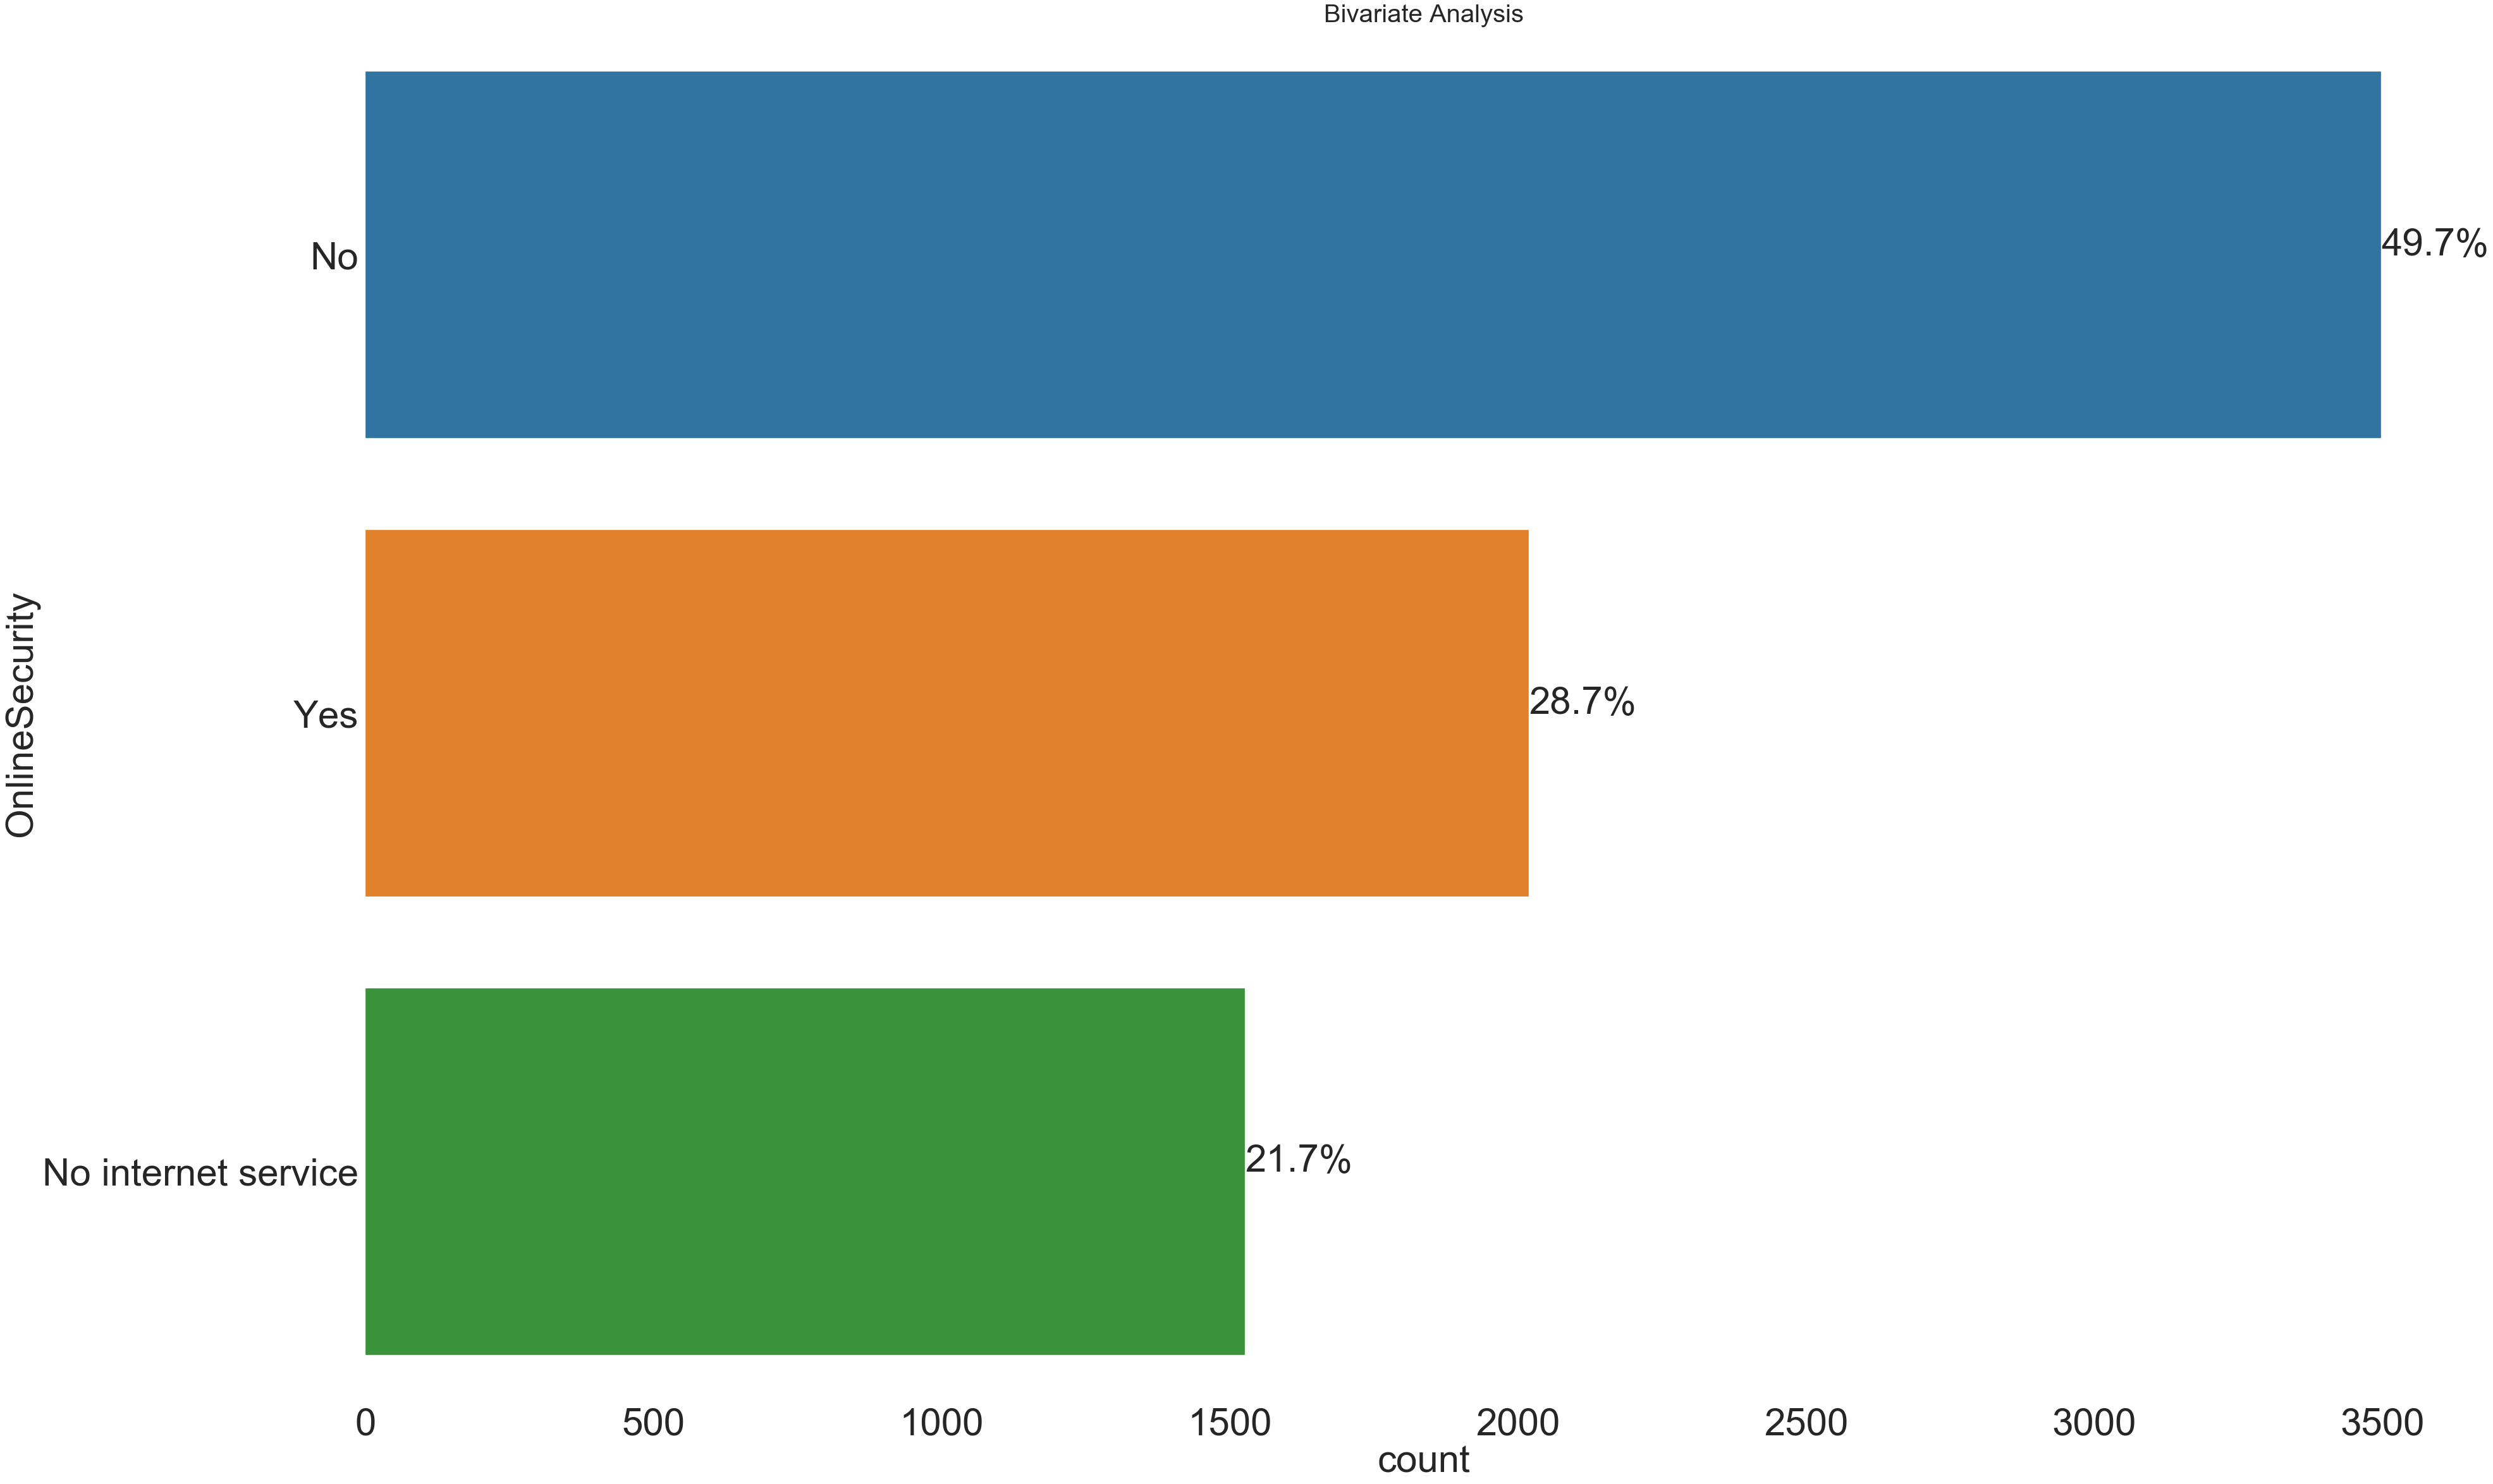

Percentage of datapoints present in class : 

 No                     43.844952
Yes                    34.488144
No internet service    21.666903
Name: OnlineBackup, dtype: float64


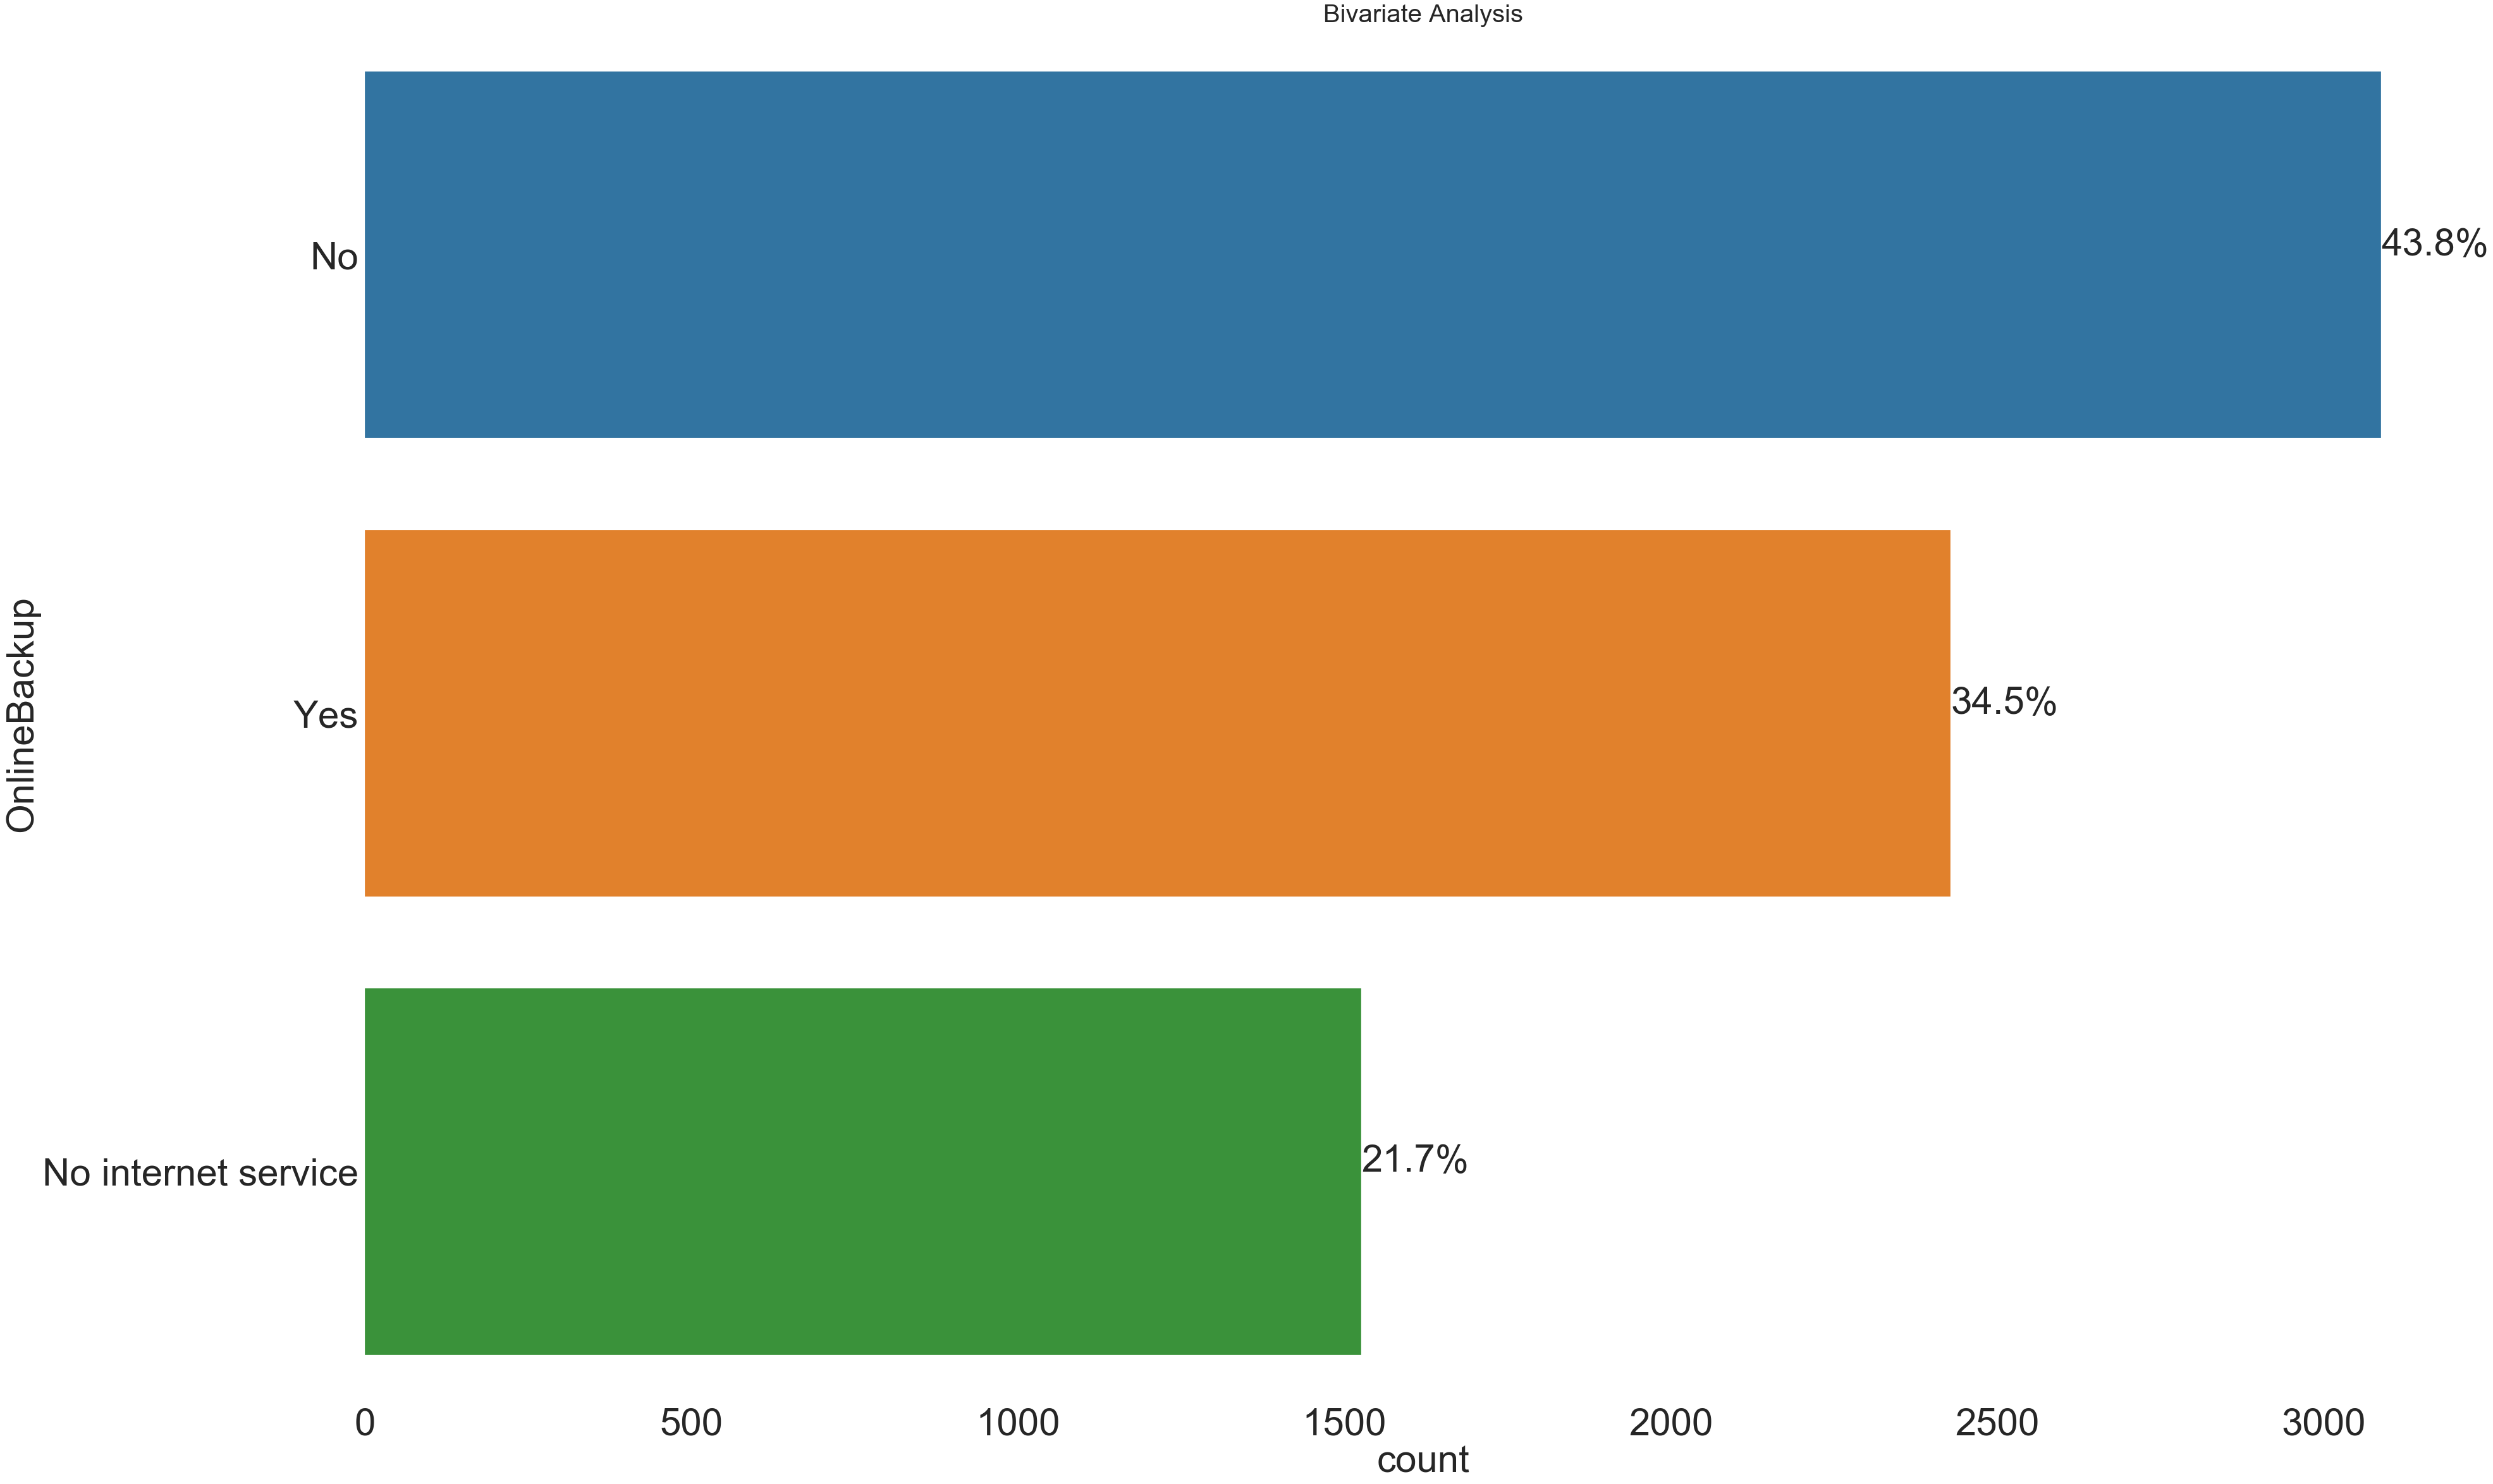

Percentage of datapoints present in class : 

 No                     43.944342
Yes                    34.388755
No internet service    21.666903
Name: DeviceProtection, dtype: float64


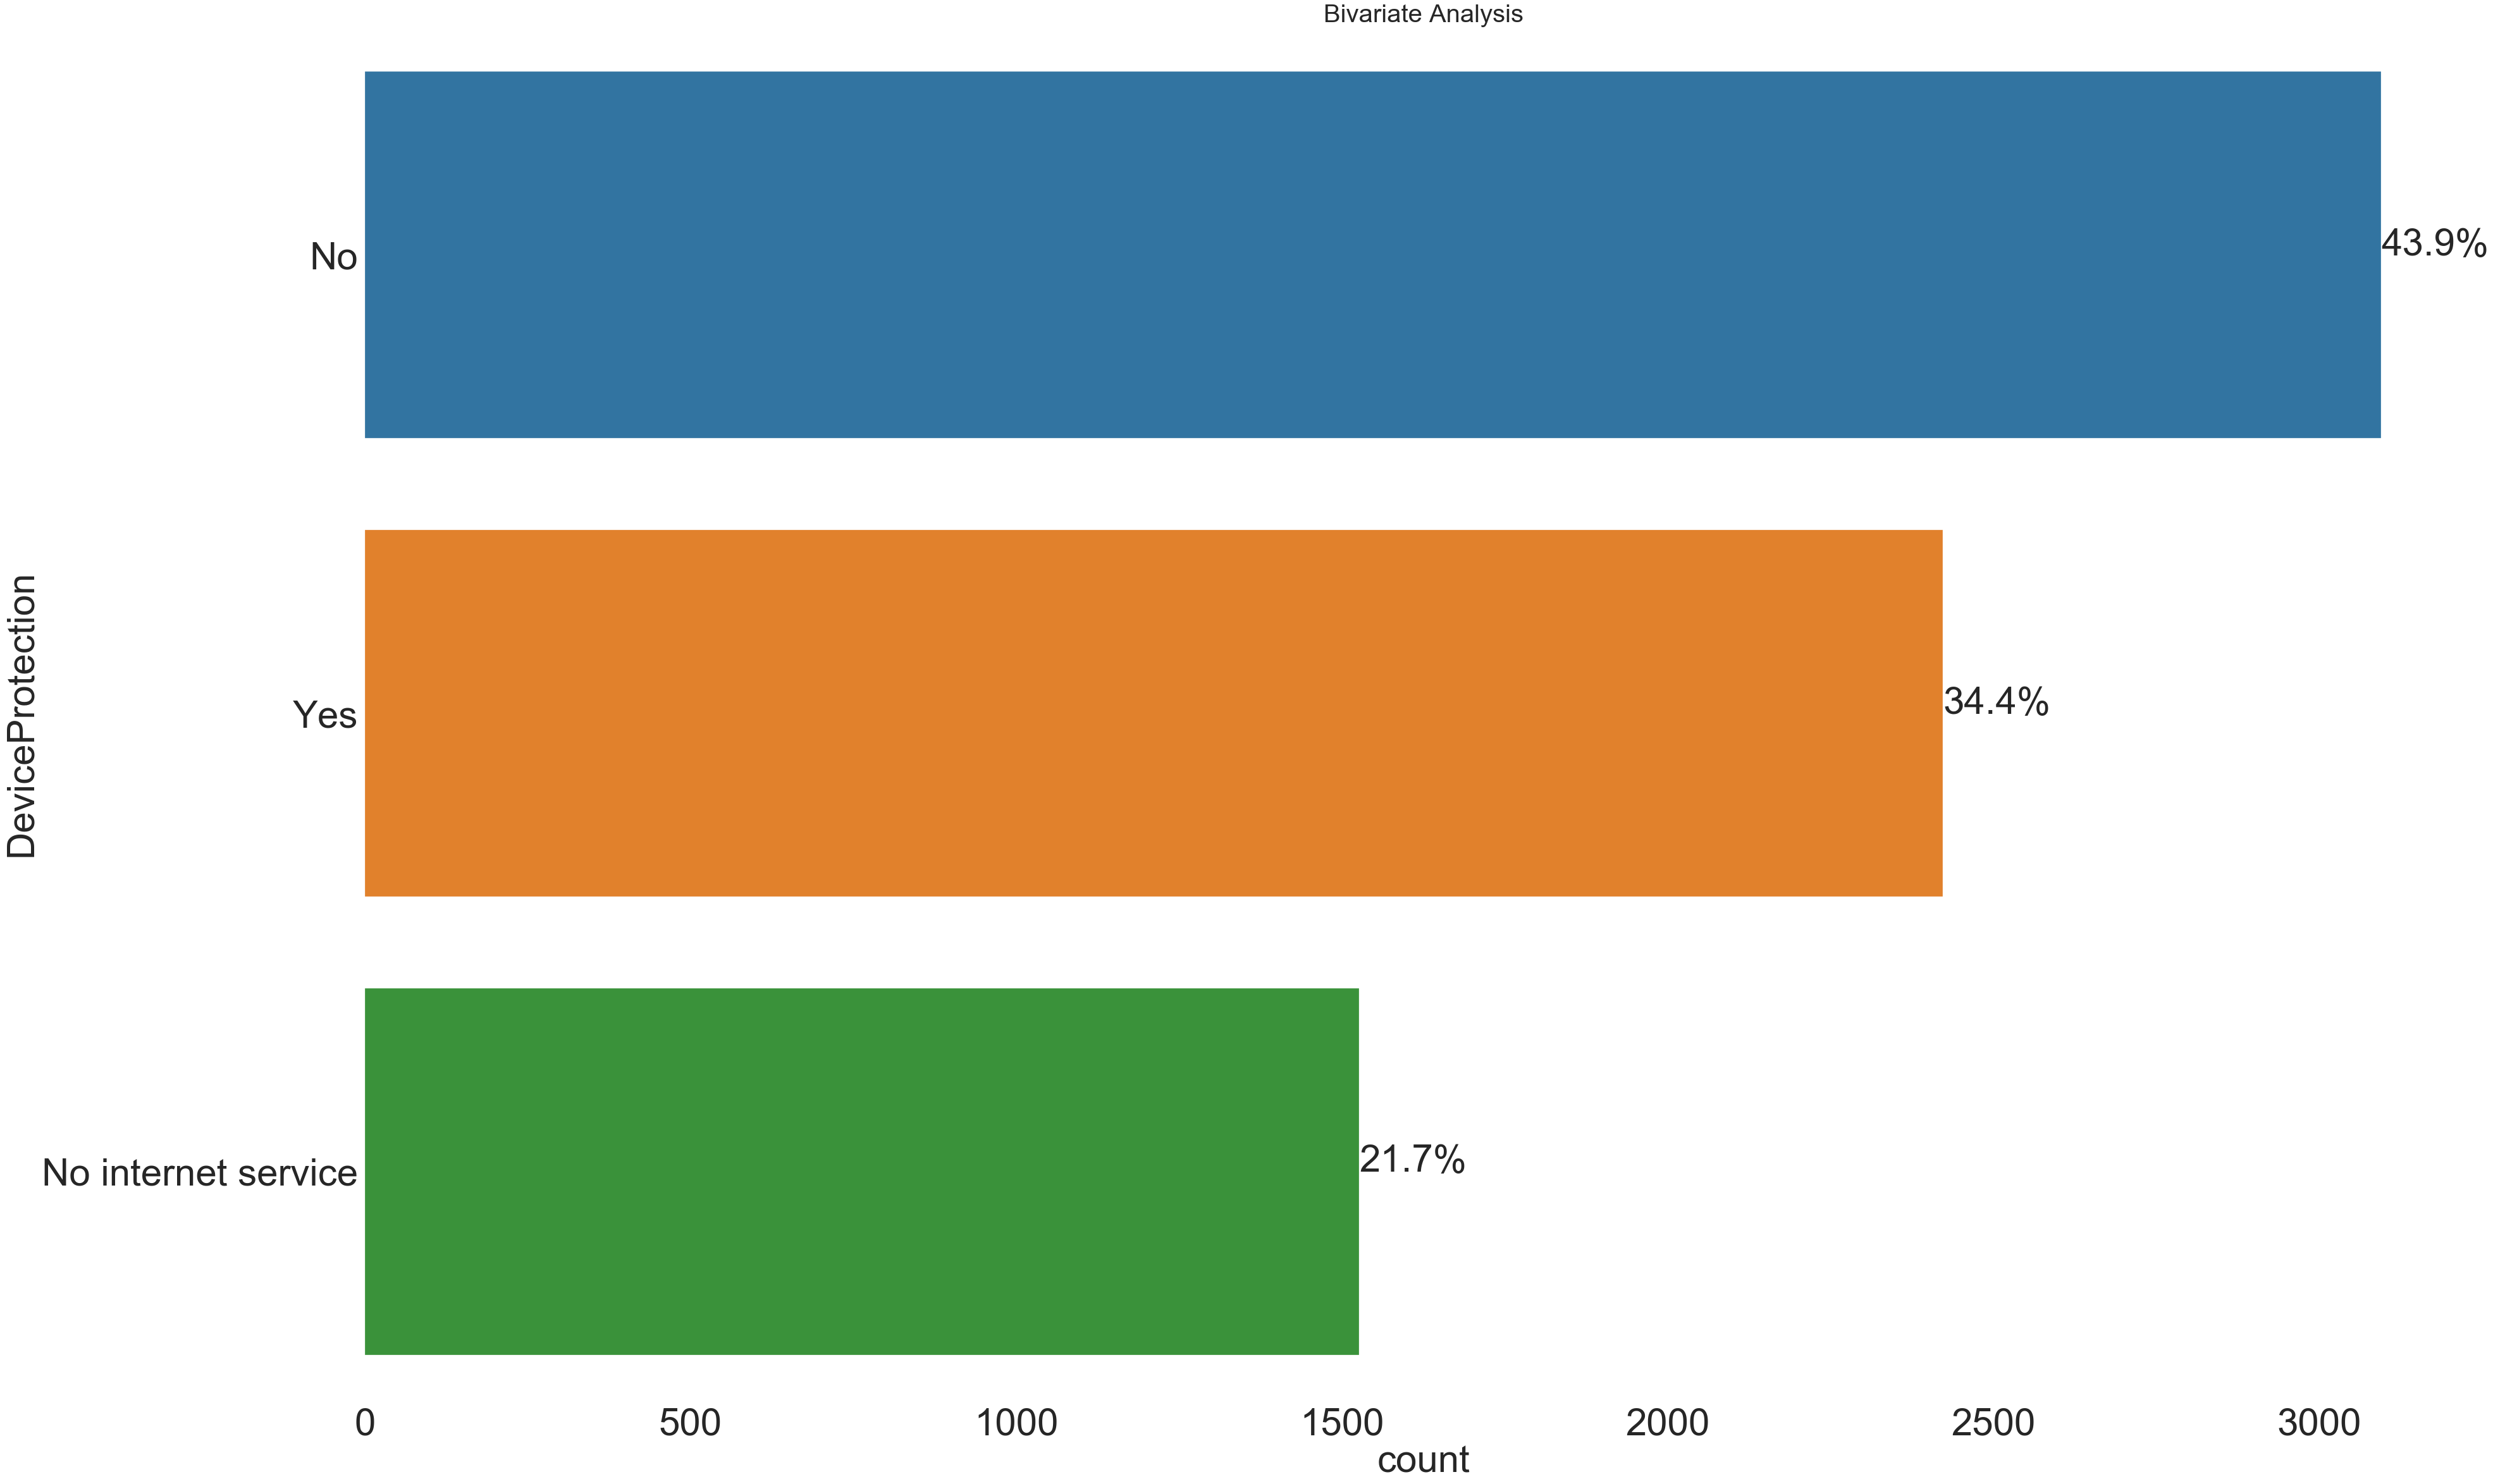

Percentage of datapoints present in class : 

 No                     49.311373
Yes                    29.021724
No internet service    21.666903
Name: TechSupport, dtype: float64


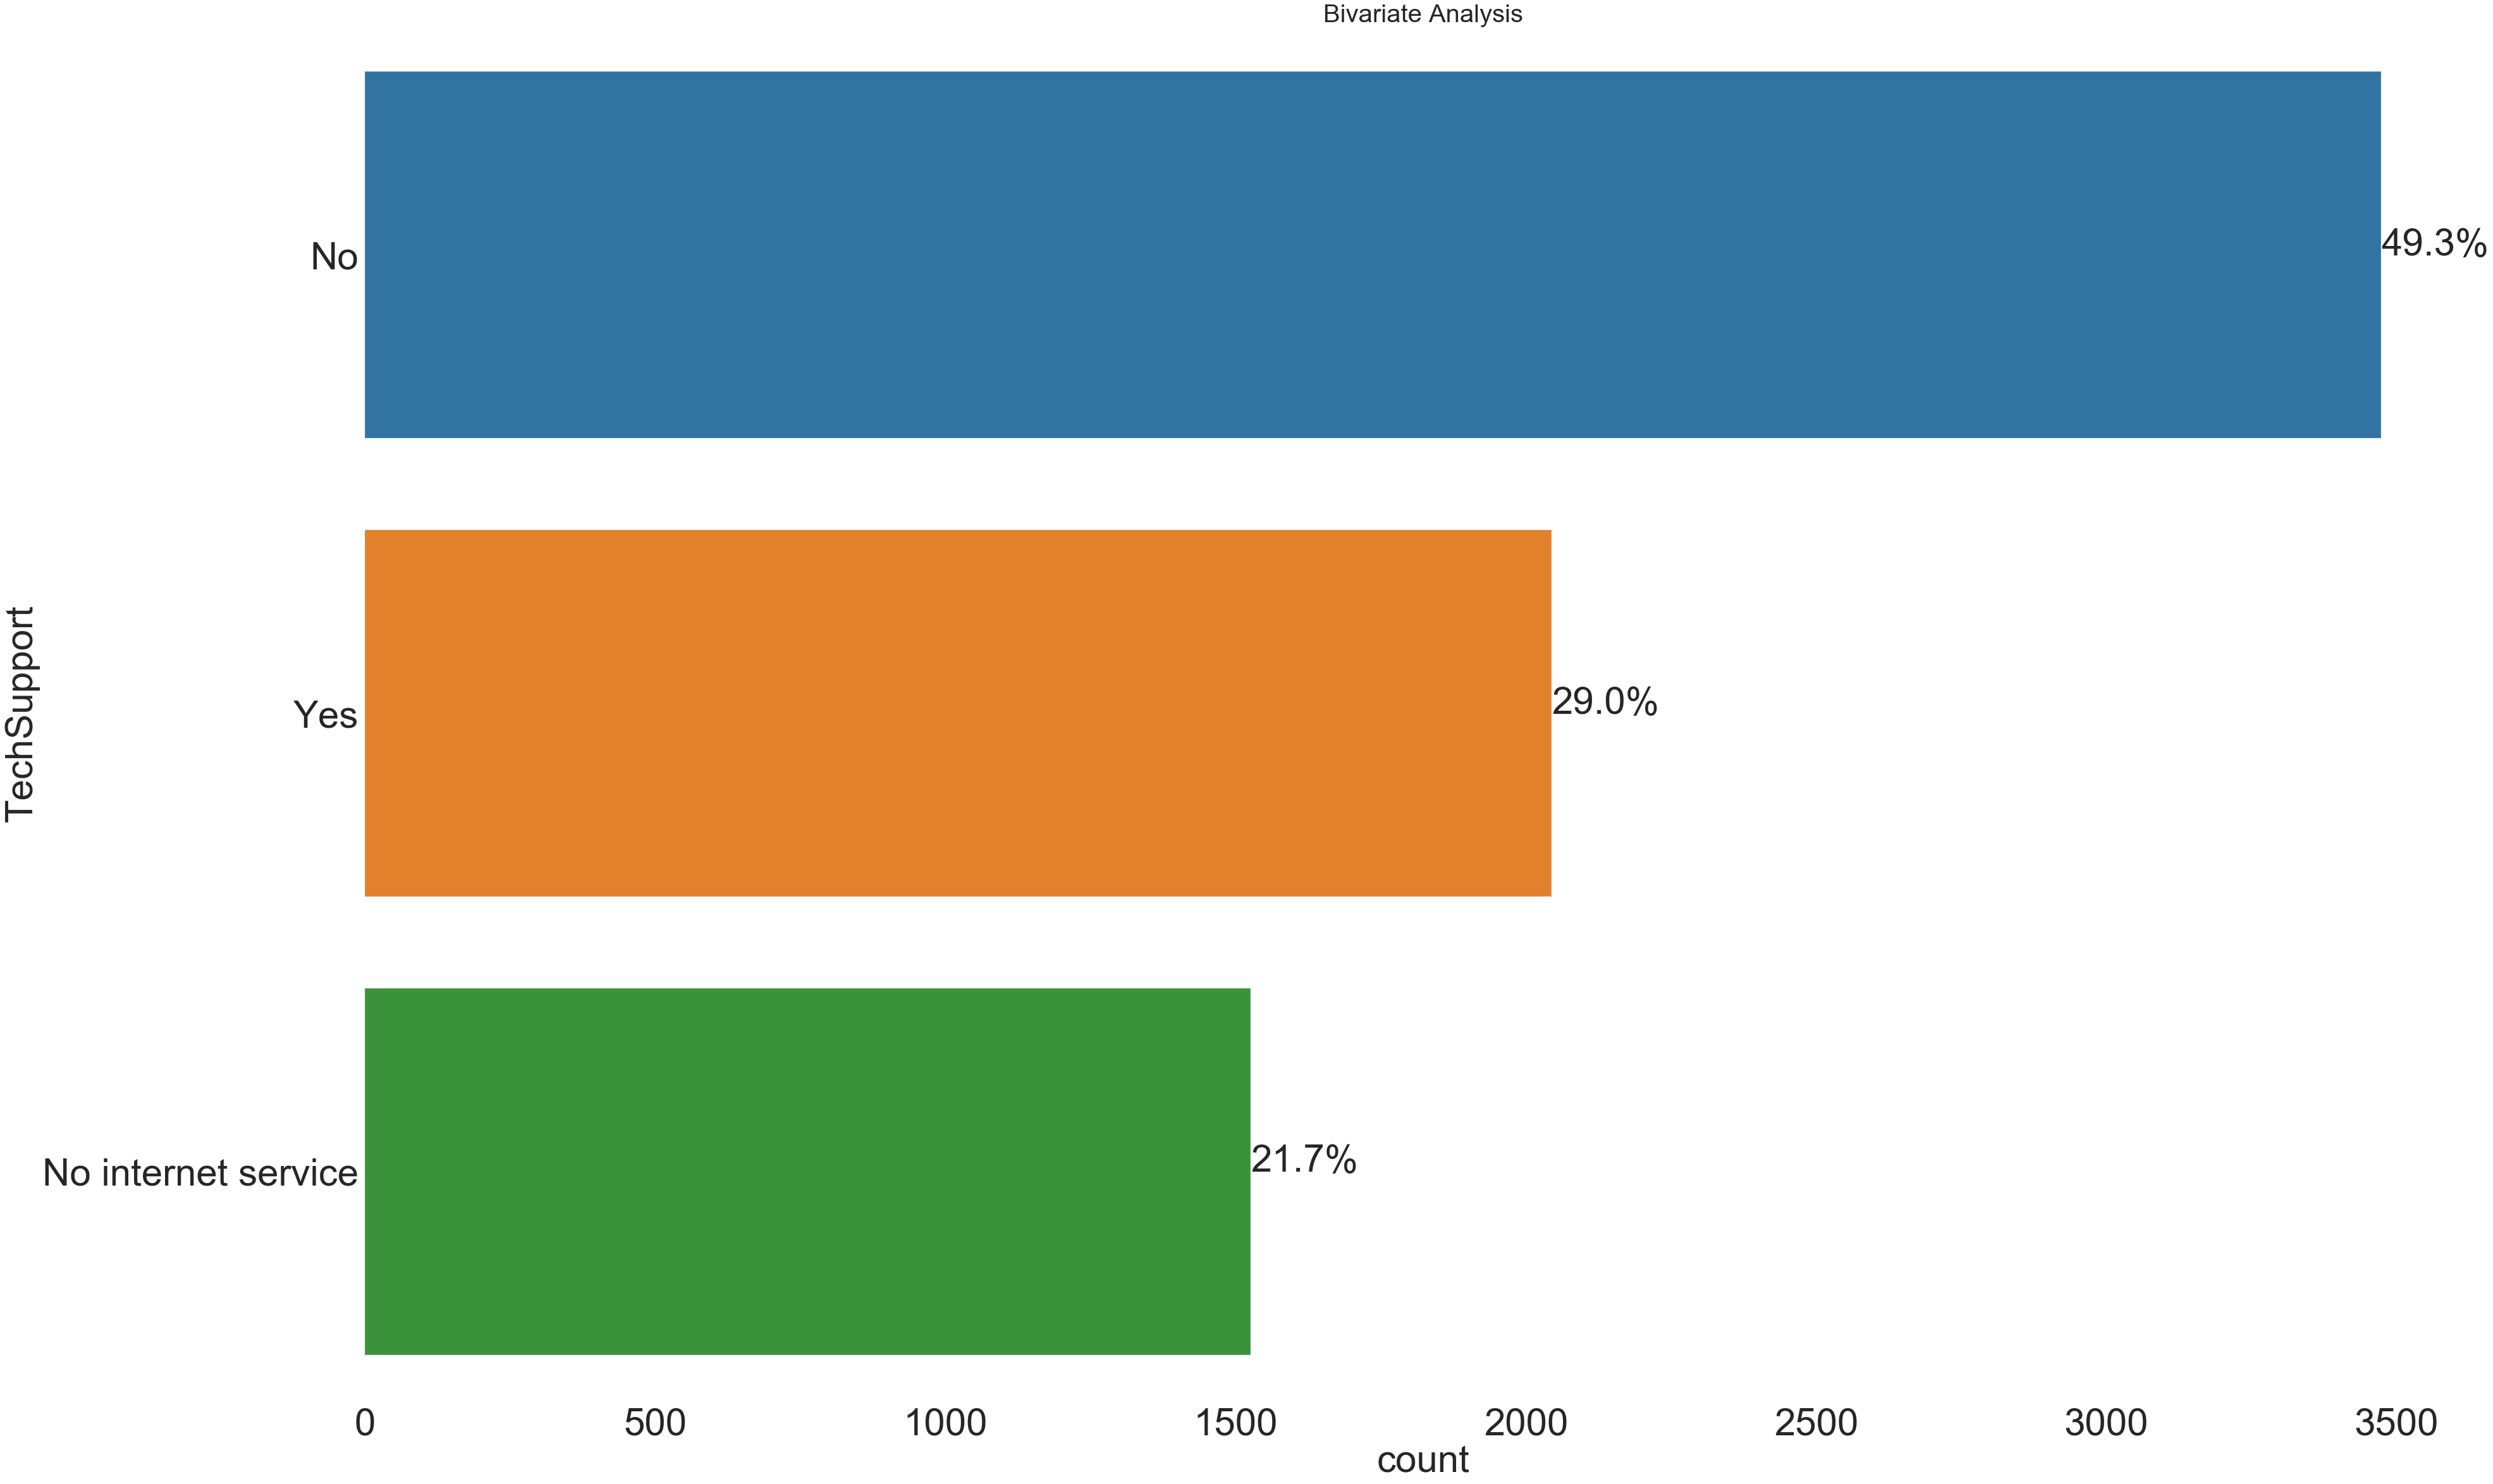

Percentage of datapoints present in class : 

 No                     39.897771
Yes                    38.435326
No internet service    21.666903
Name: StreamingTV, dtype: float64


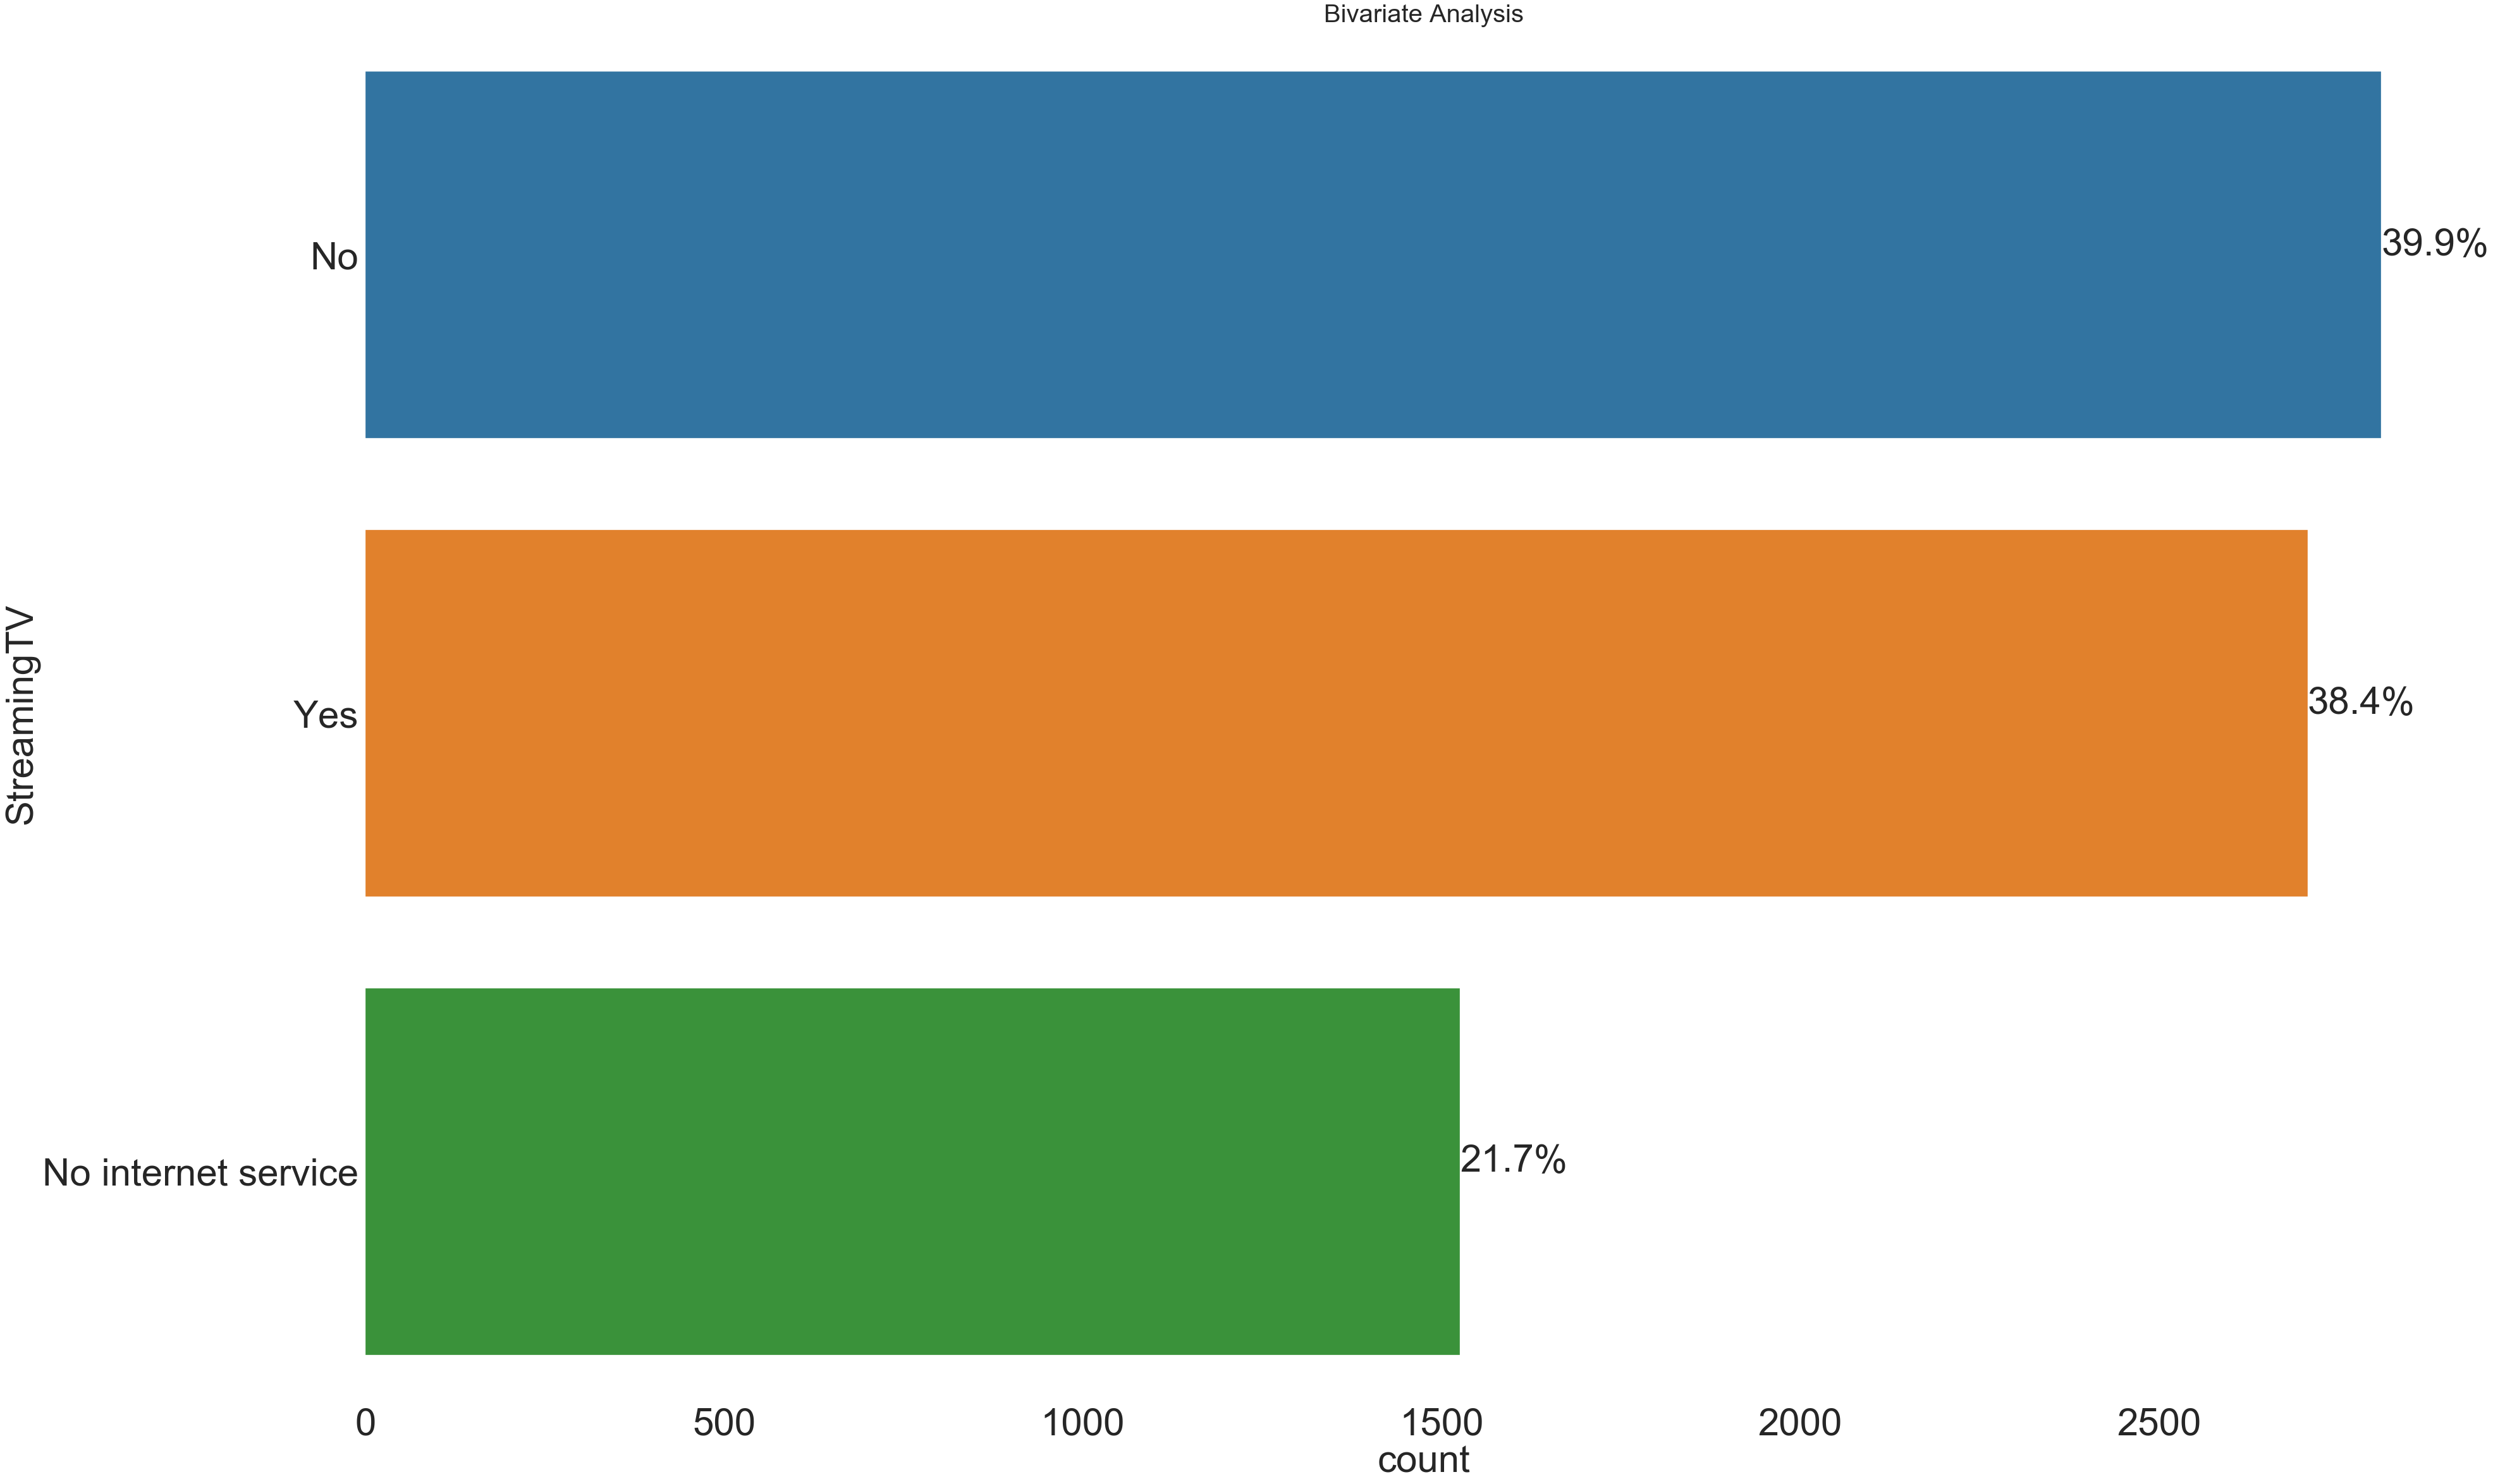

Percentage of datapoints present in class : 

 No                     39.542808
Yes                    38.790288
No internet service    21.666903
Name: StreamingMovies, dtype: float64


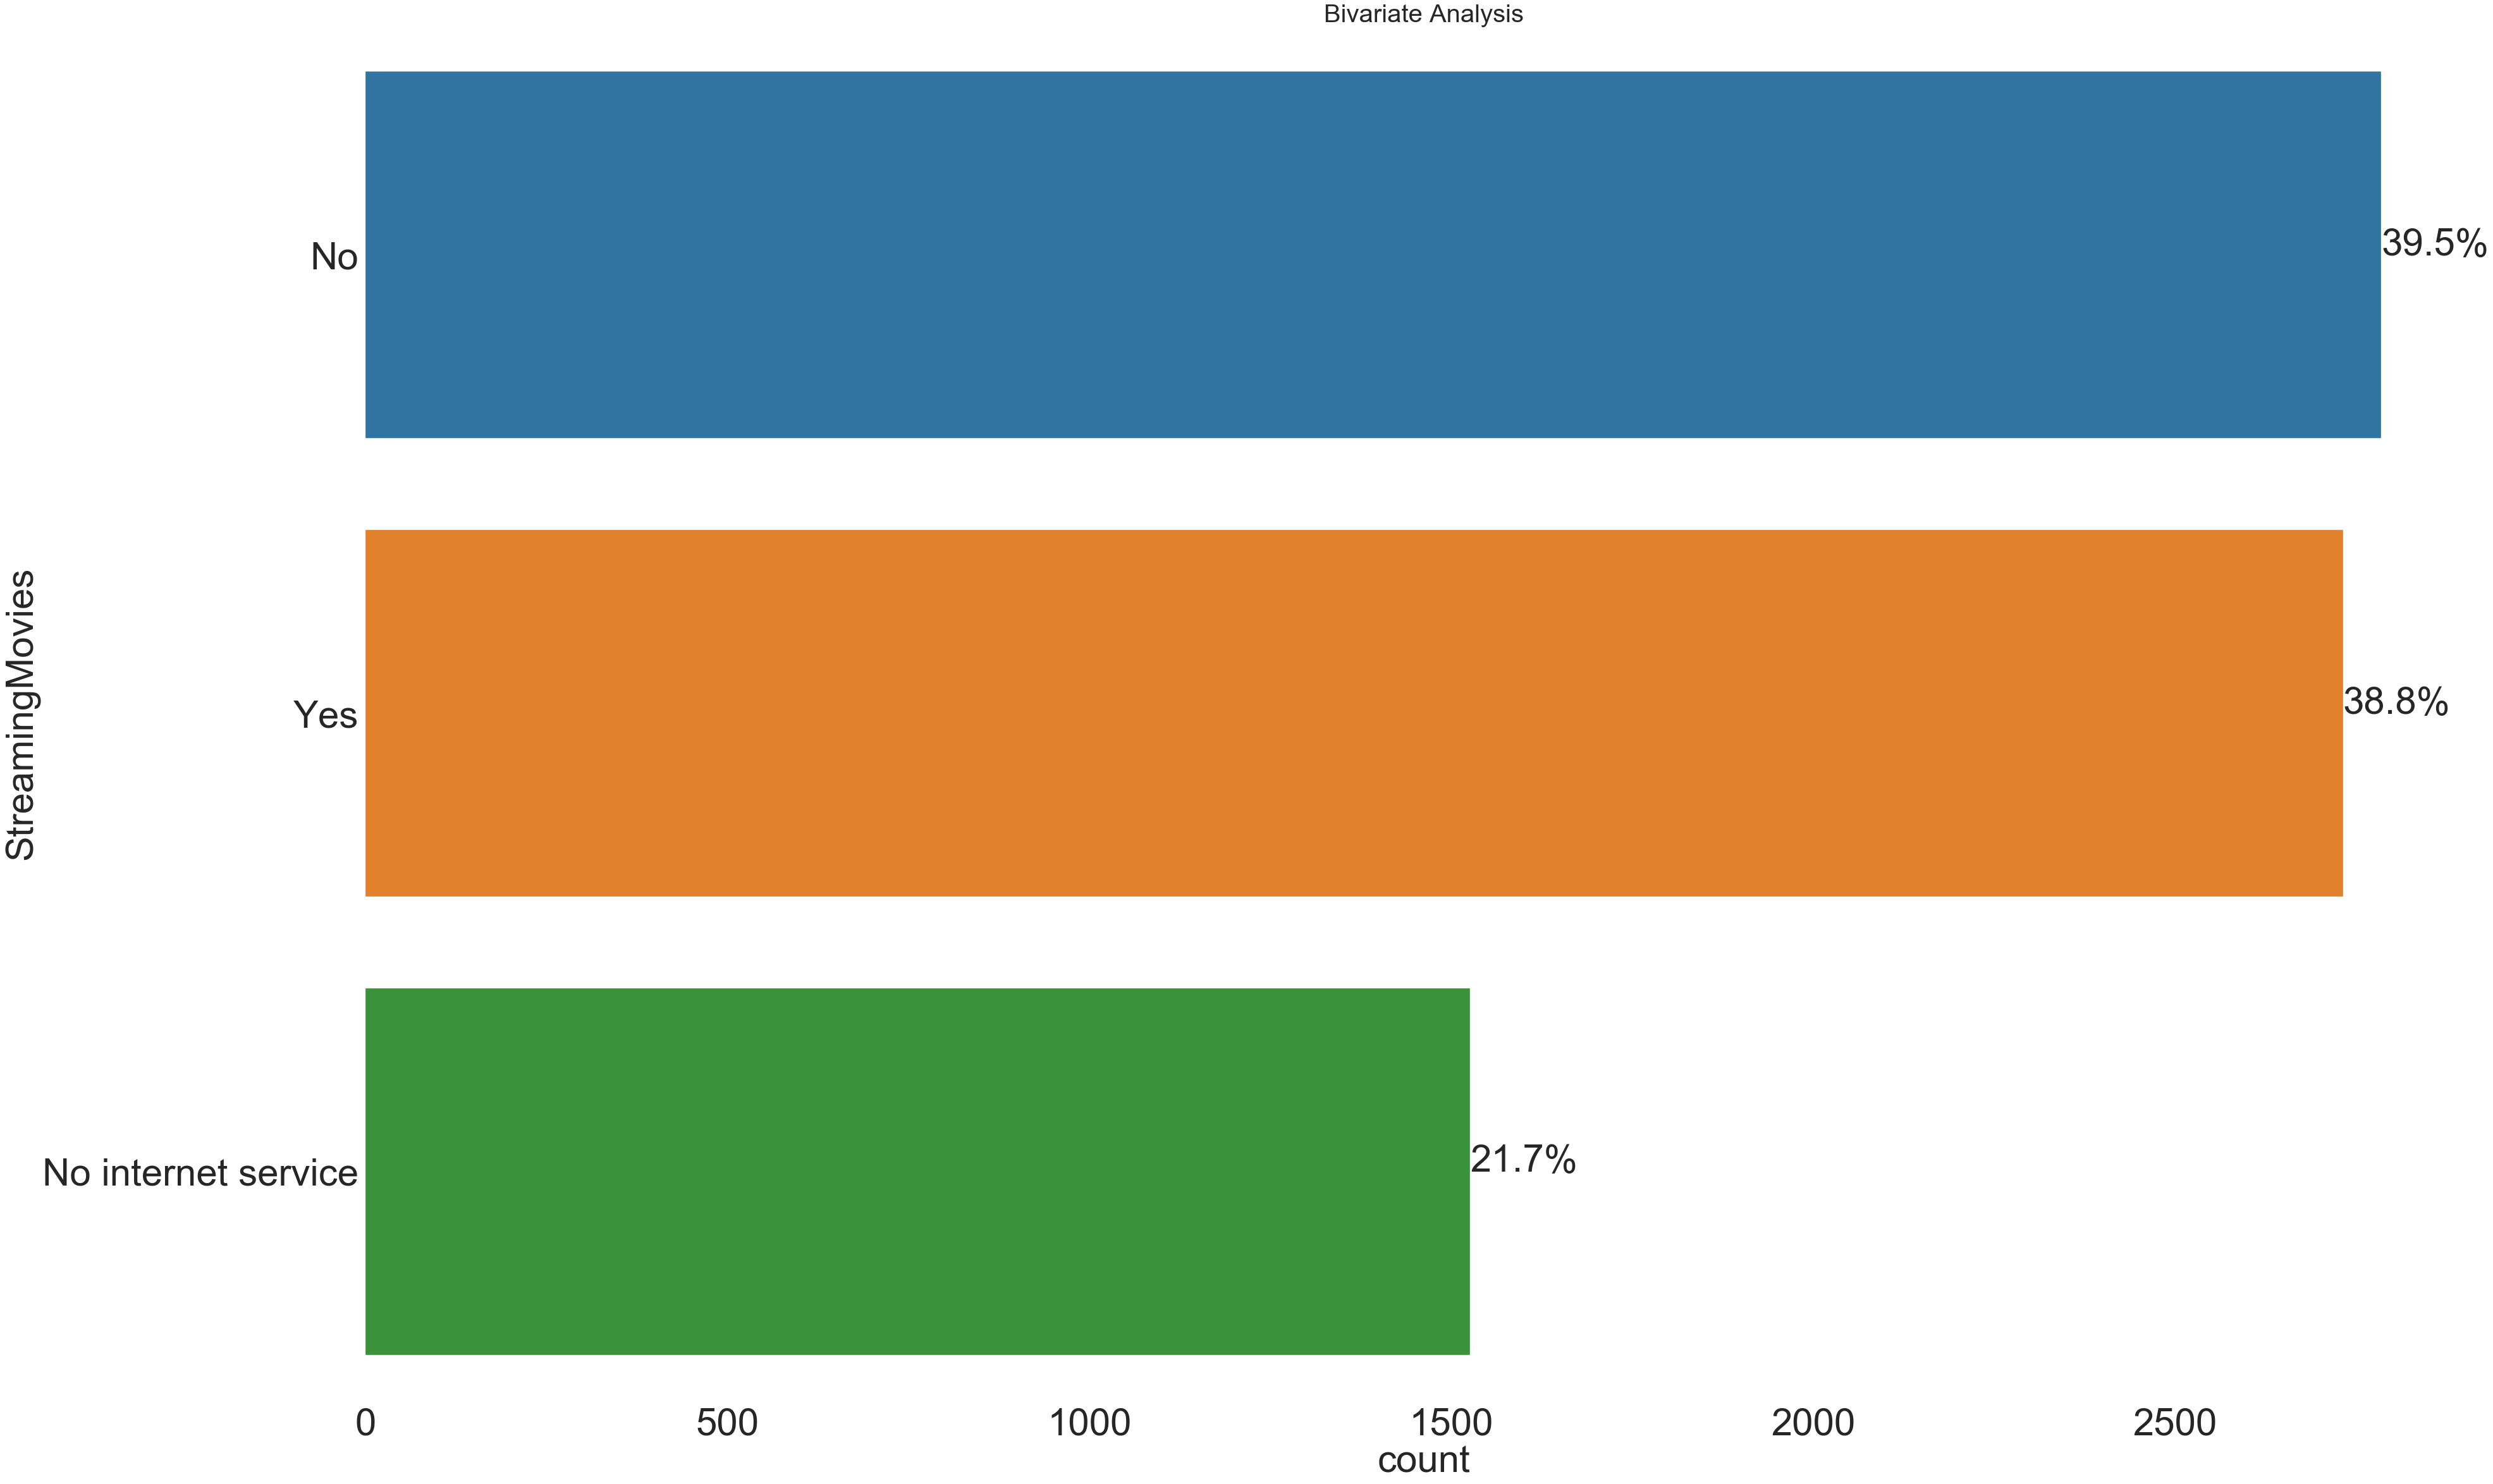

Percentage of datapoints present in class : 

 Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: Contract, dtype: float64


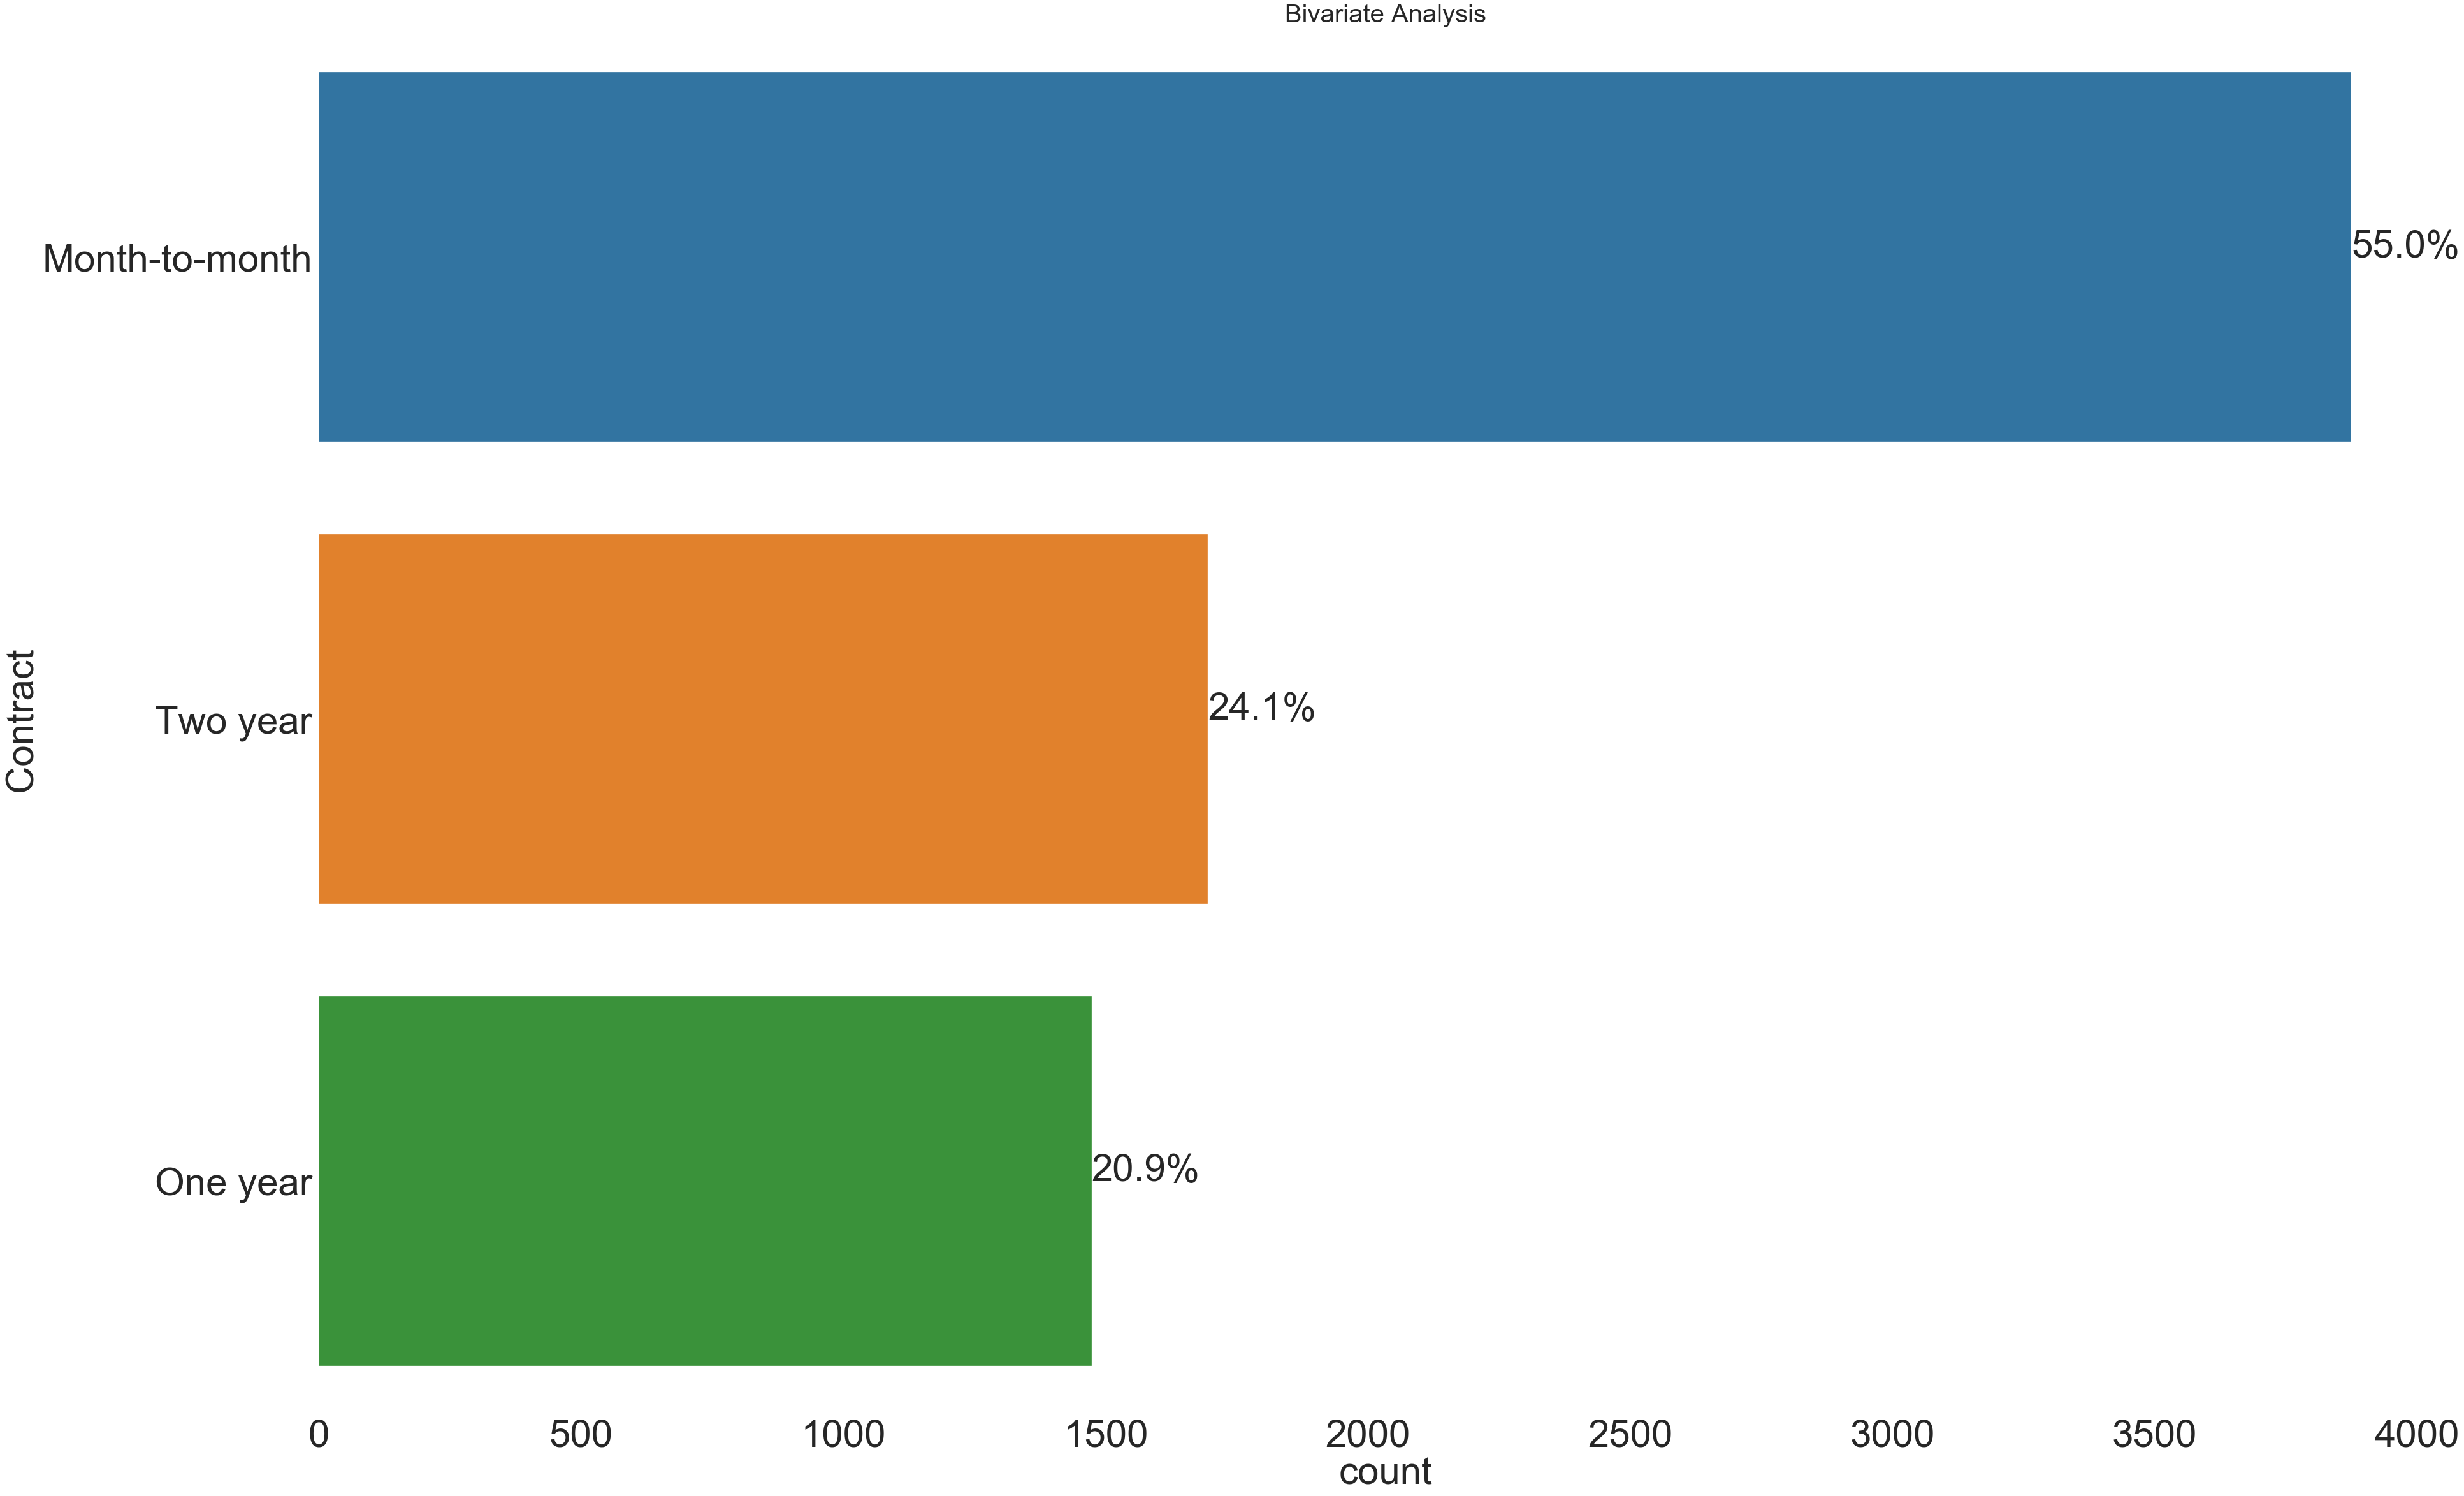

Percentage of datapoints present in class : 

 Yes    59.221922
No     40.778078
Name: PaperlessBilling, dtype: float64


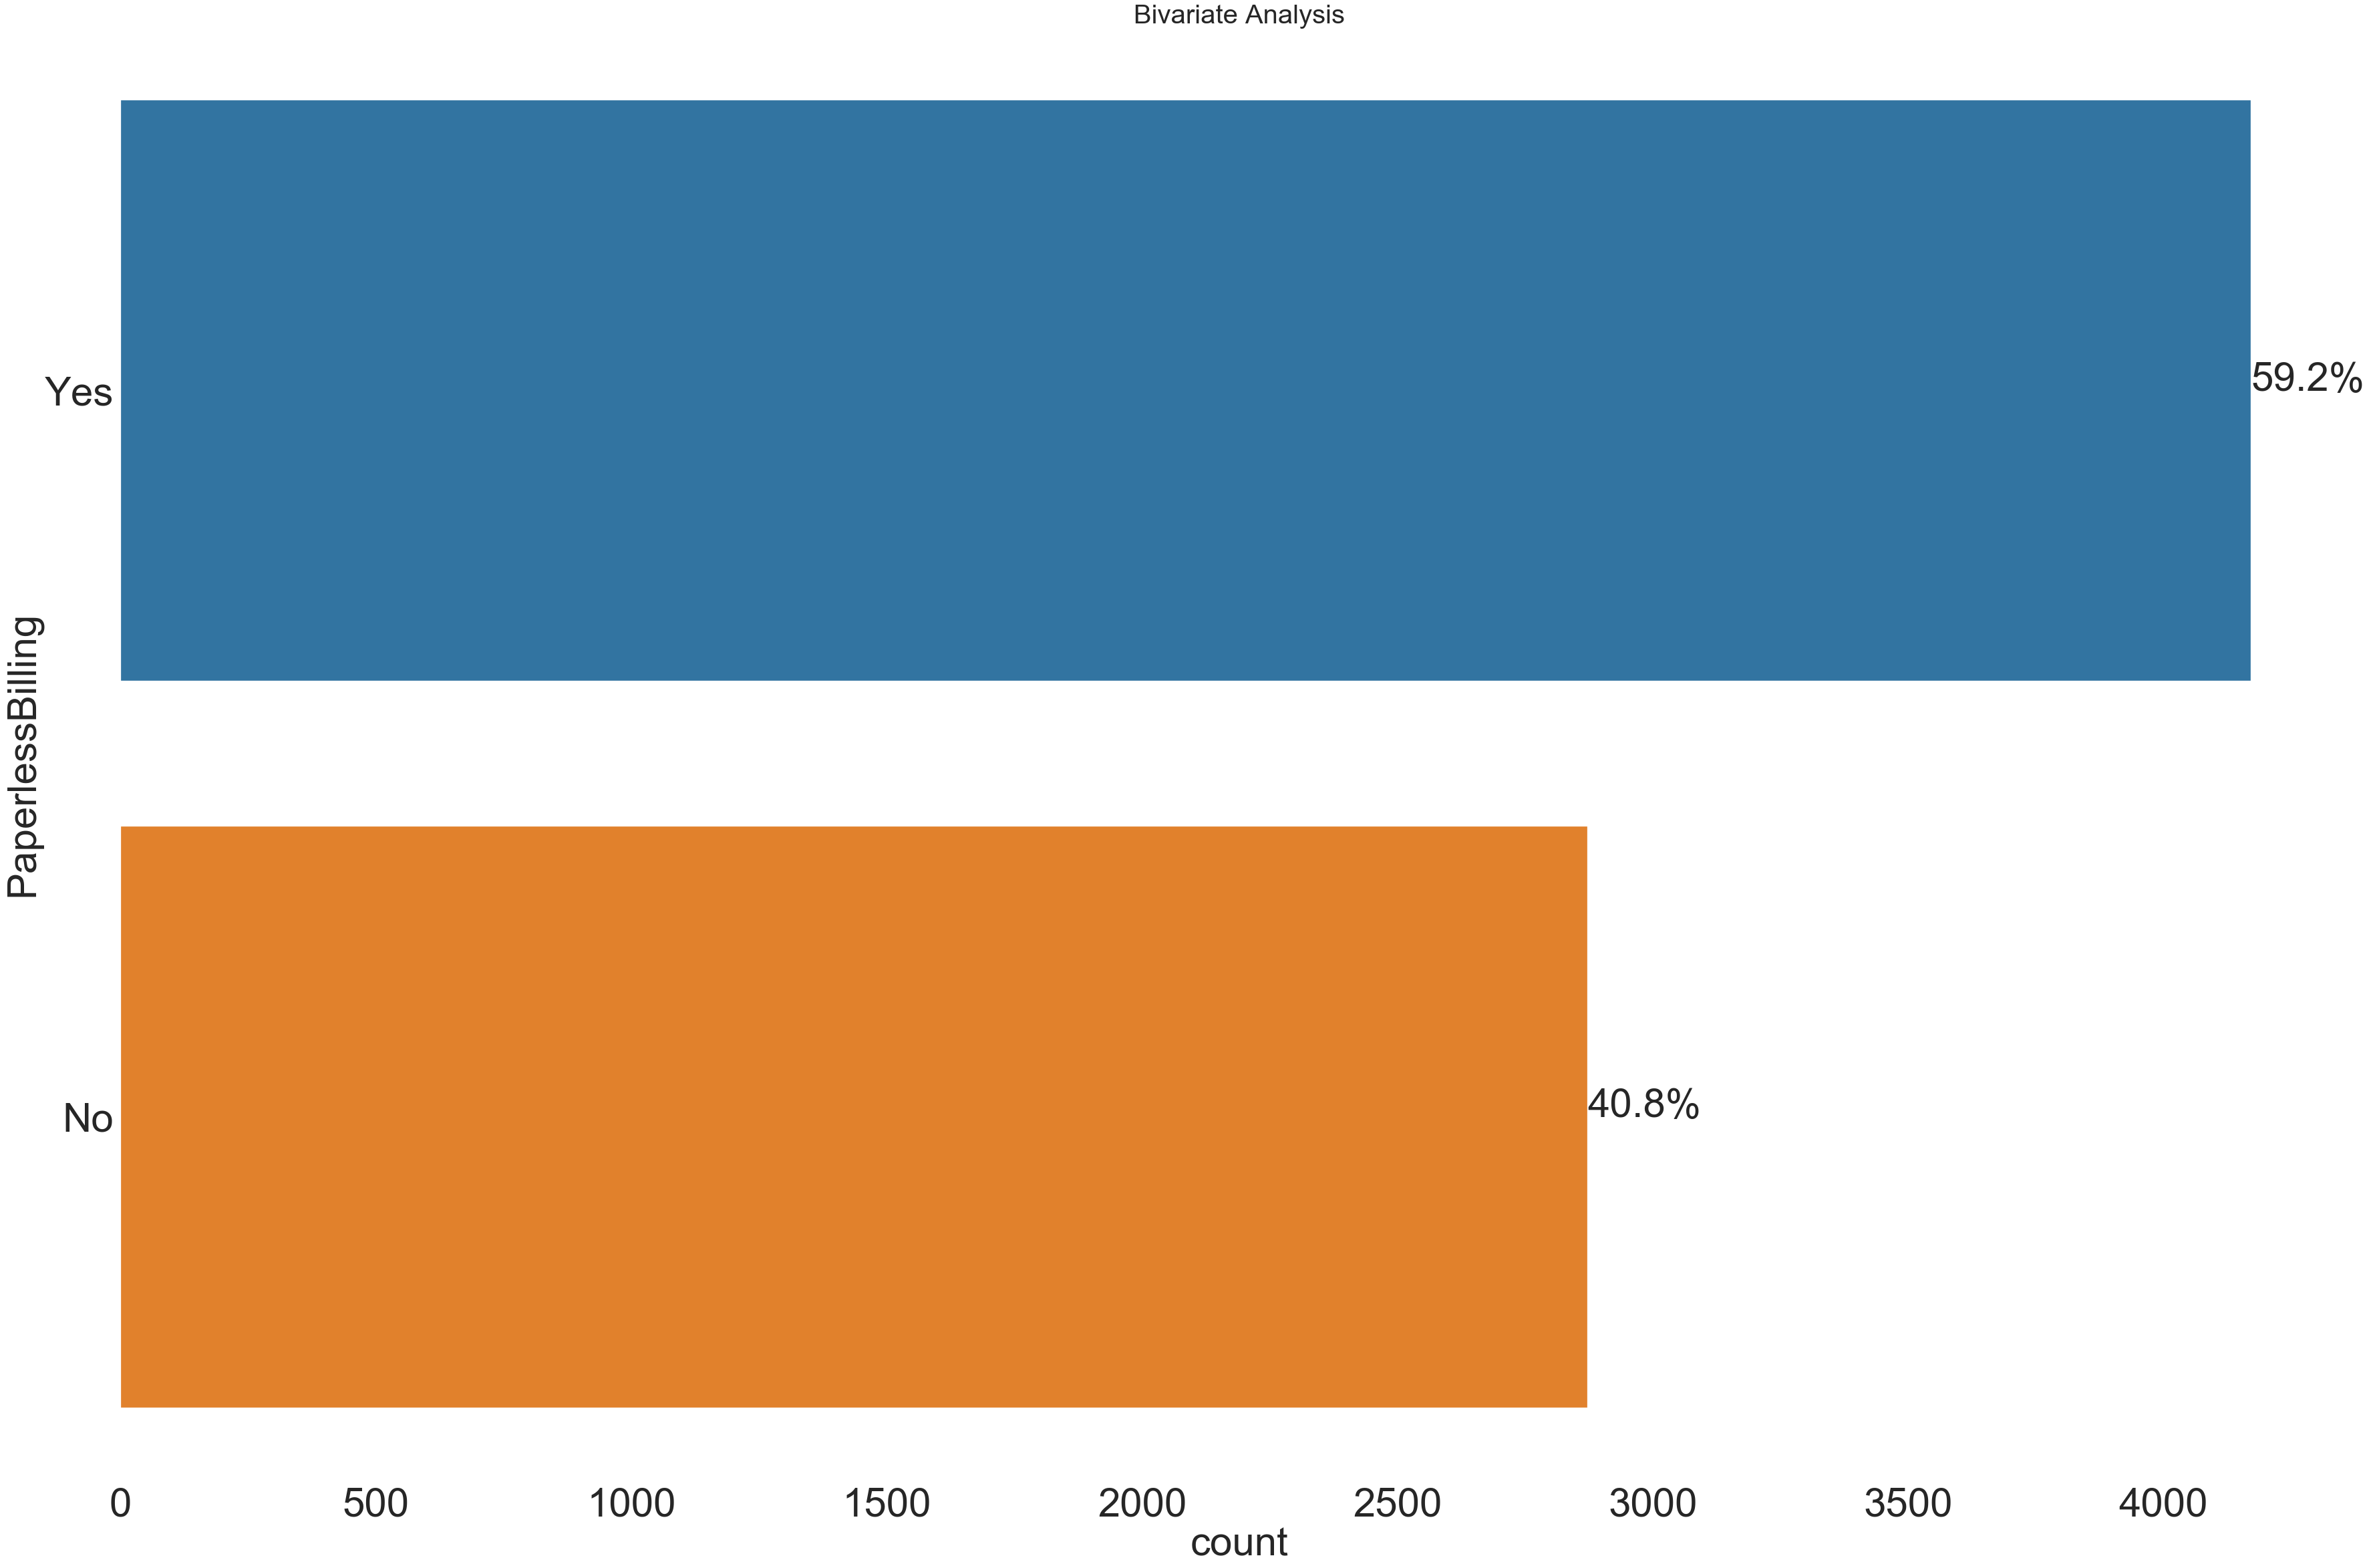

Percentage of datapoints present in class : 

 Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: PaymentMethod, dtype: float64


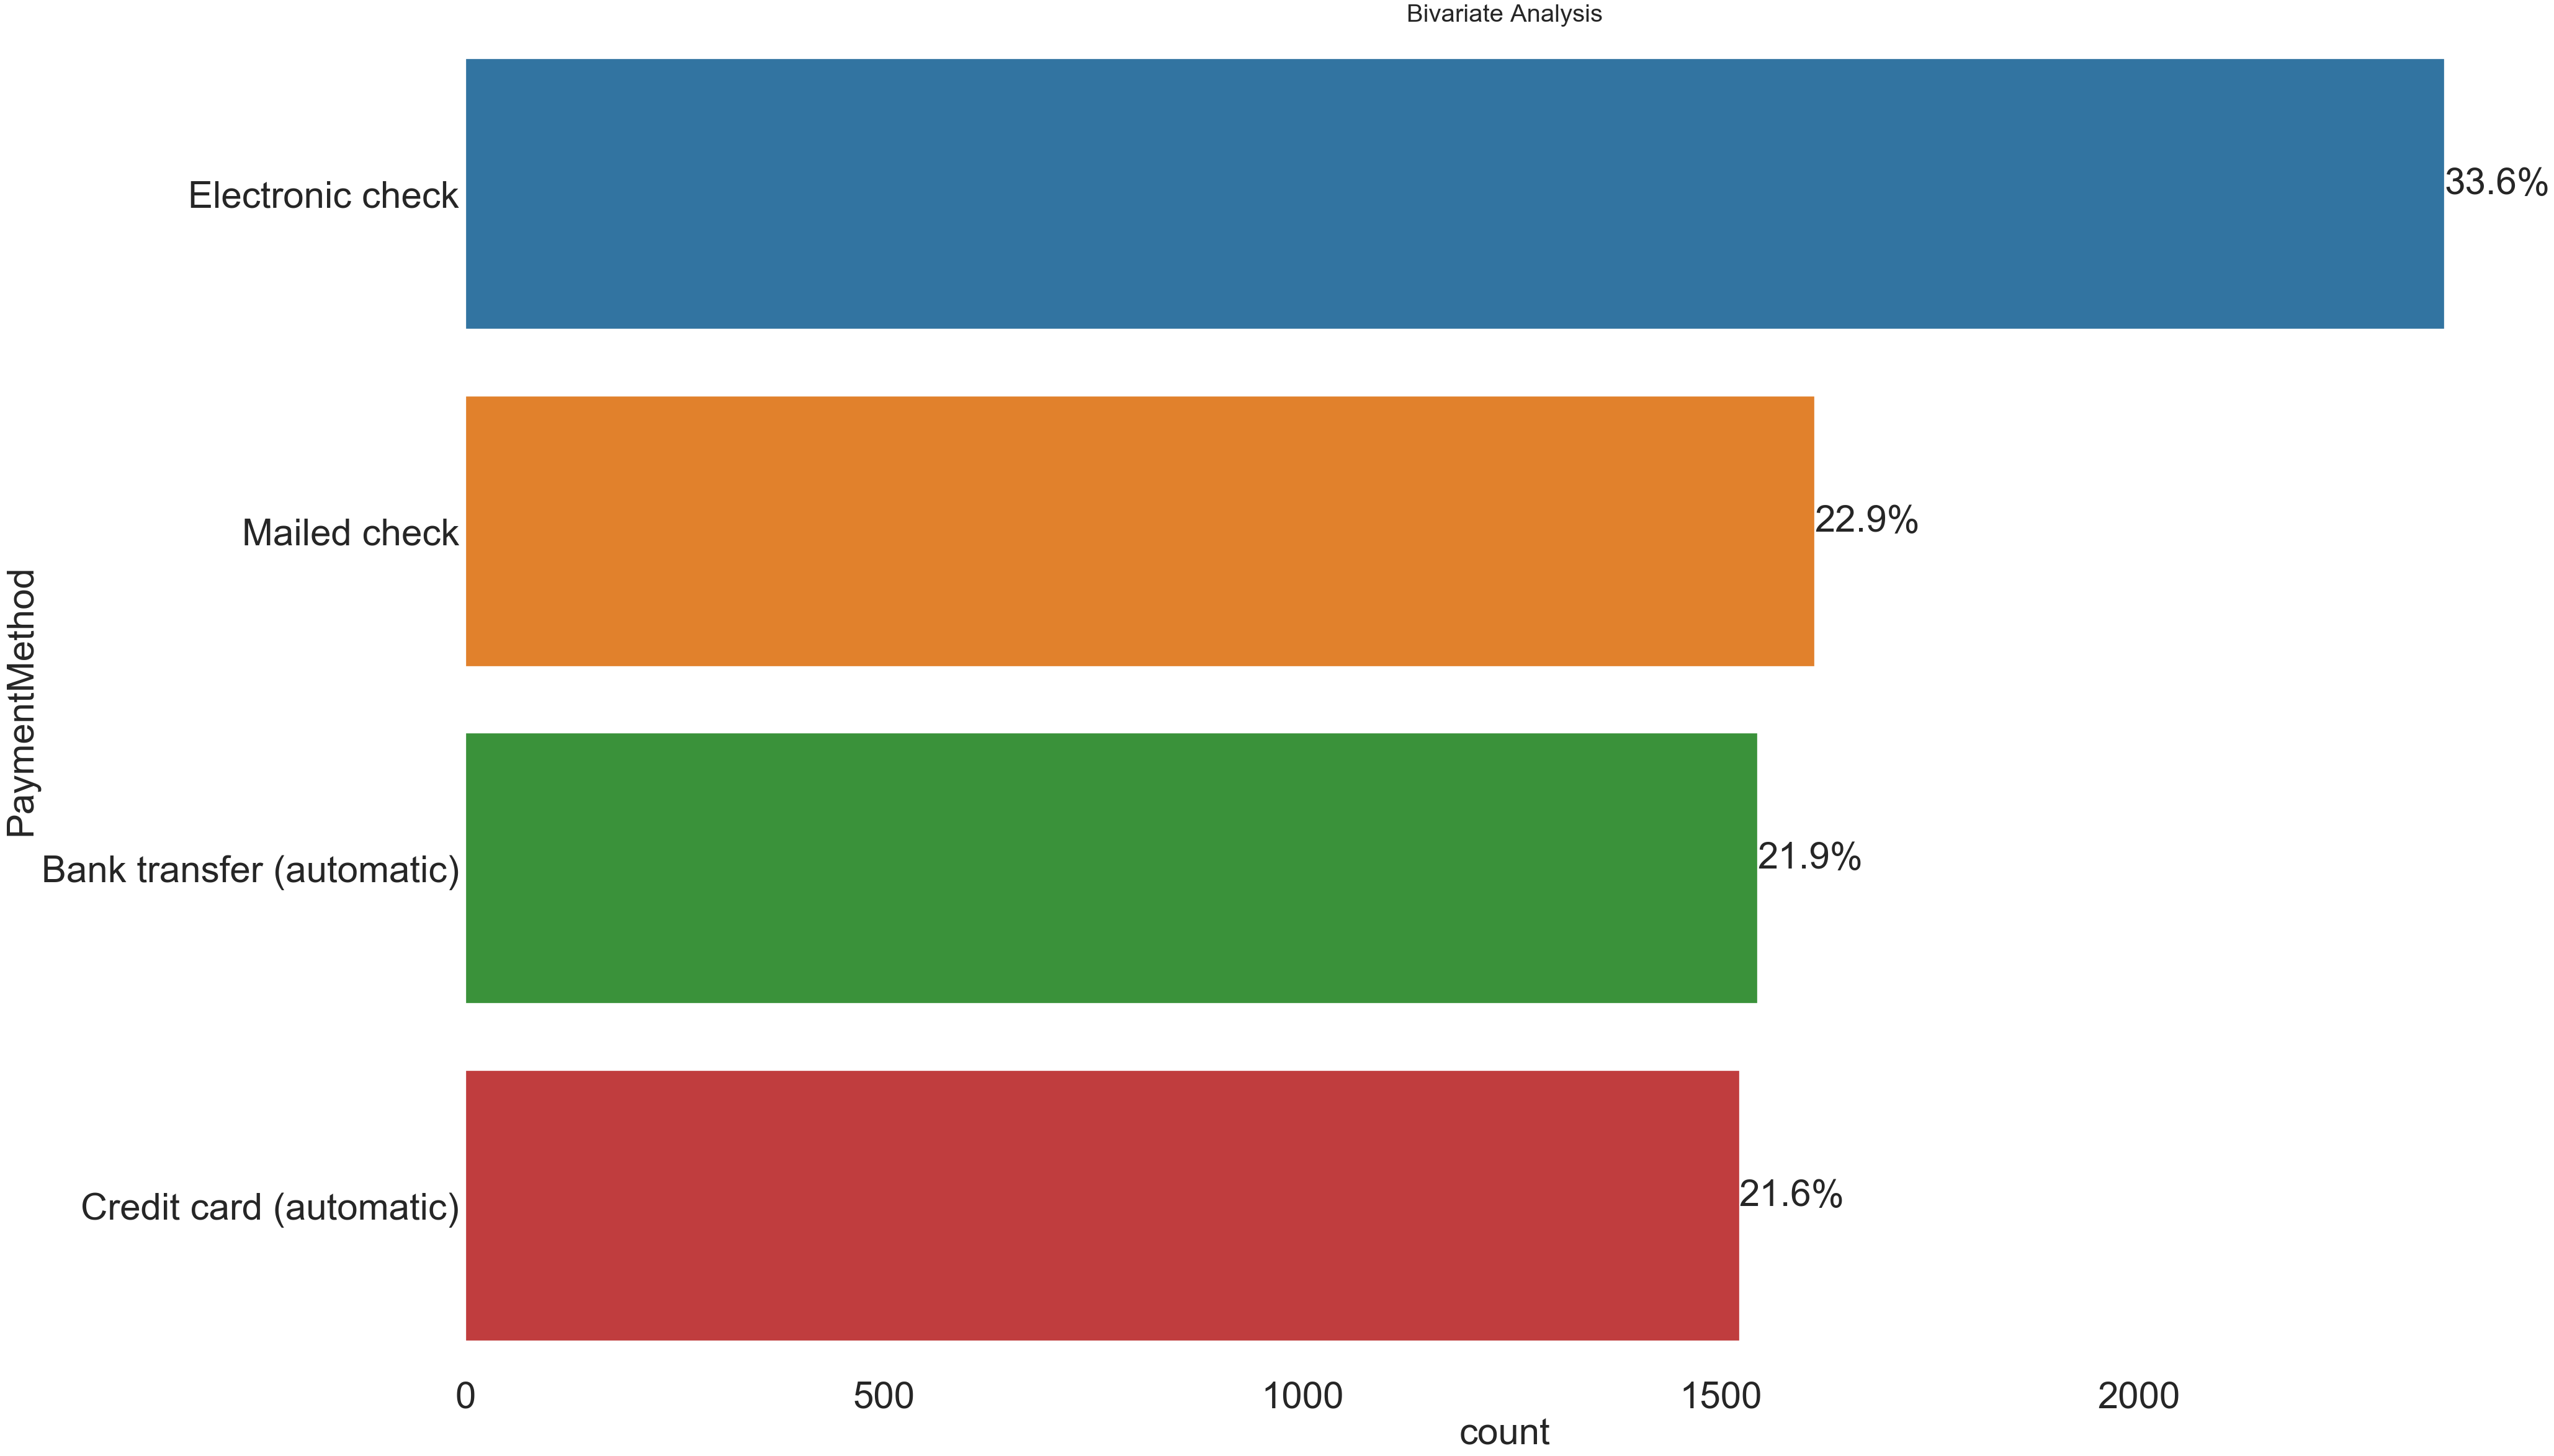

Percentage of datapoints present in class : 

 No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


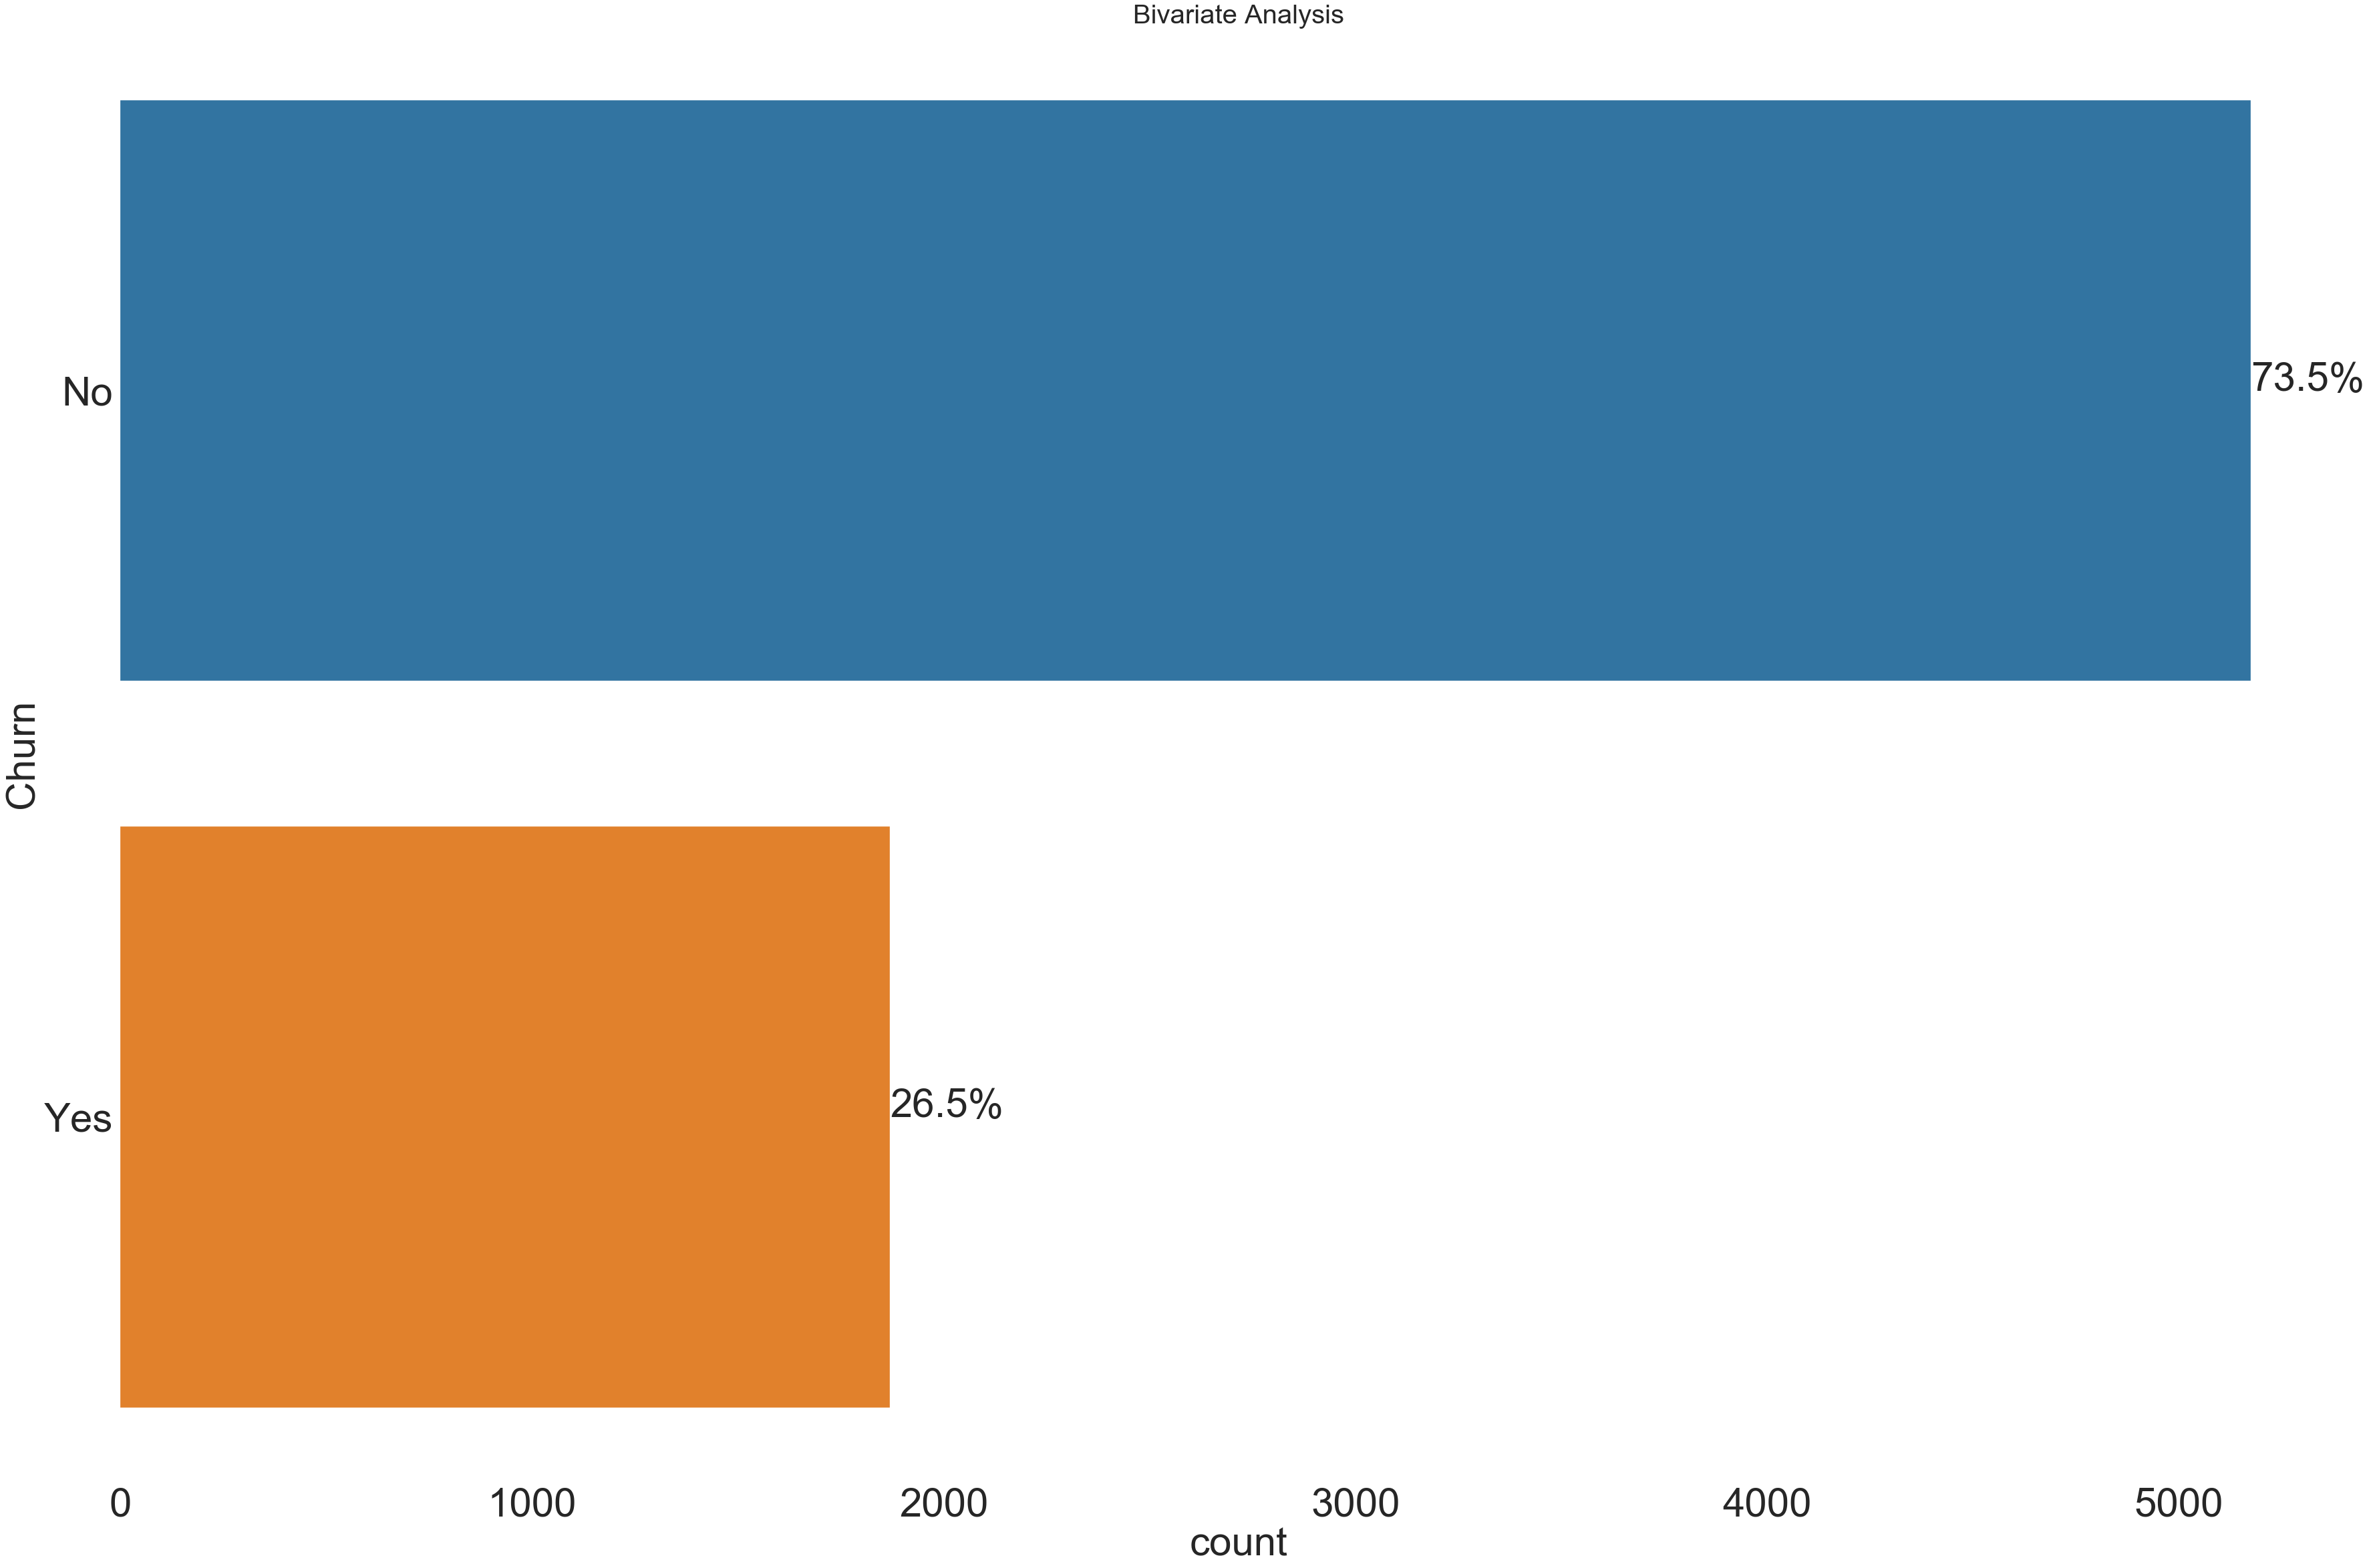

In [31]:
for col in categorical_data:
    Graphical_analysis.Categorical_data_analysis(categorical_data).univariate_analysis_categorical_countplot(col)

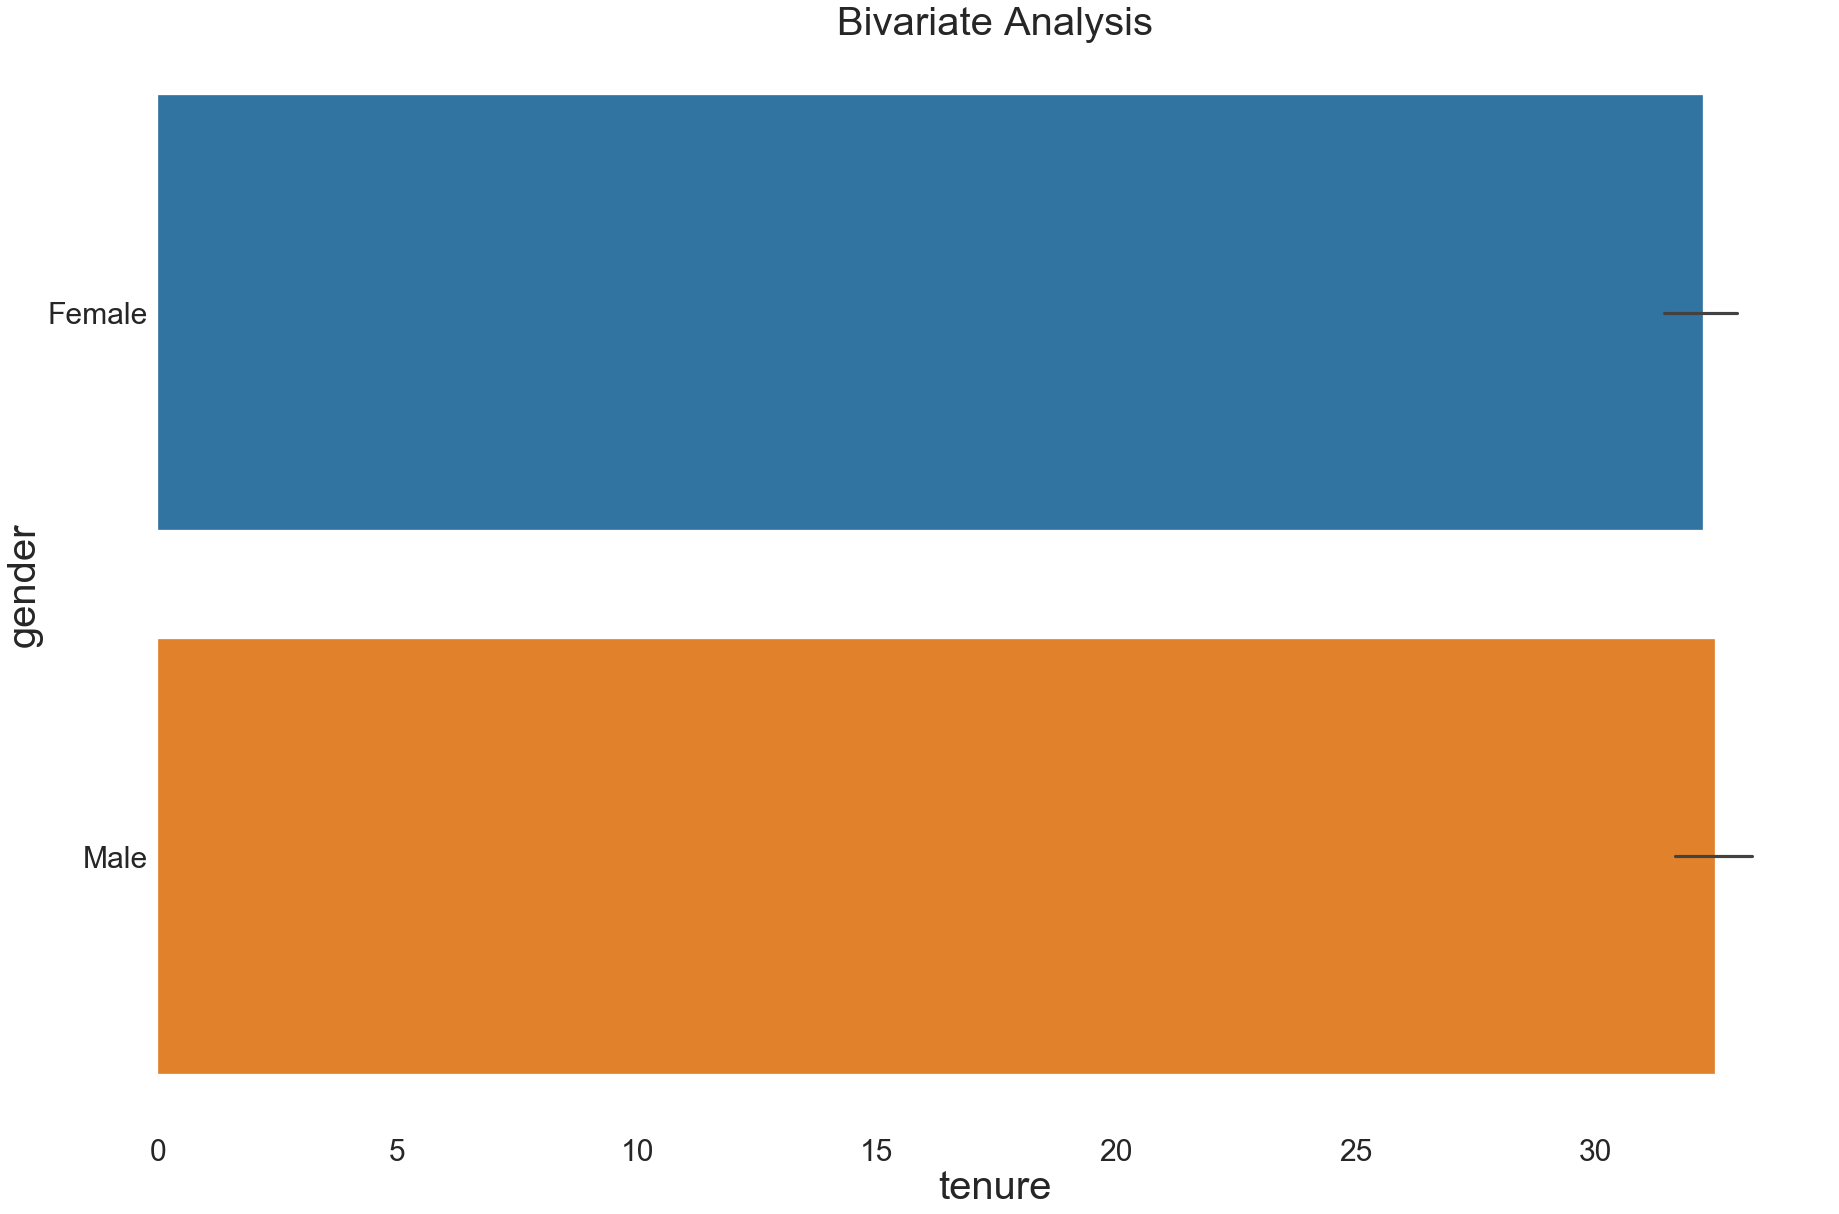

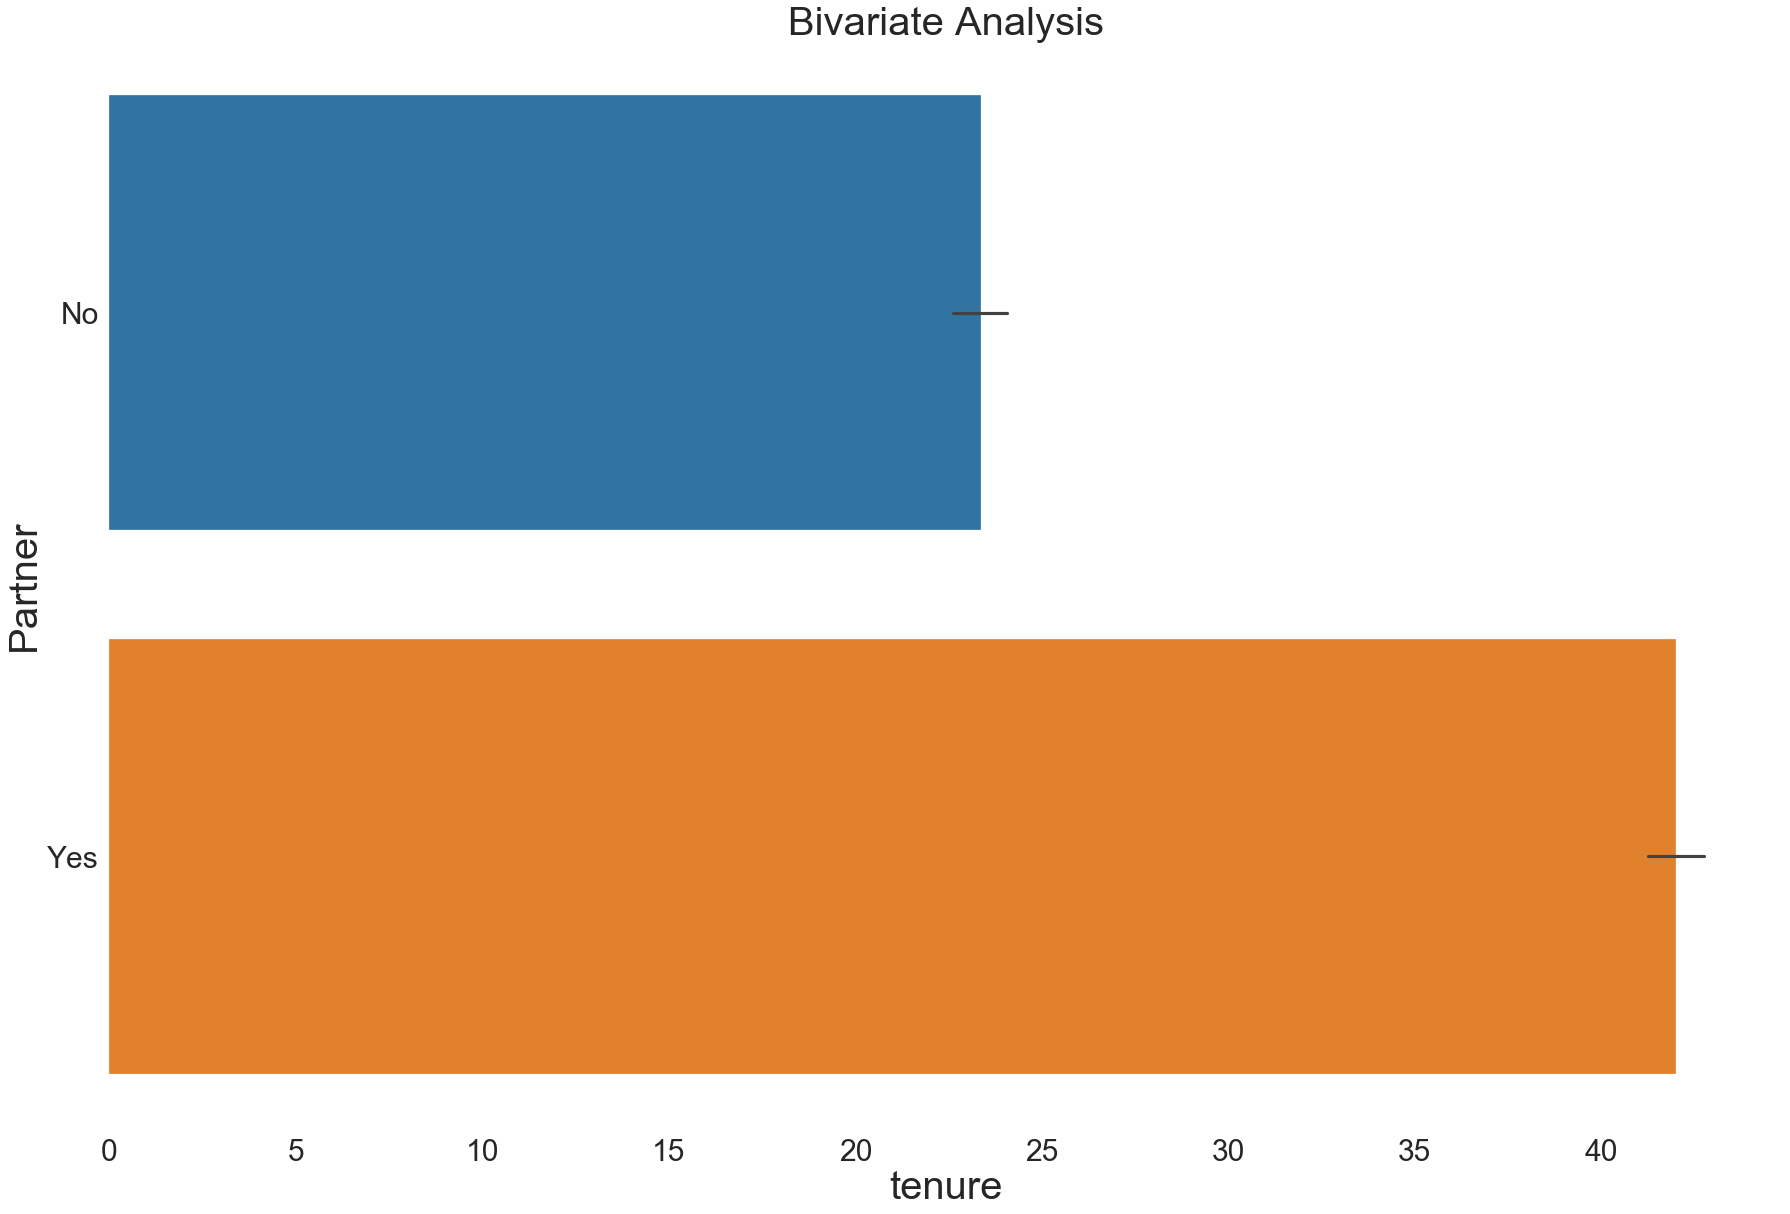

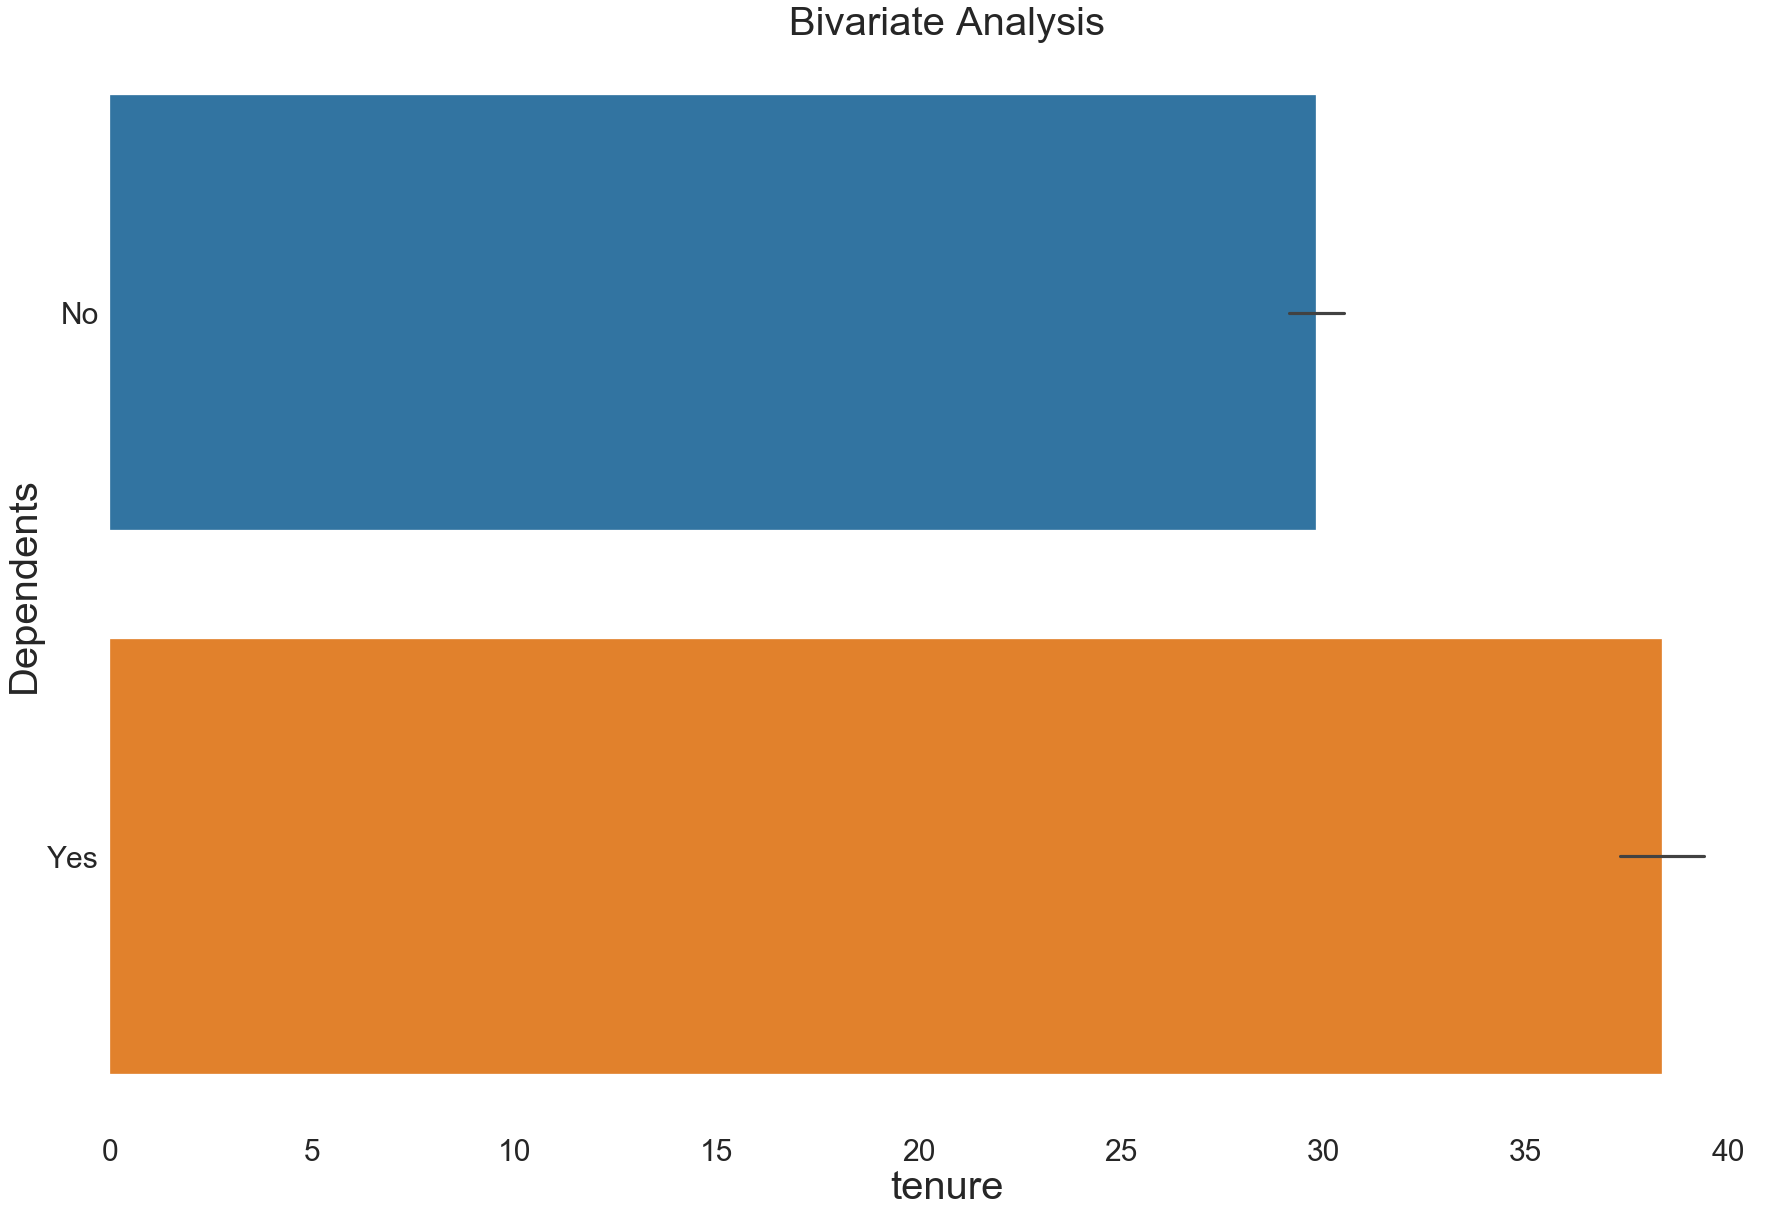

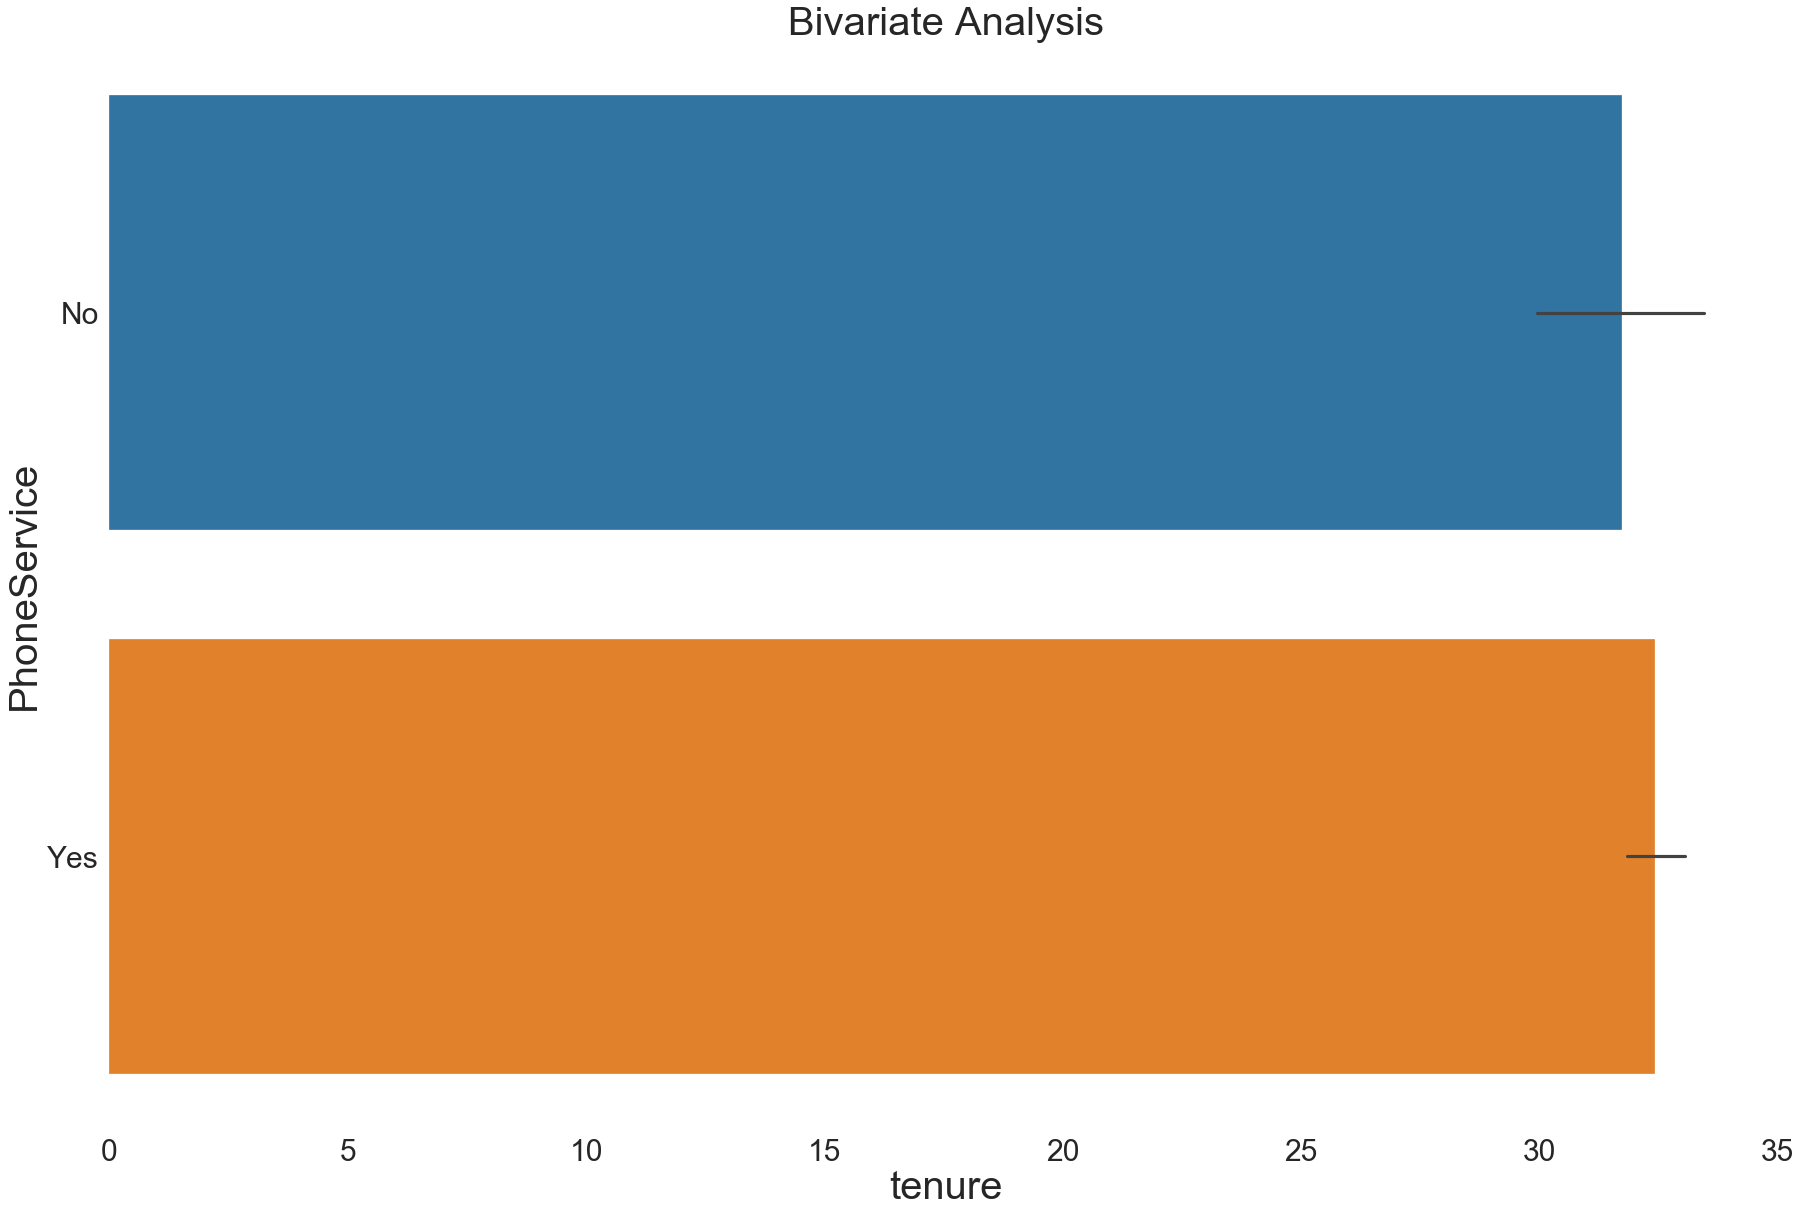

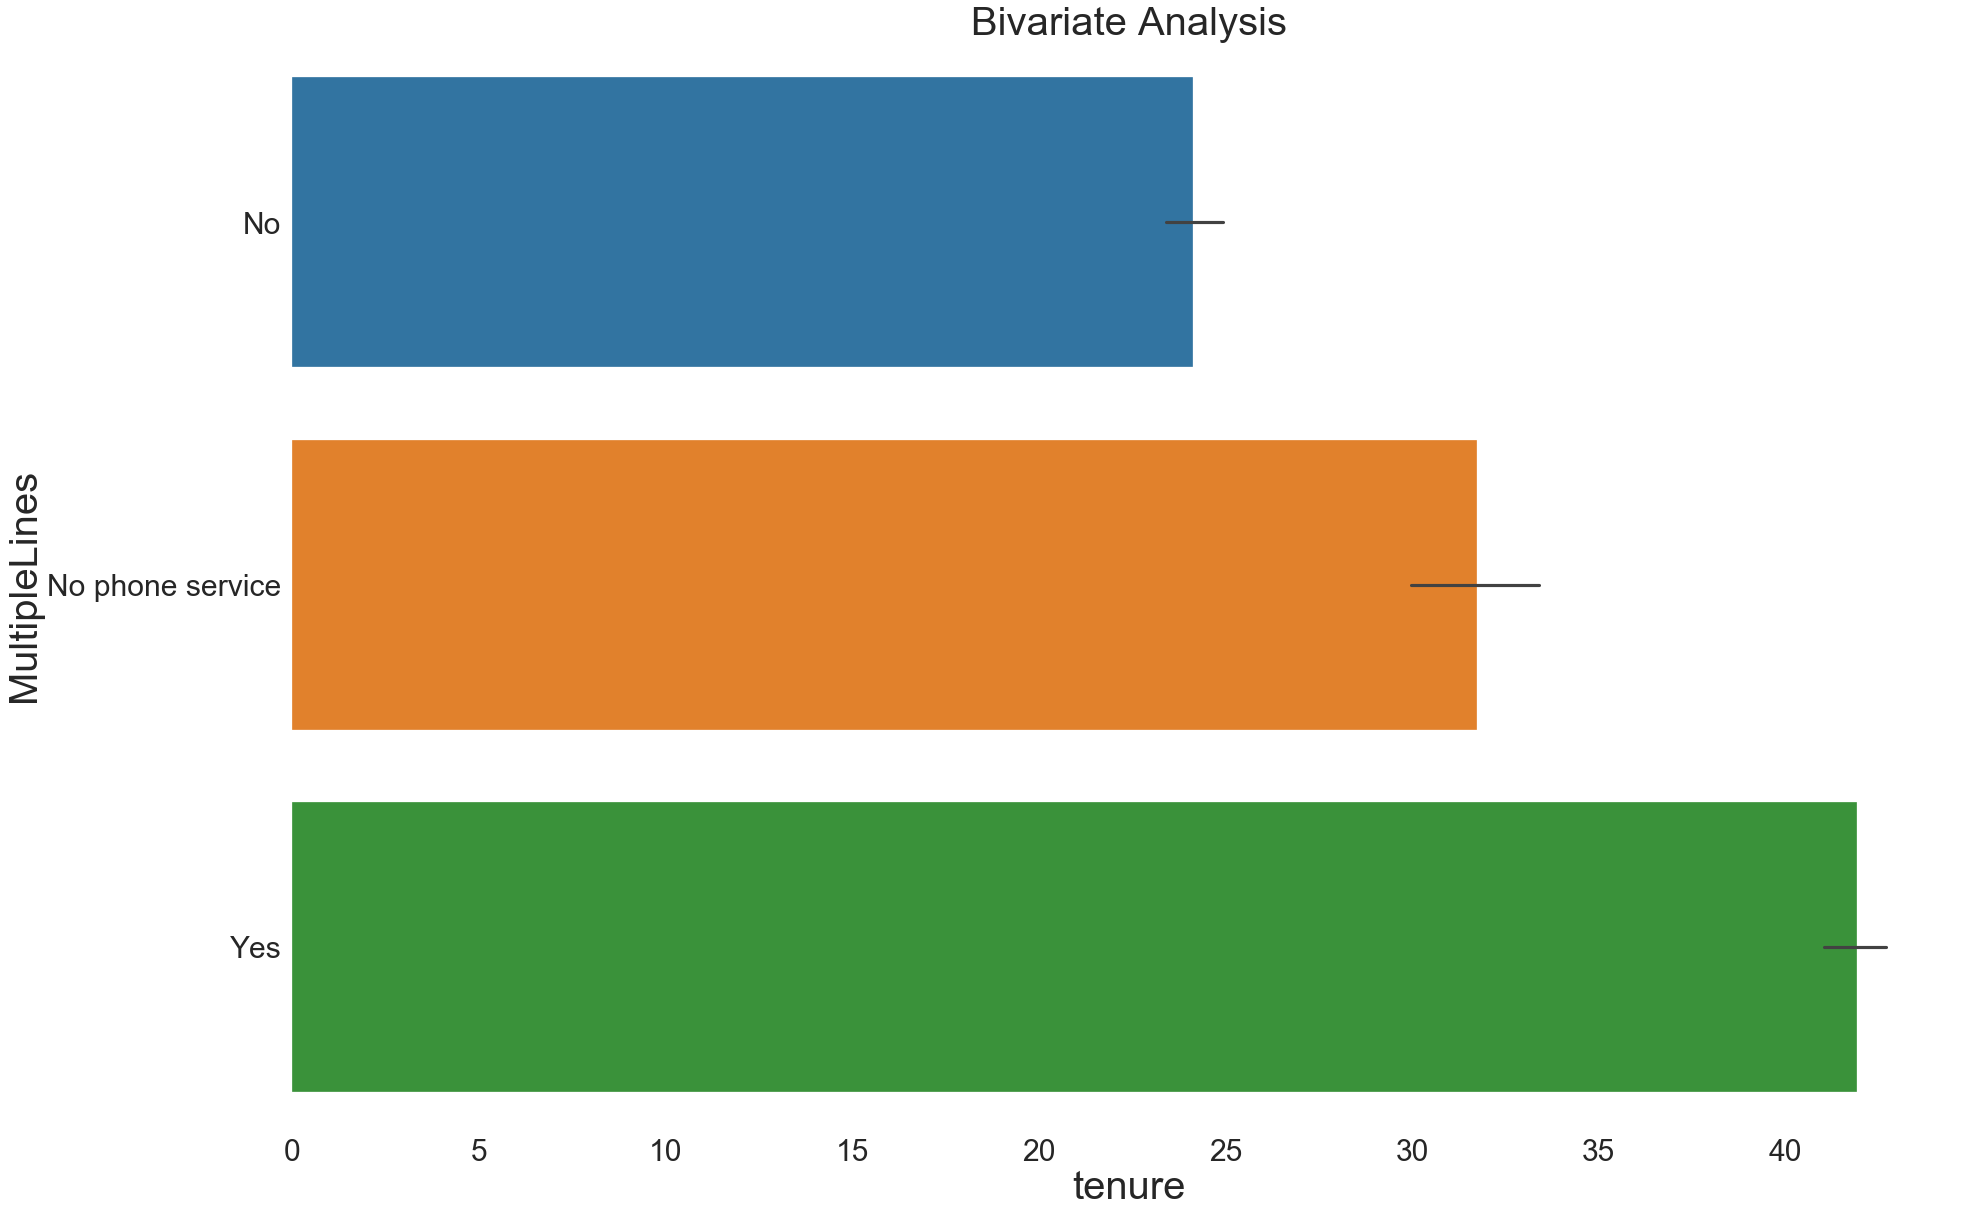

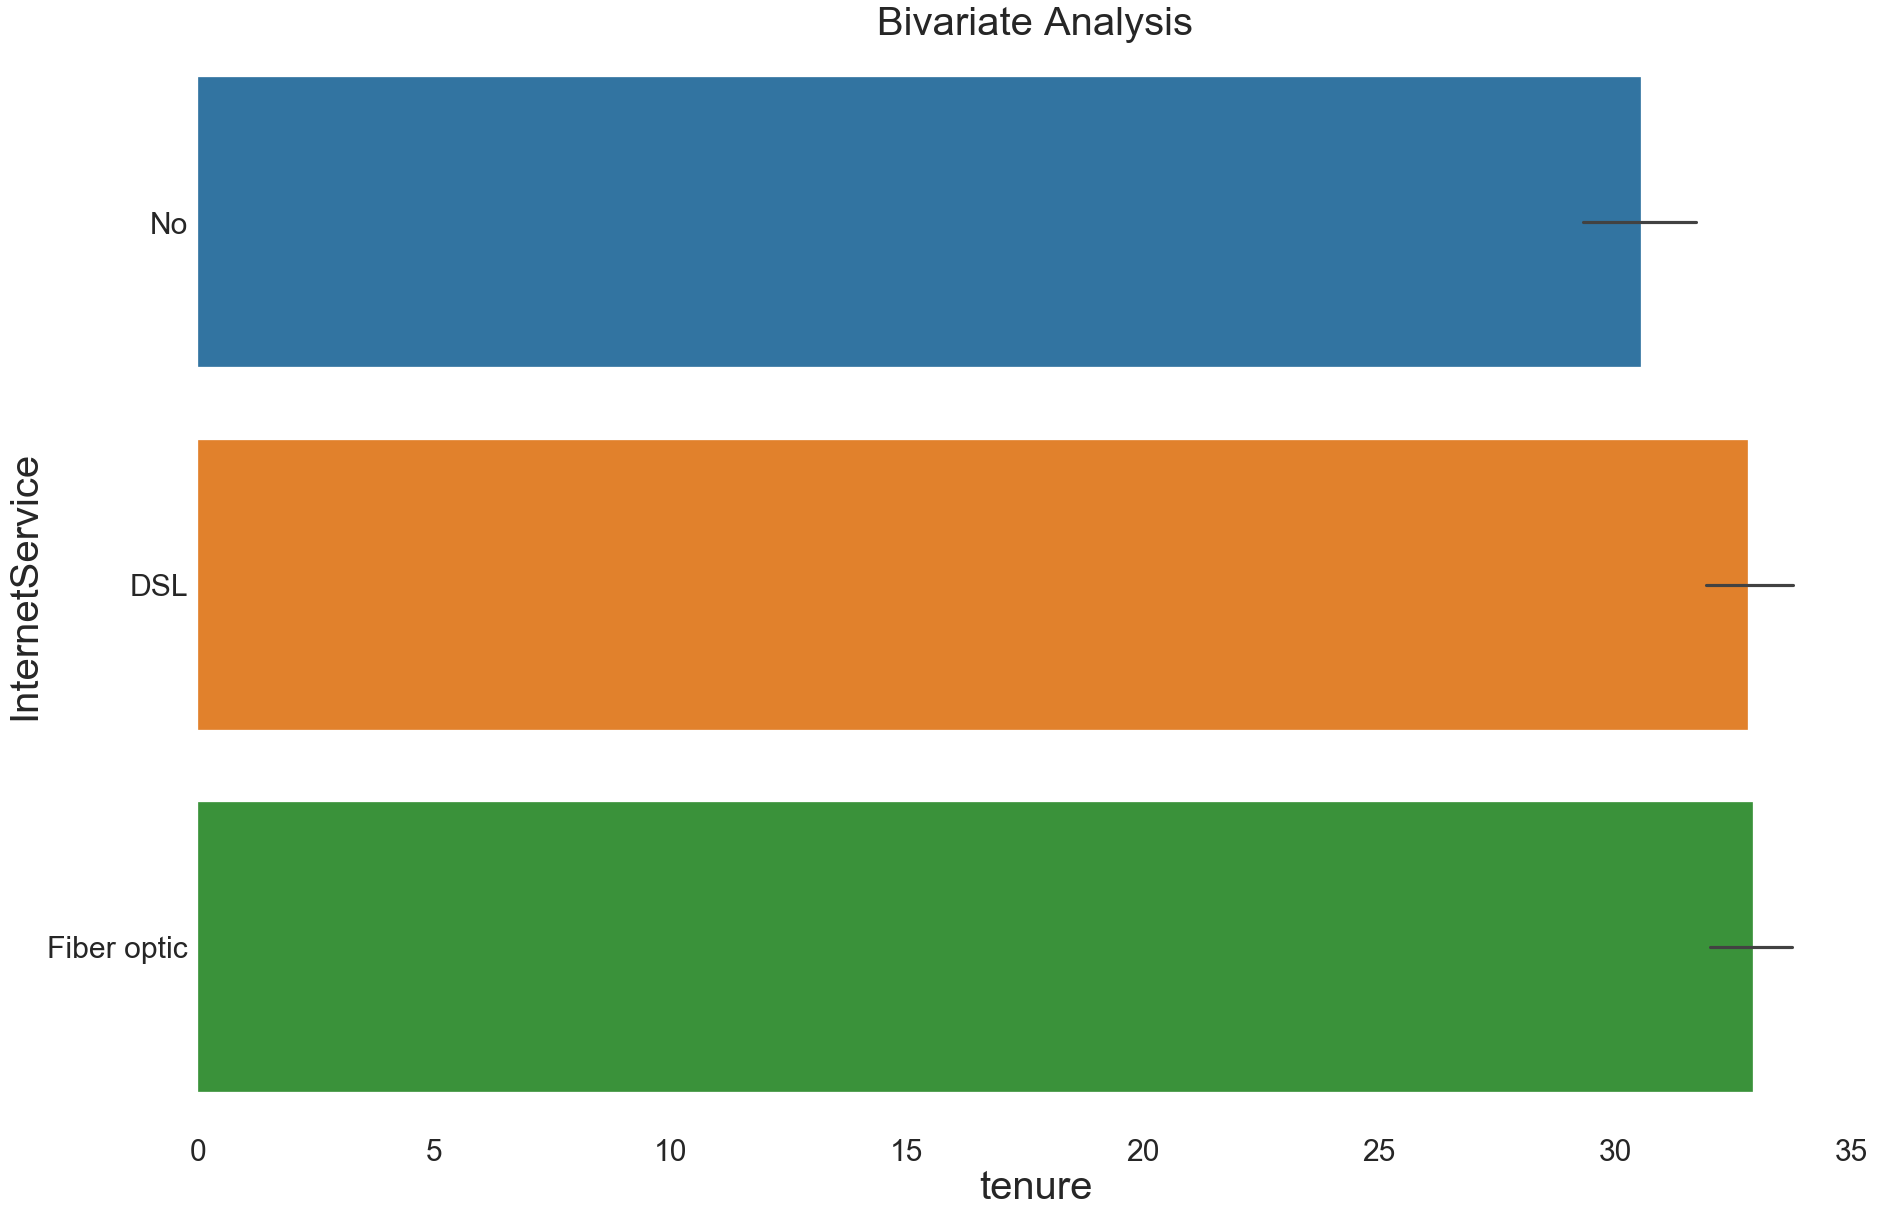

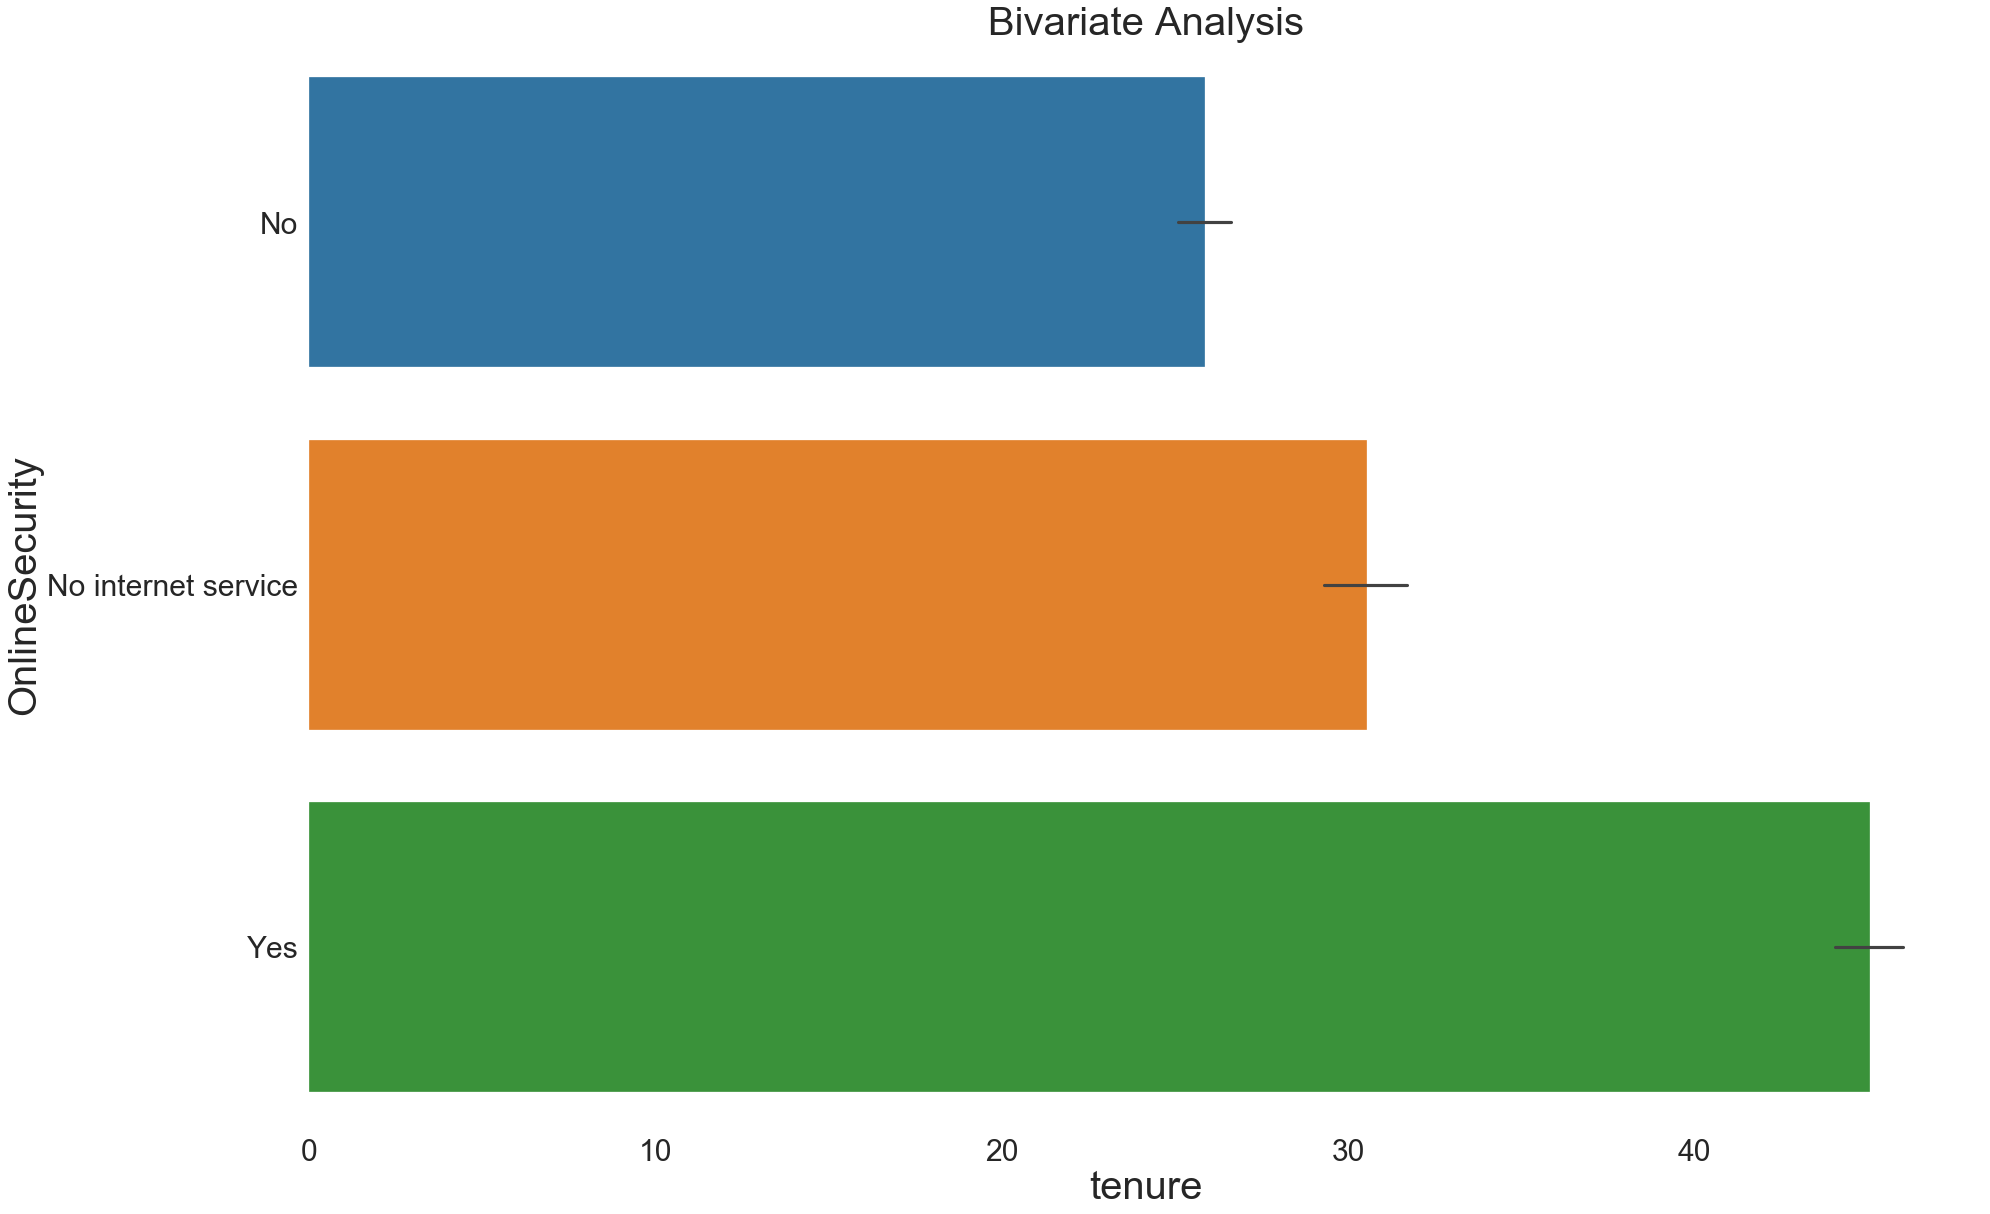

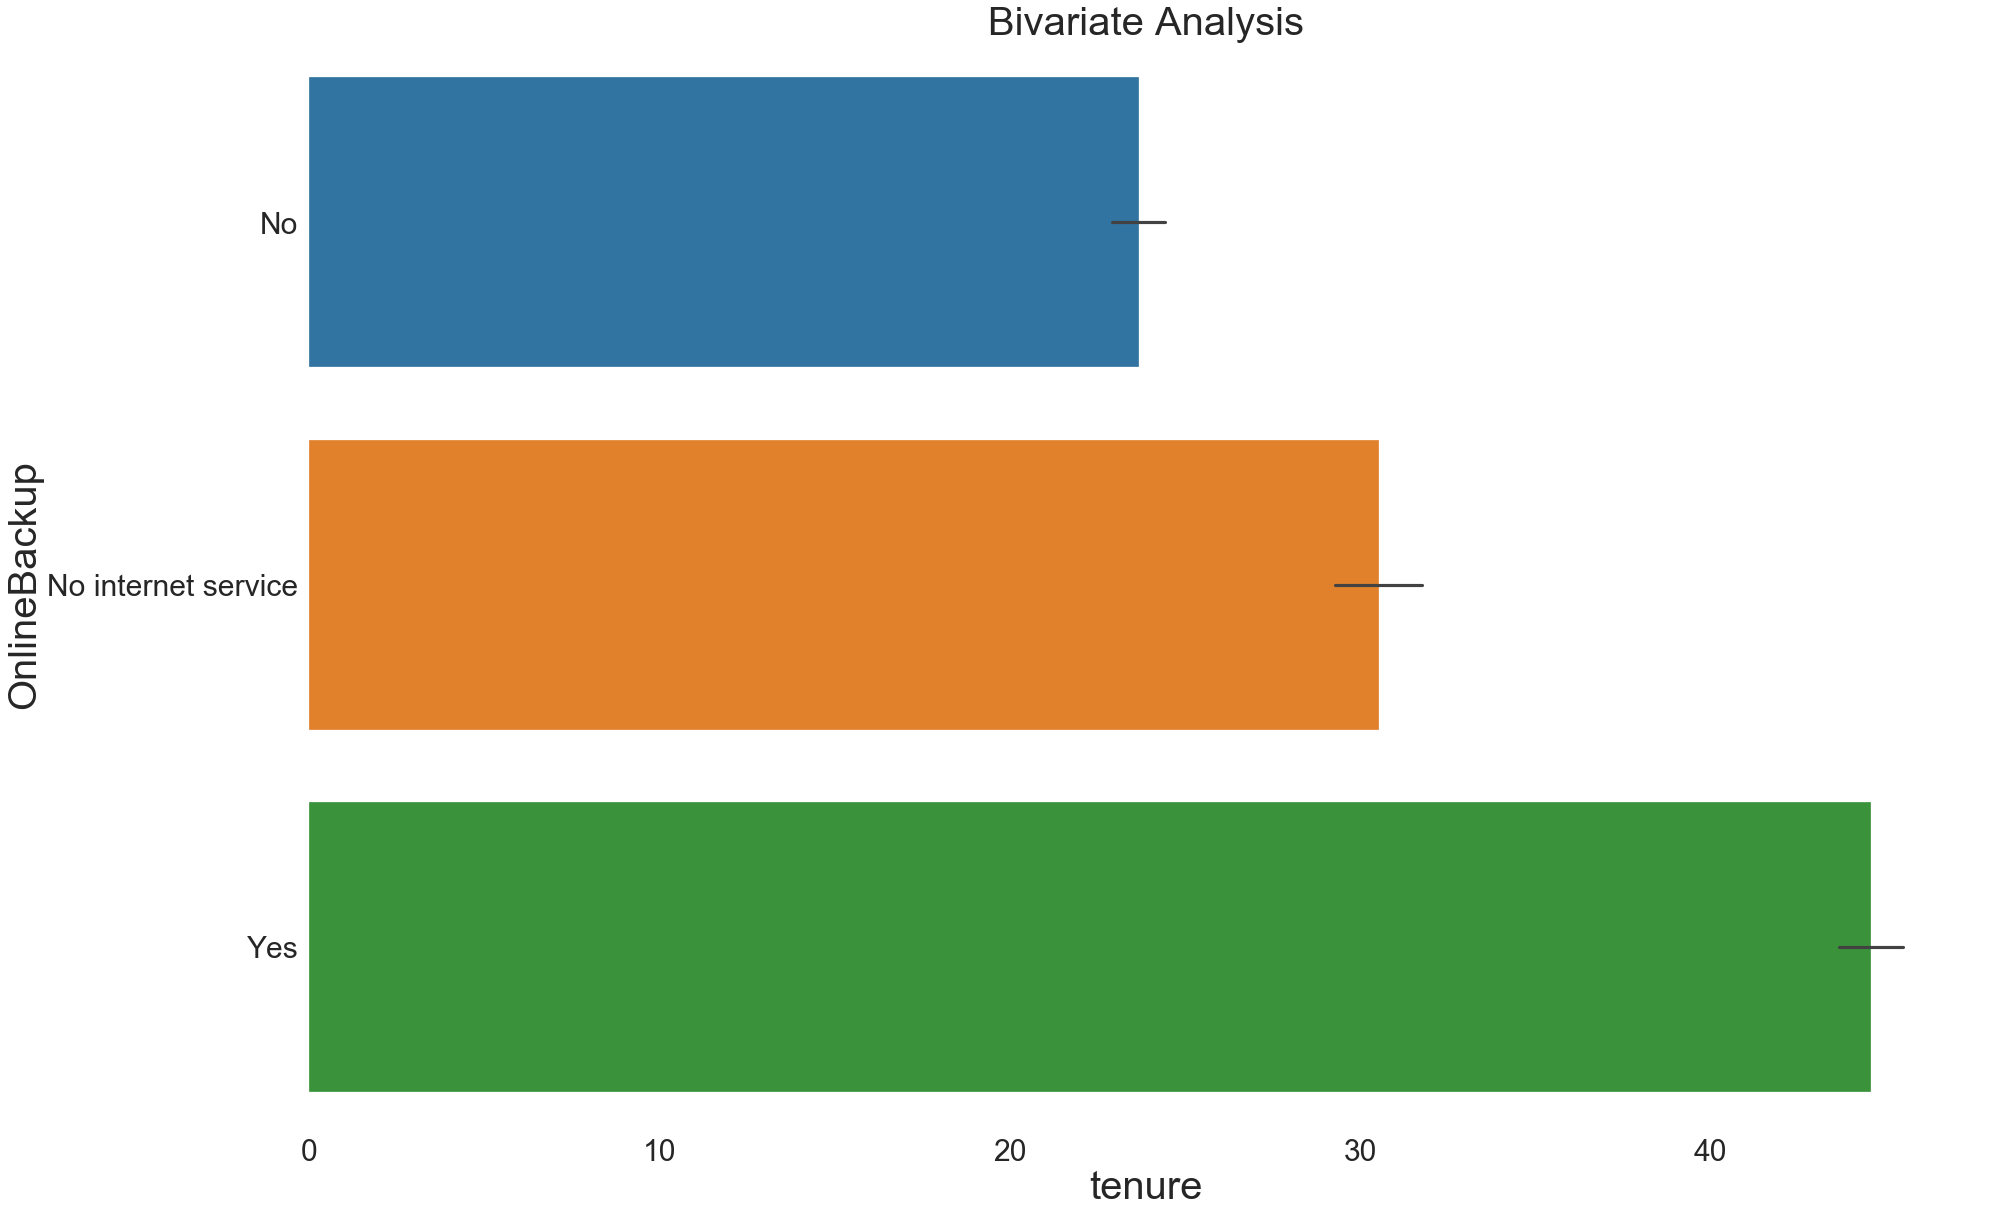

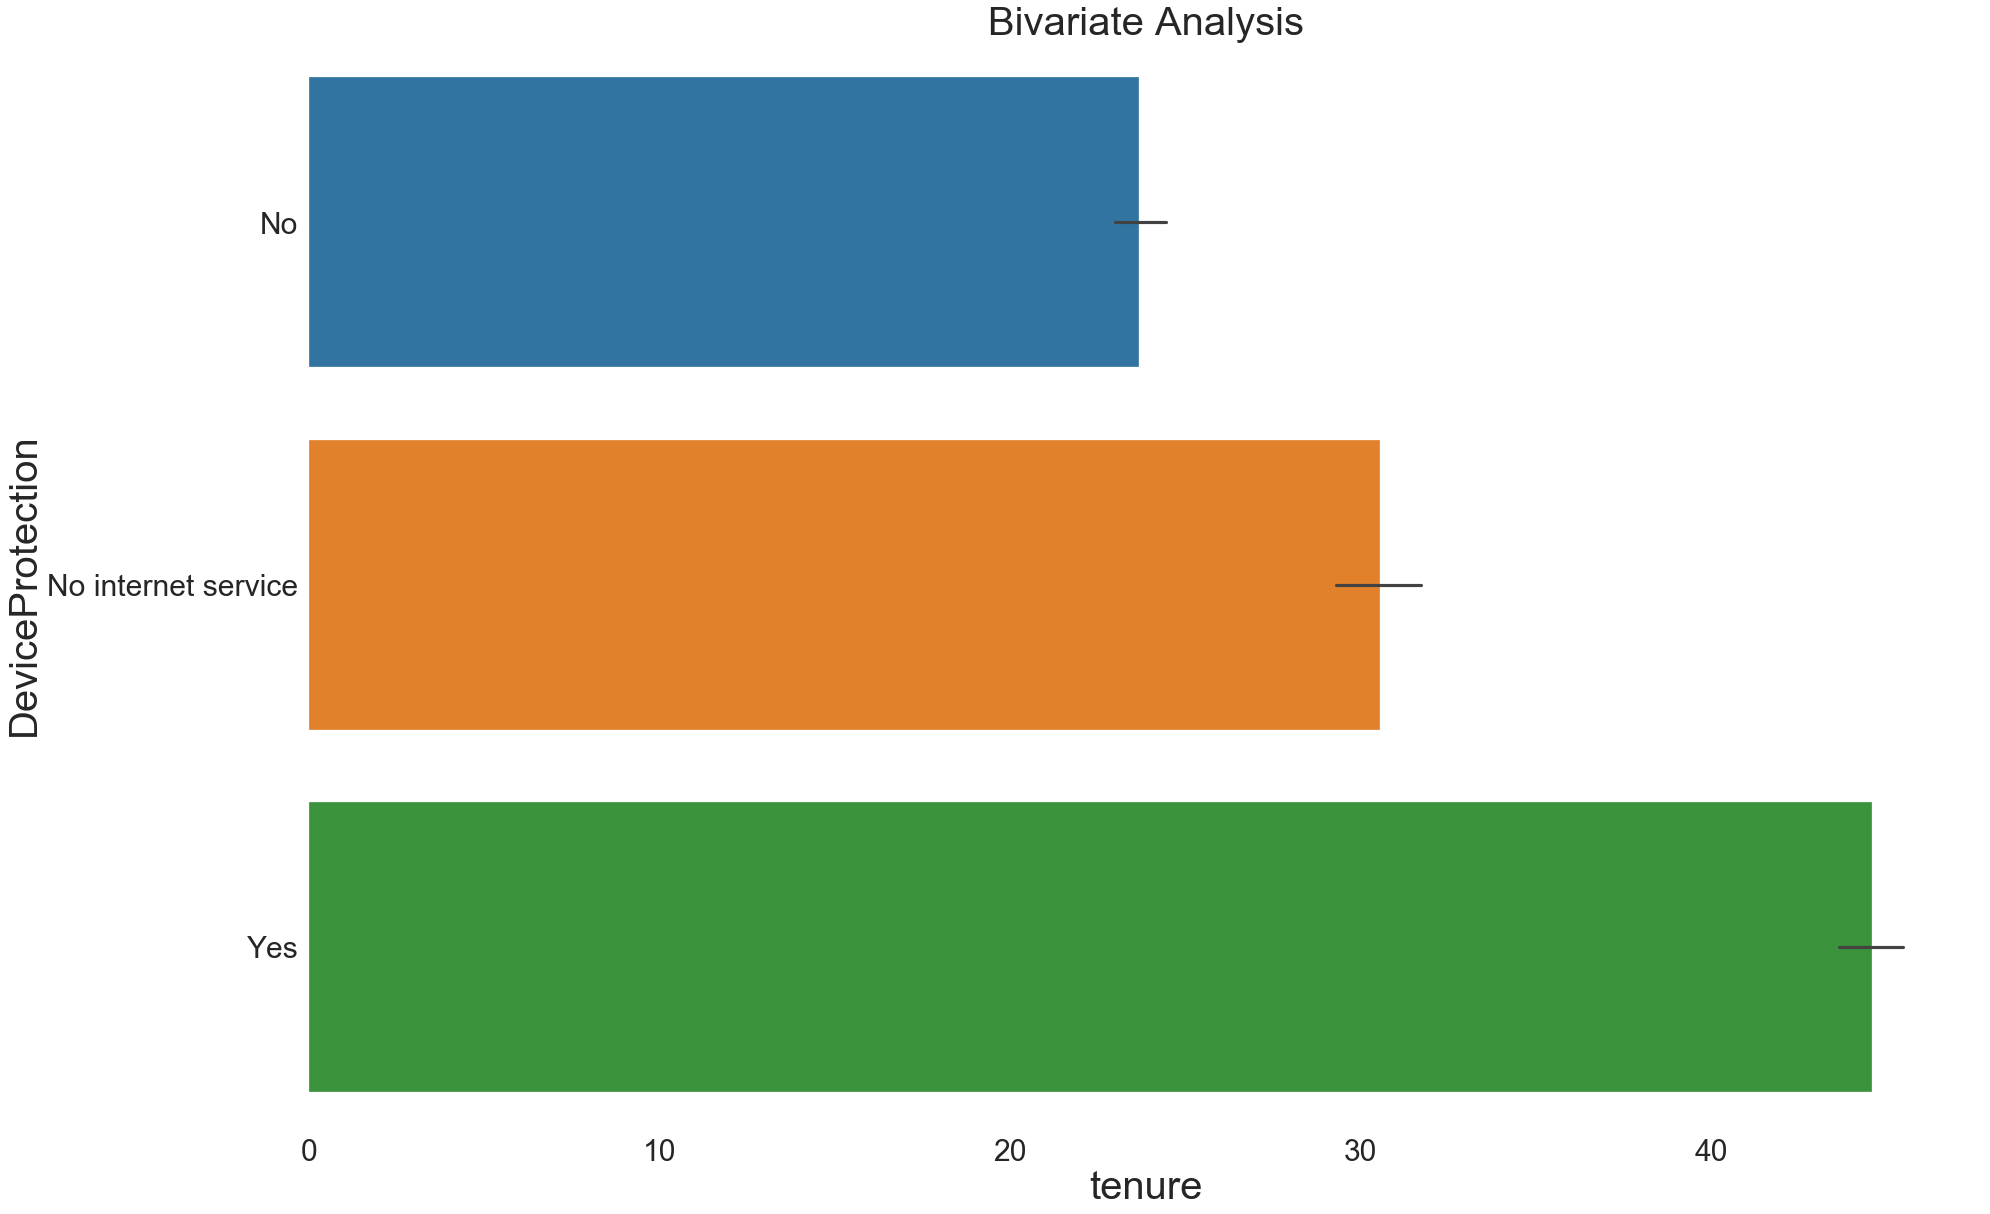

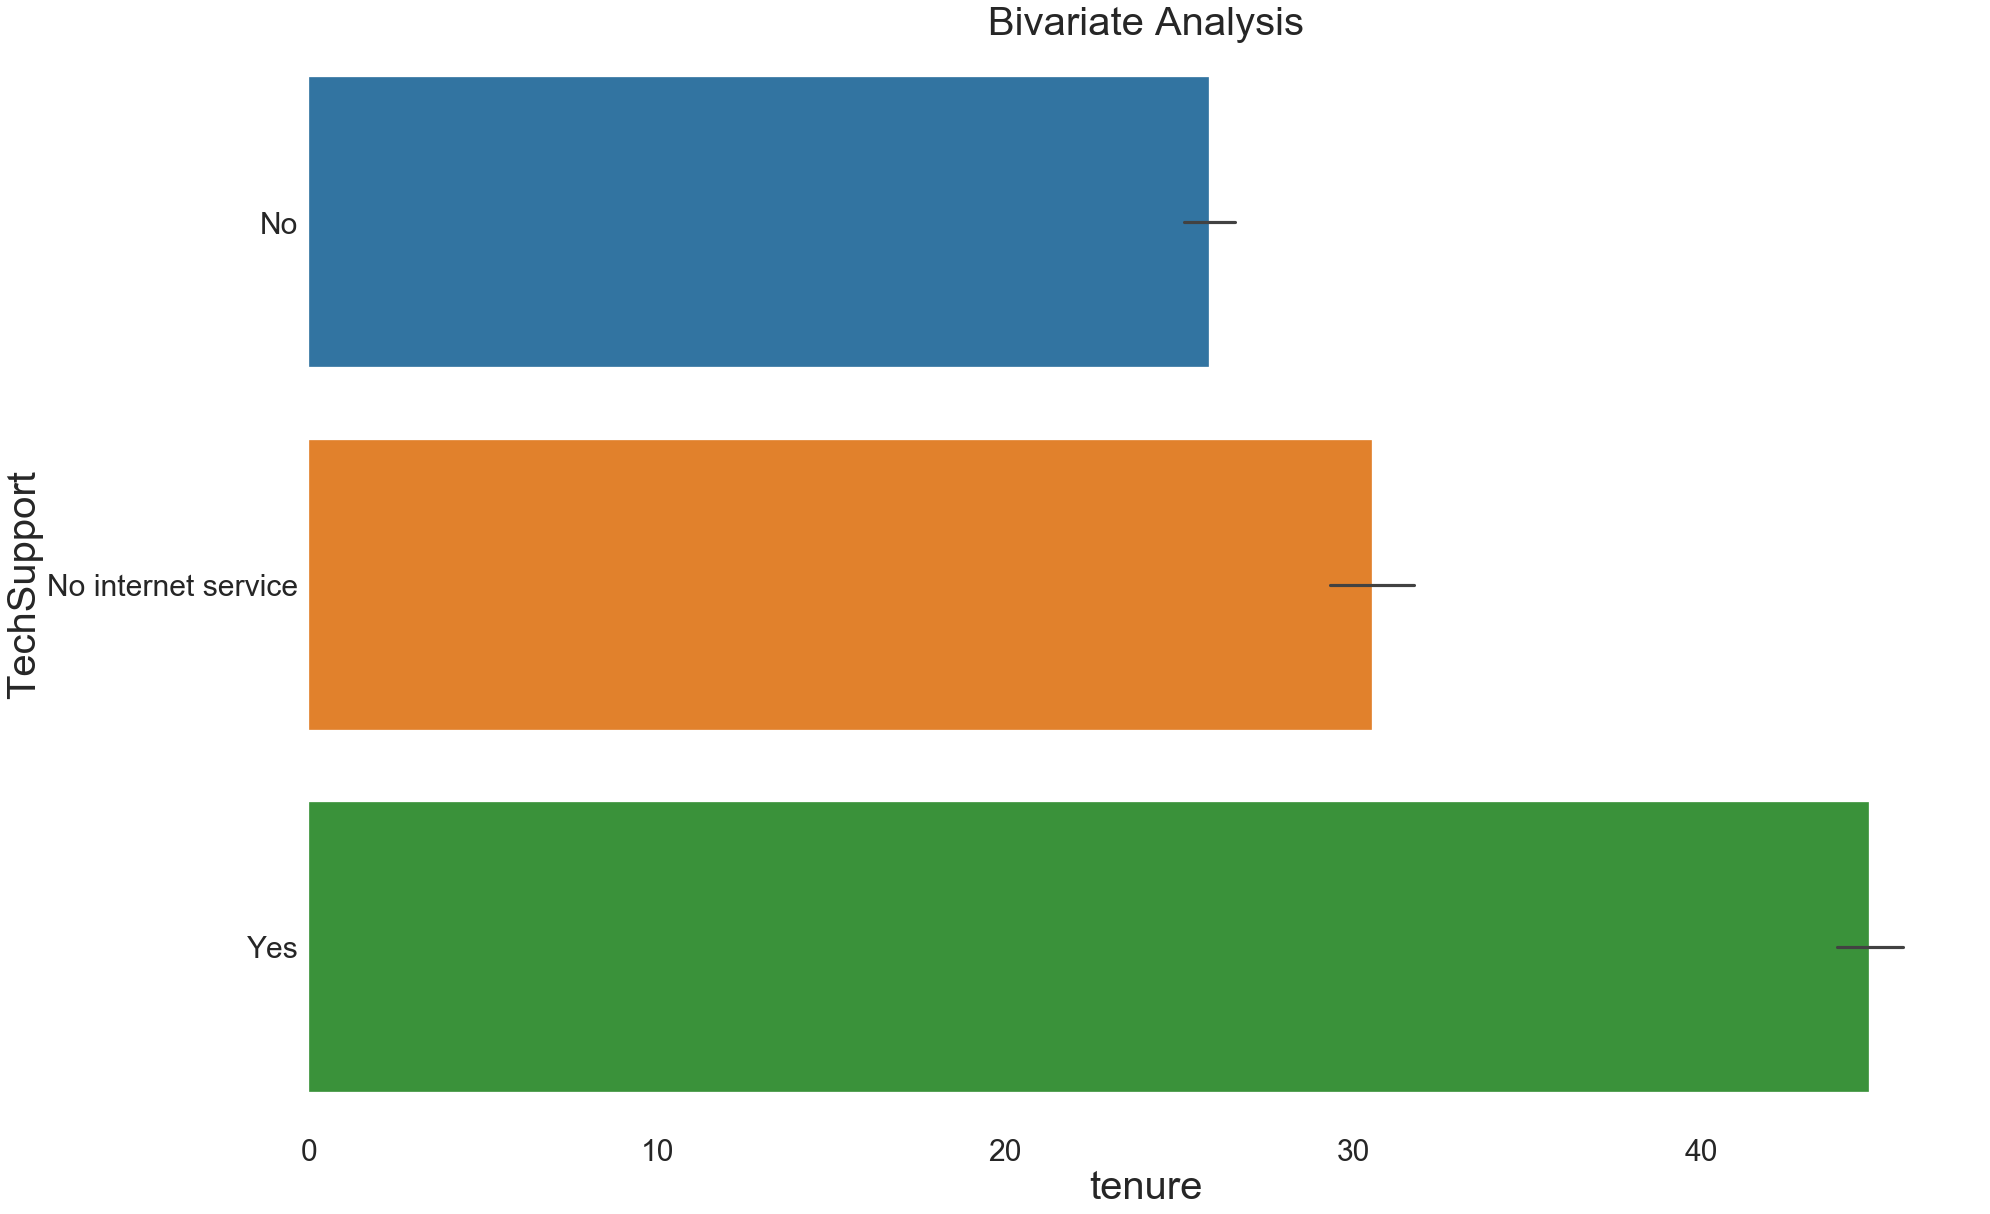

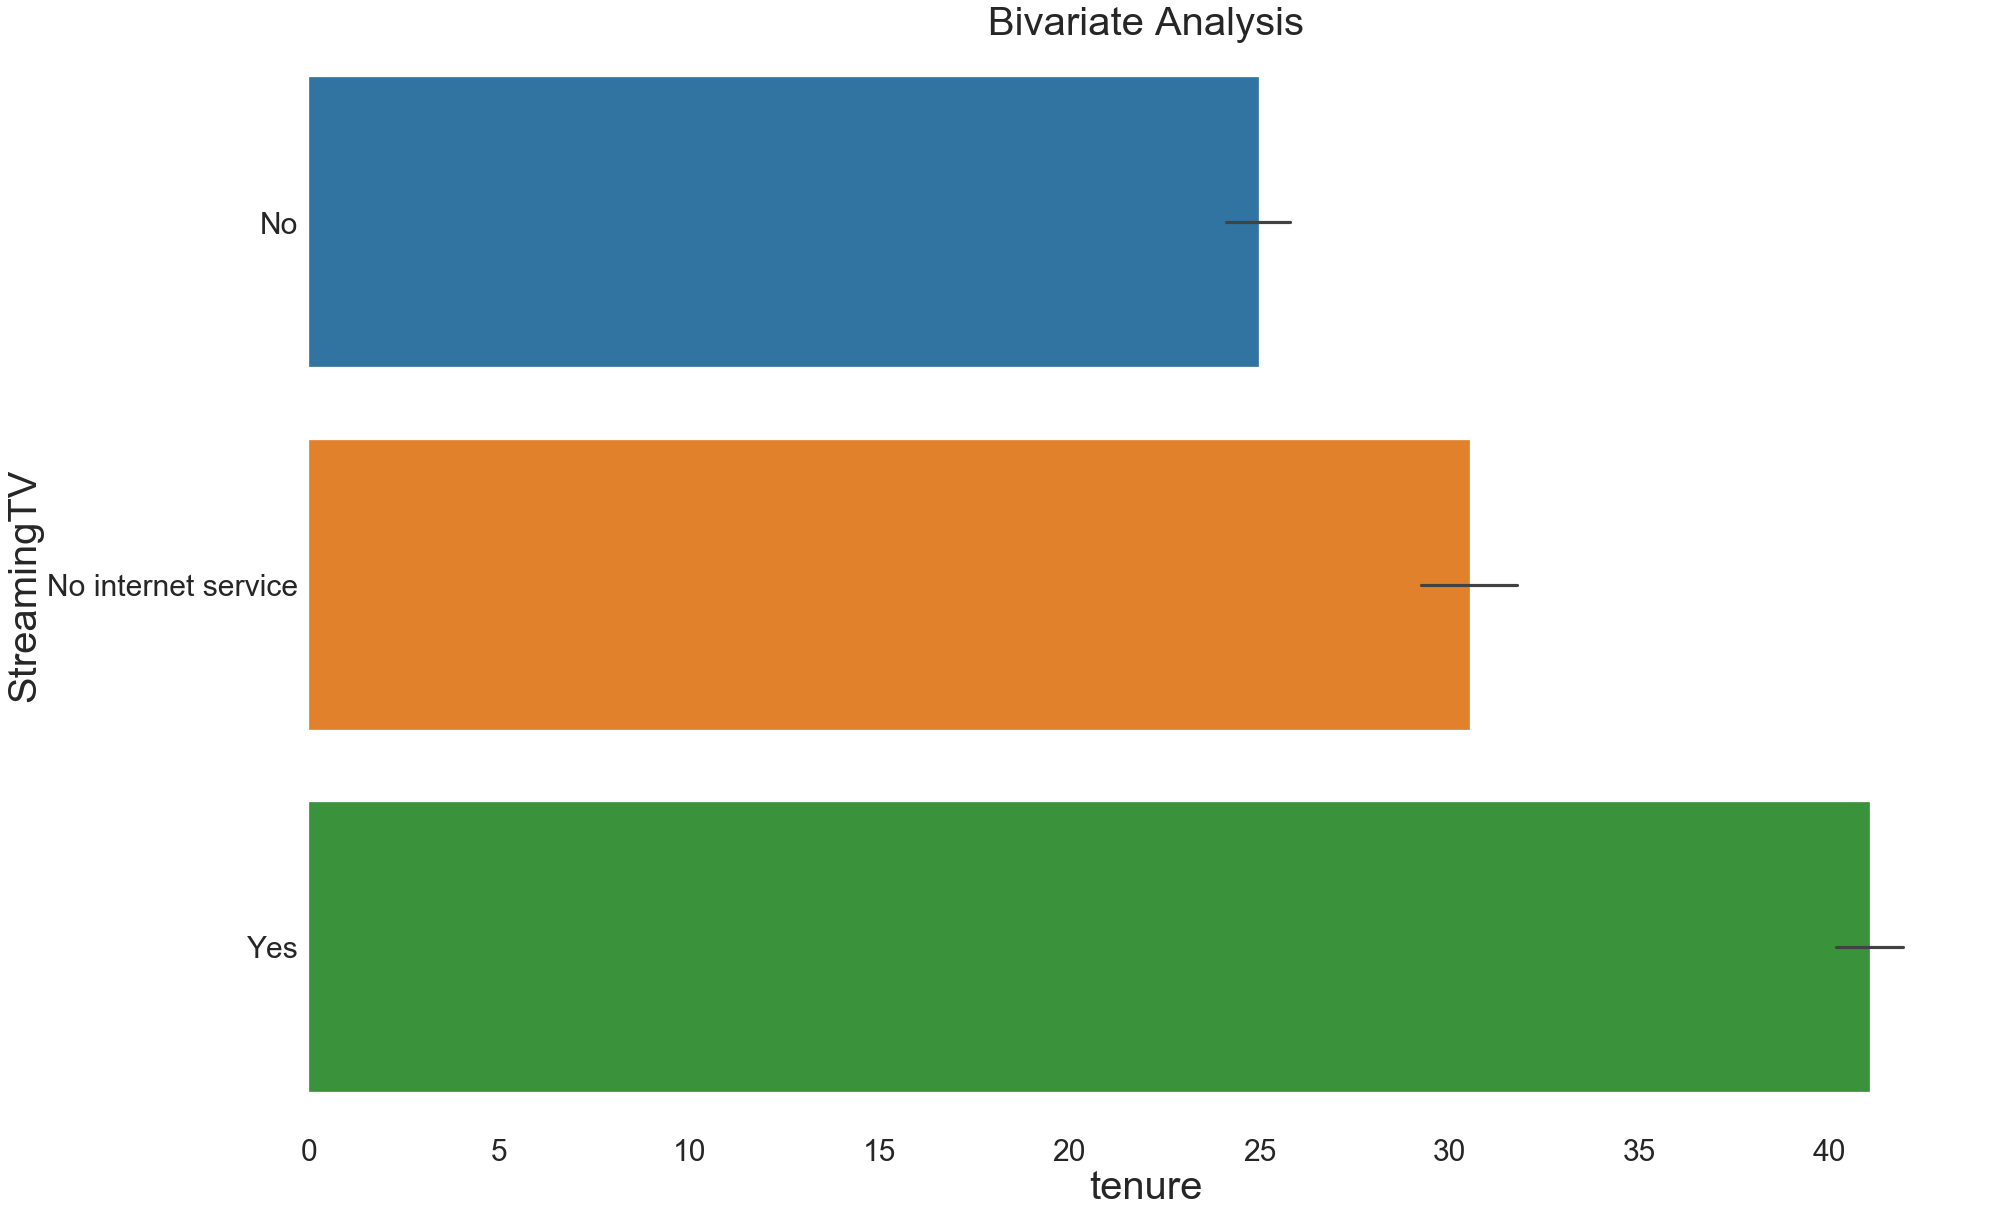

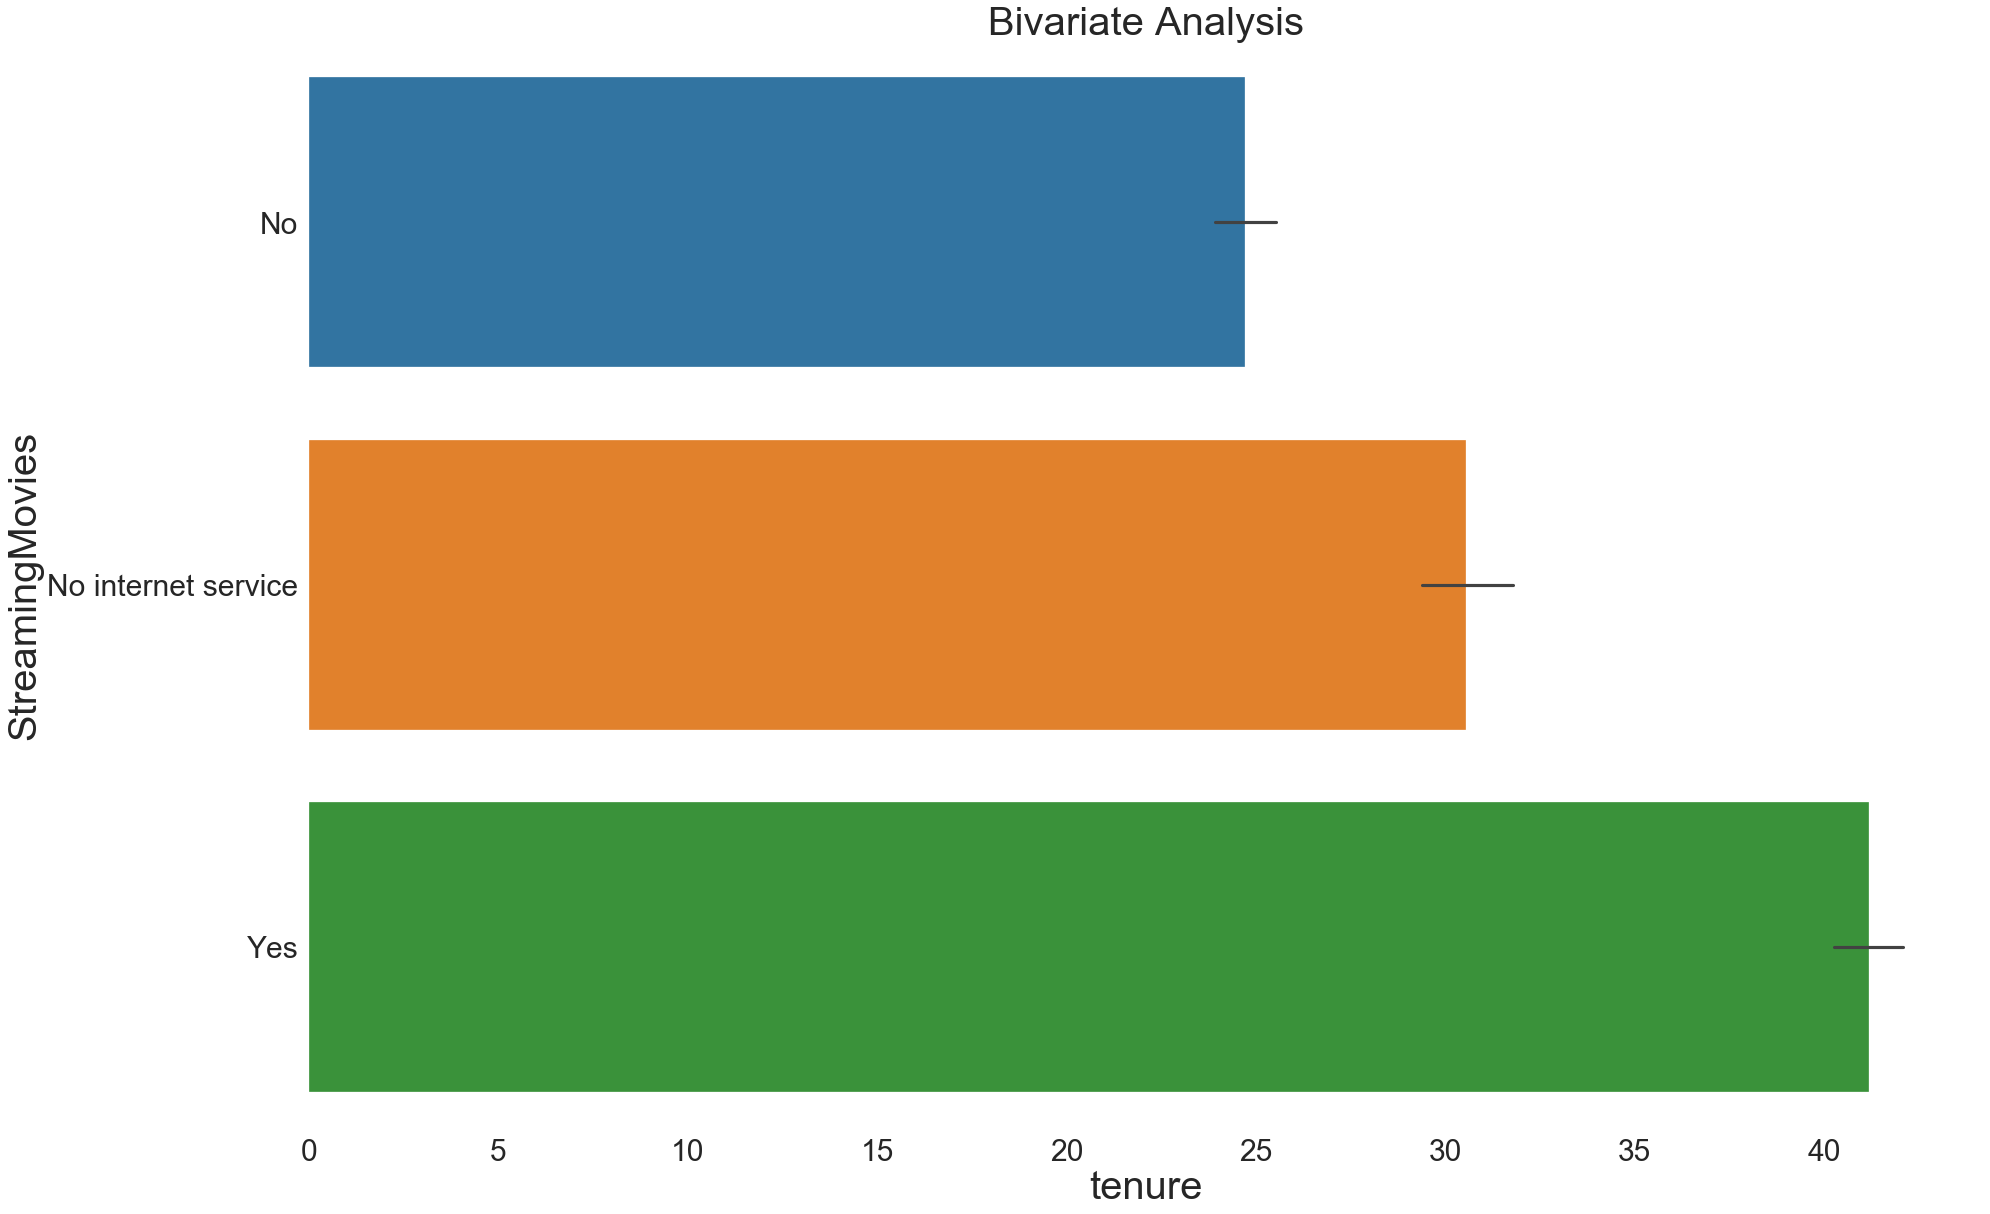

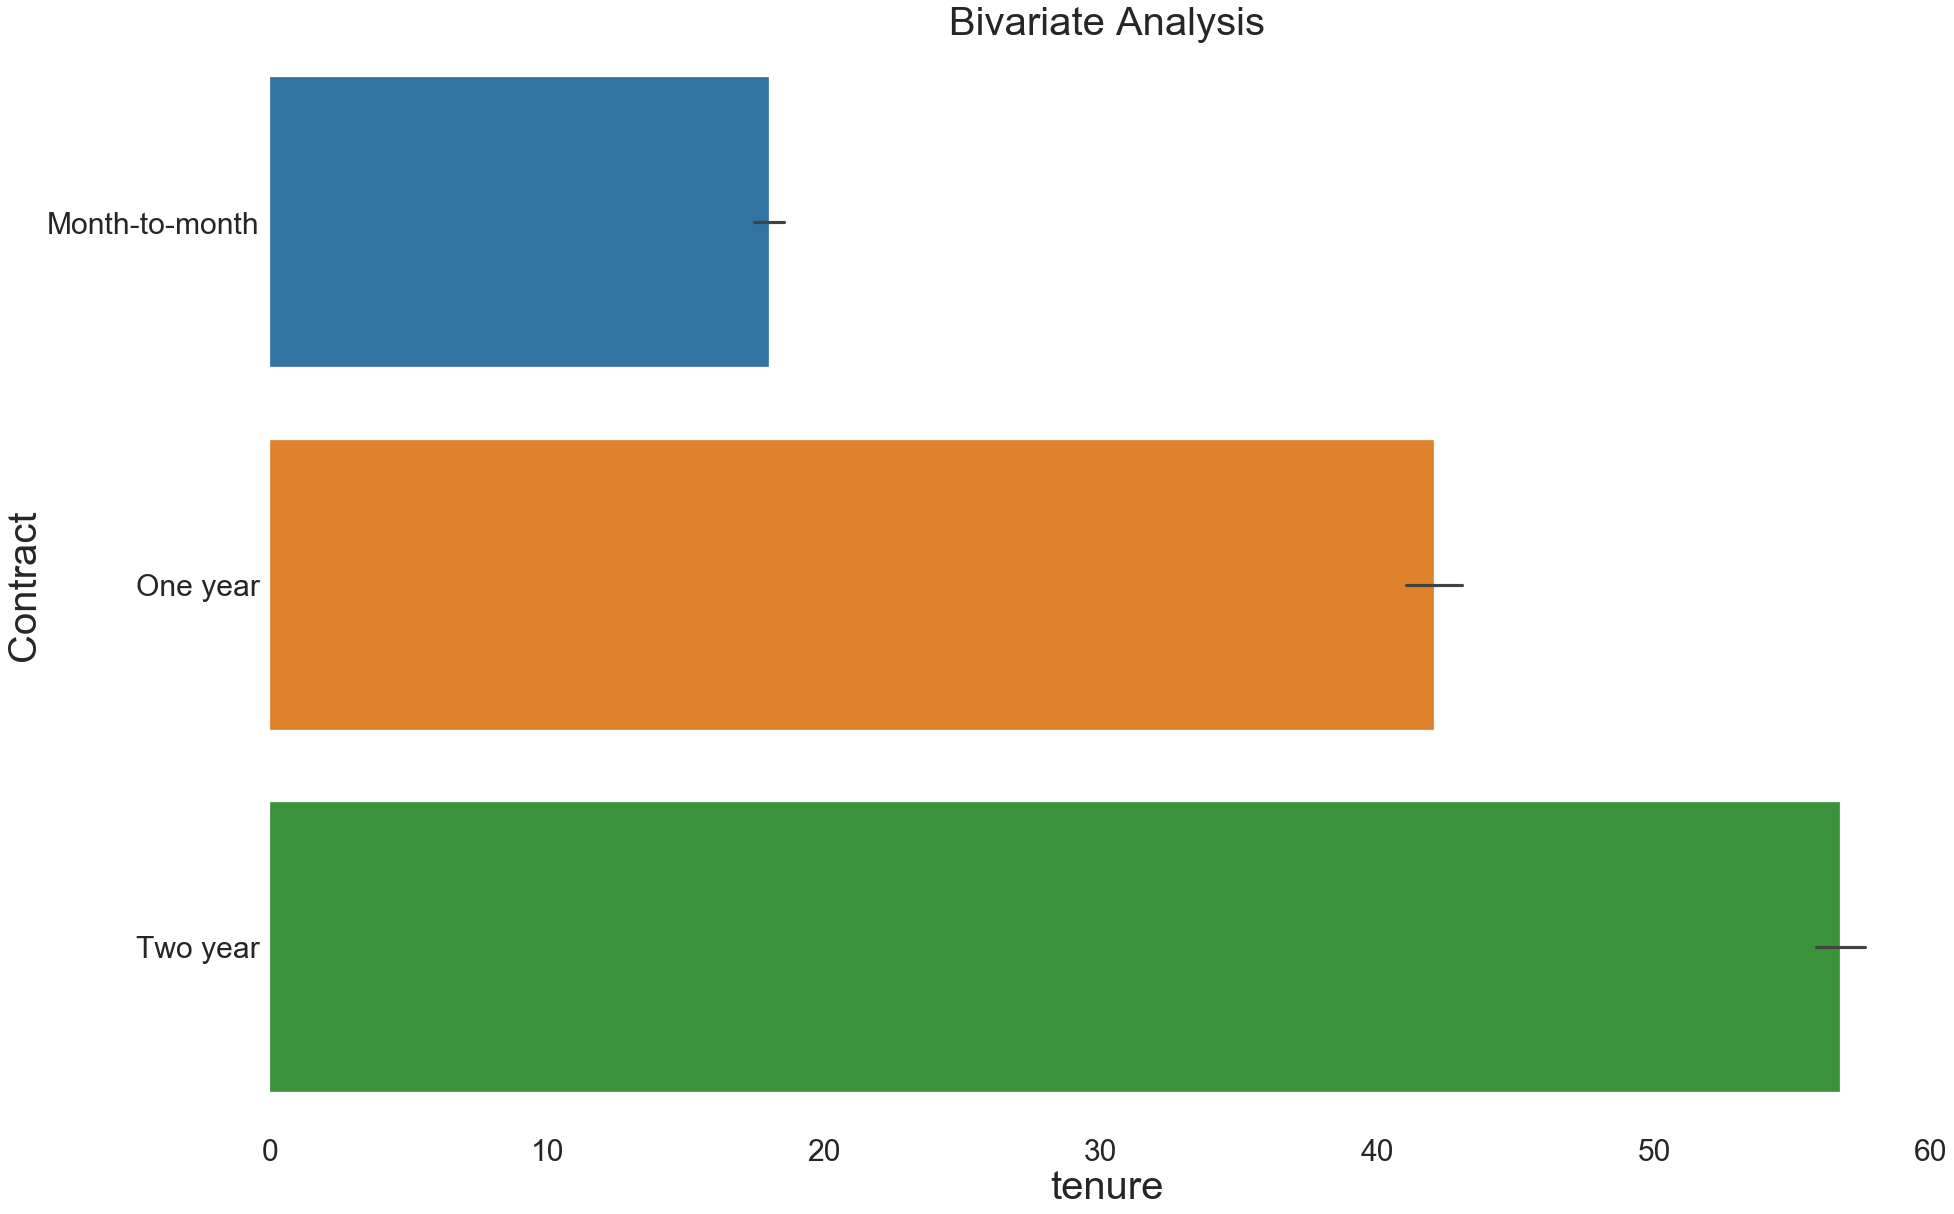

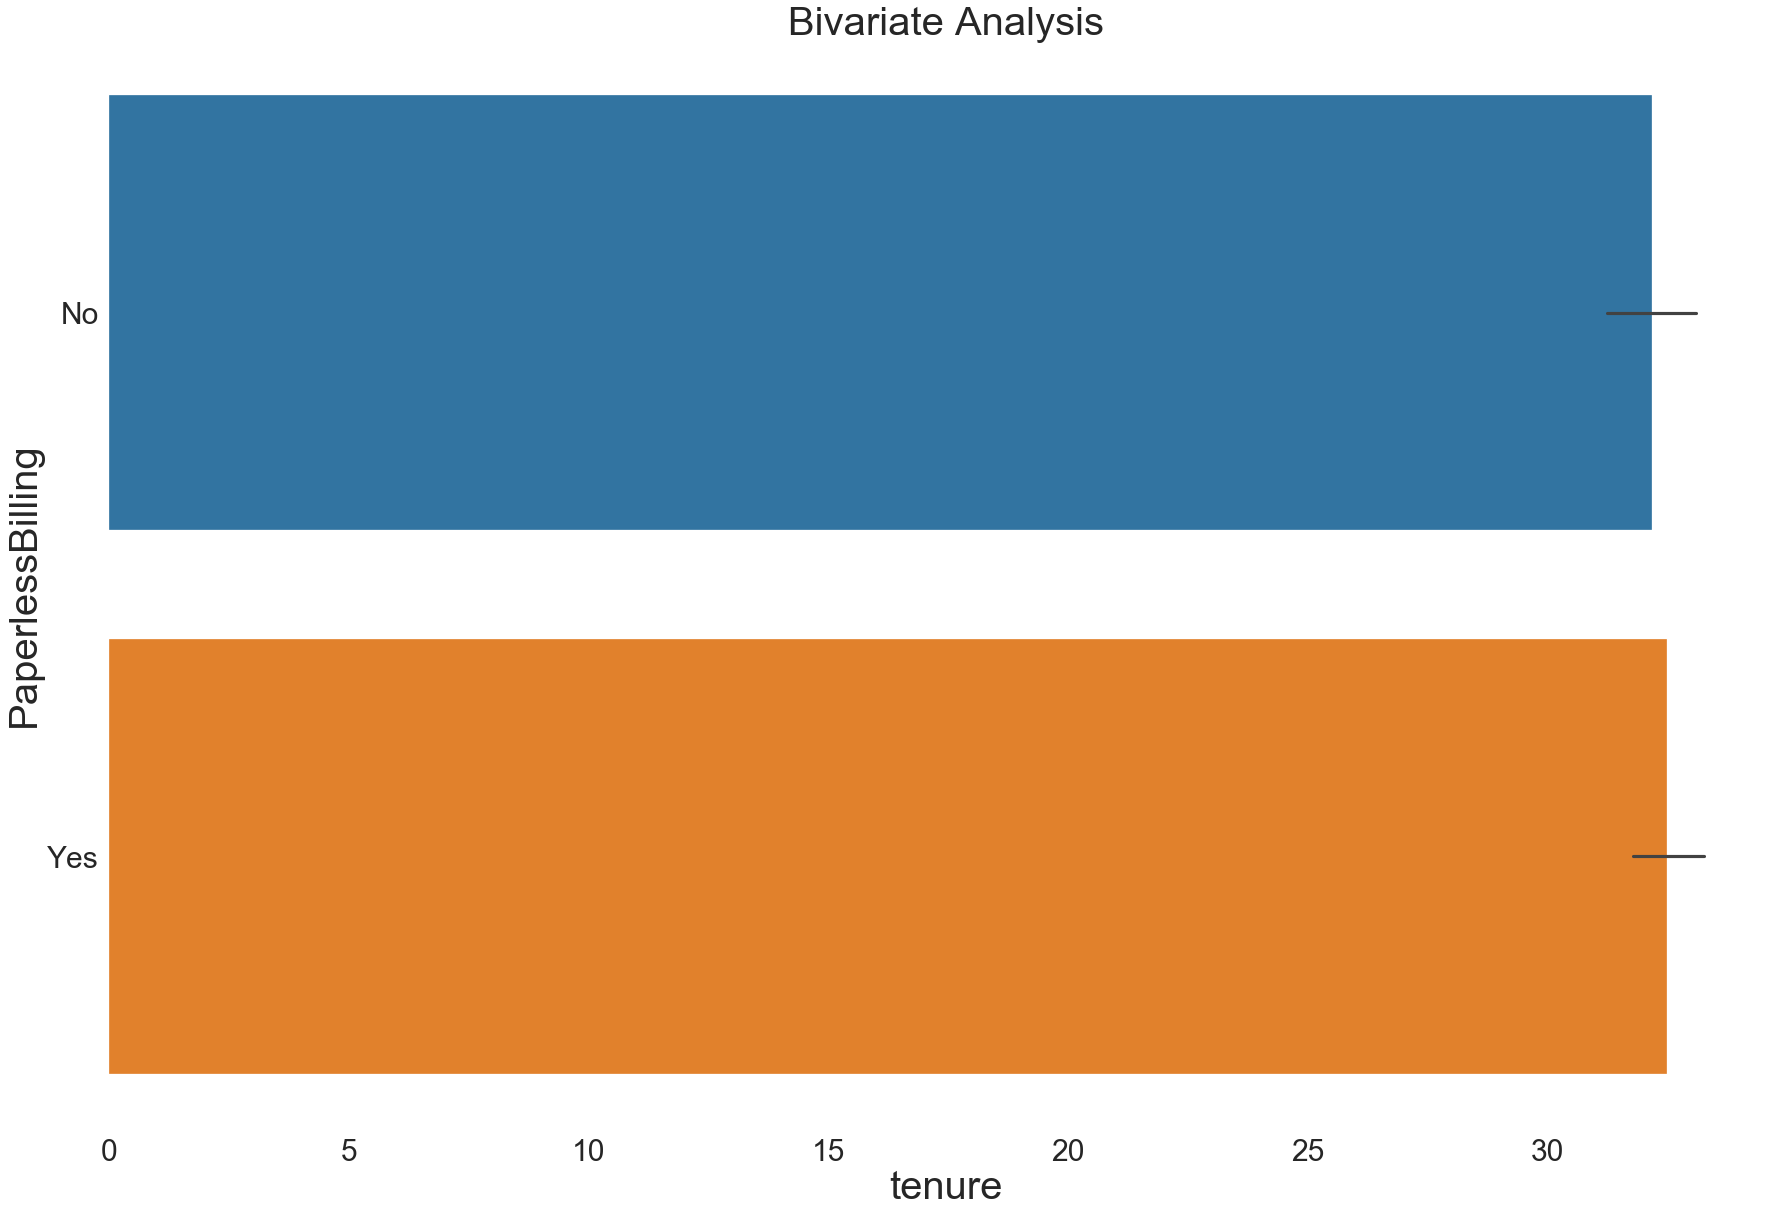

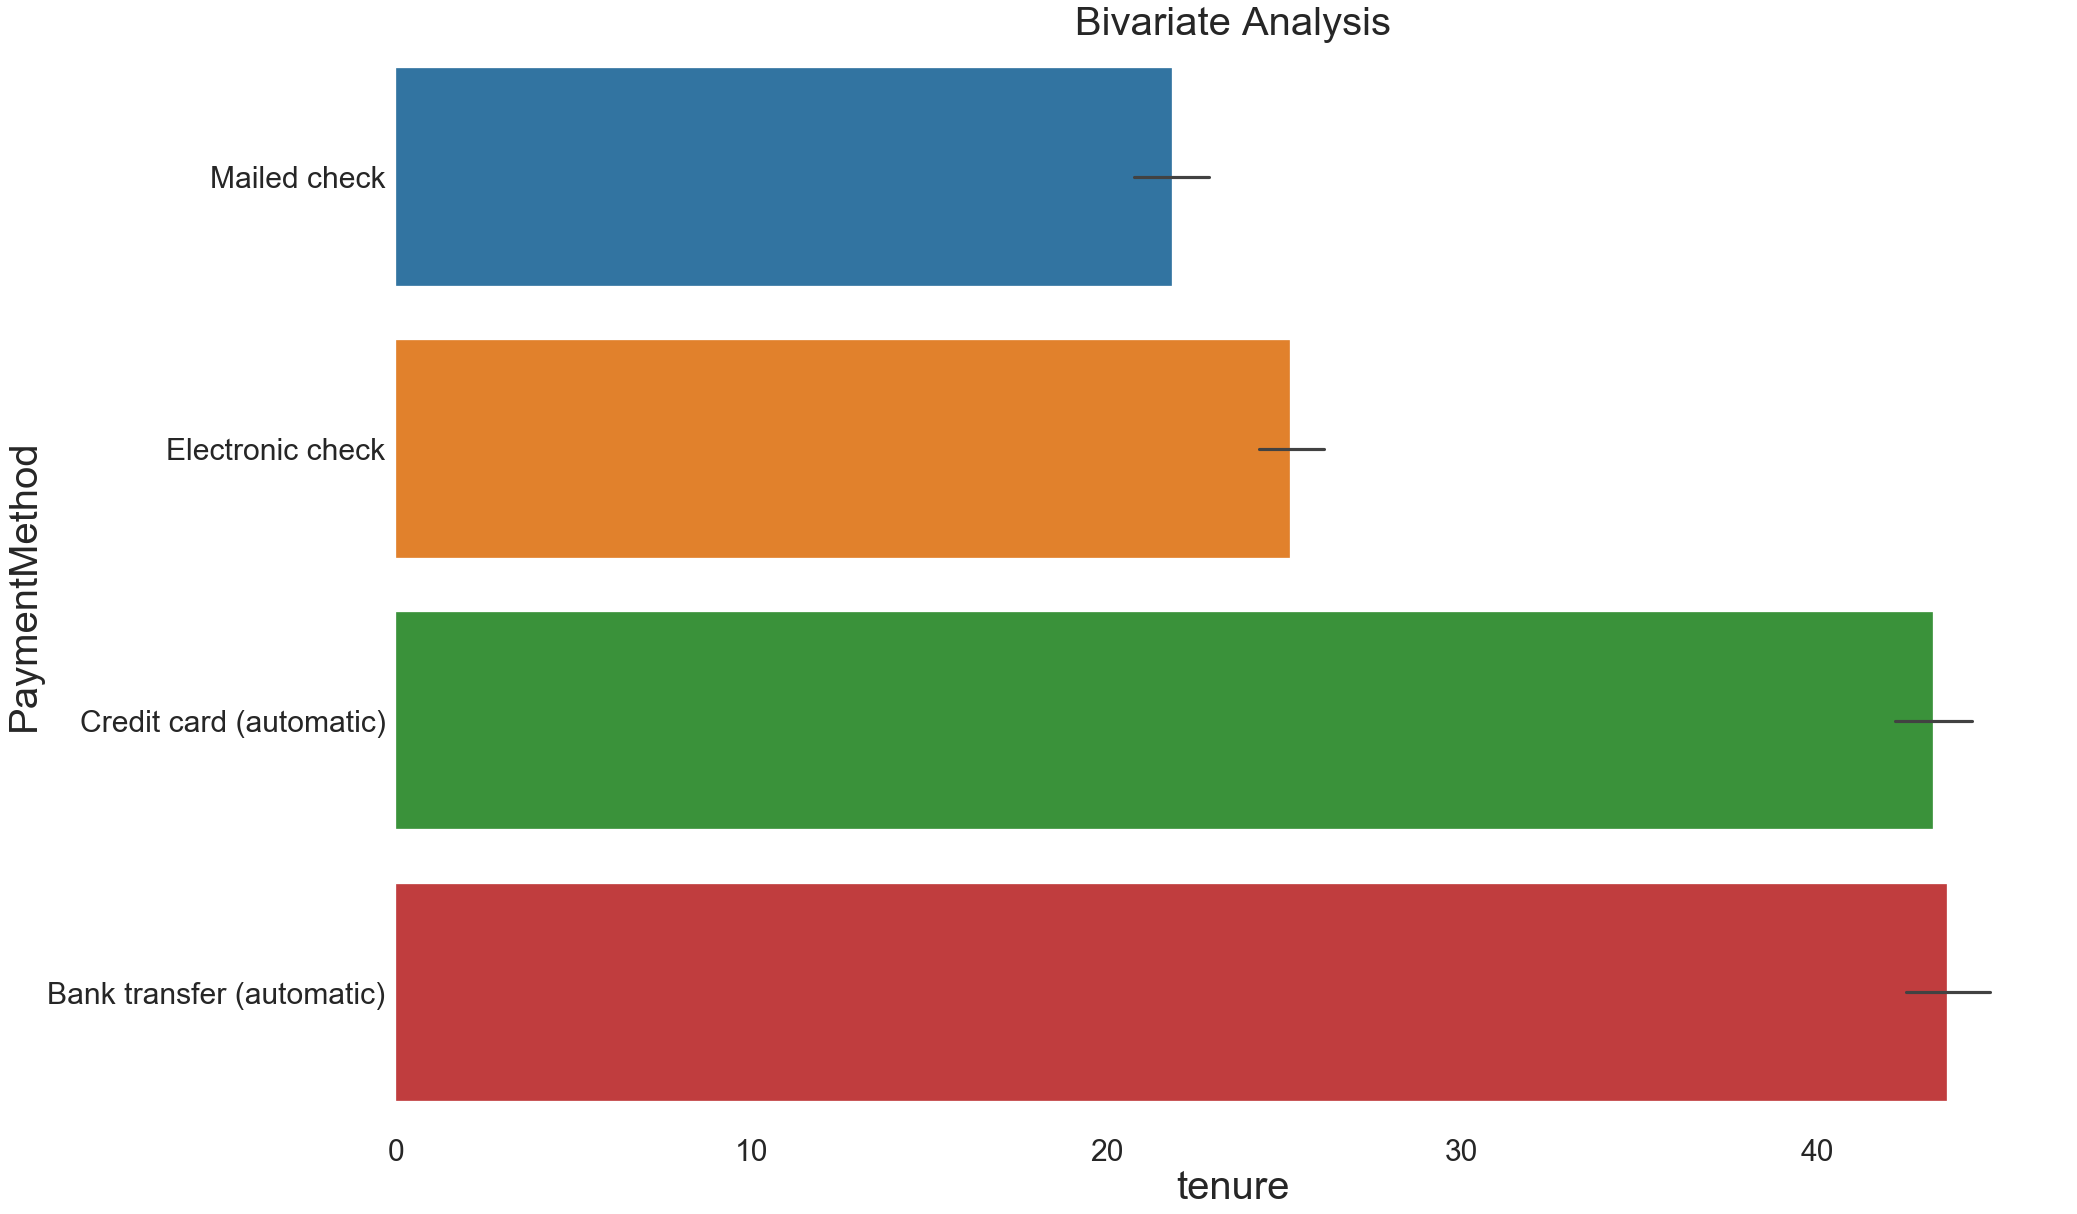

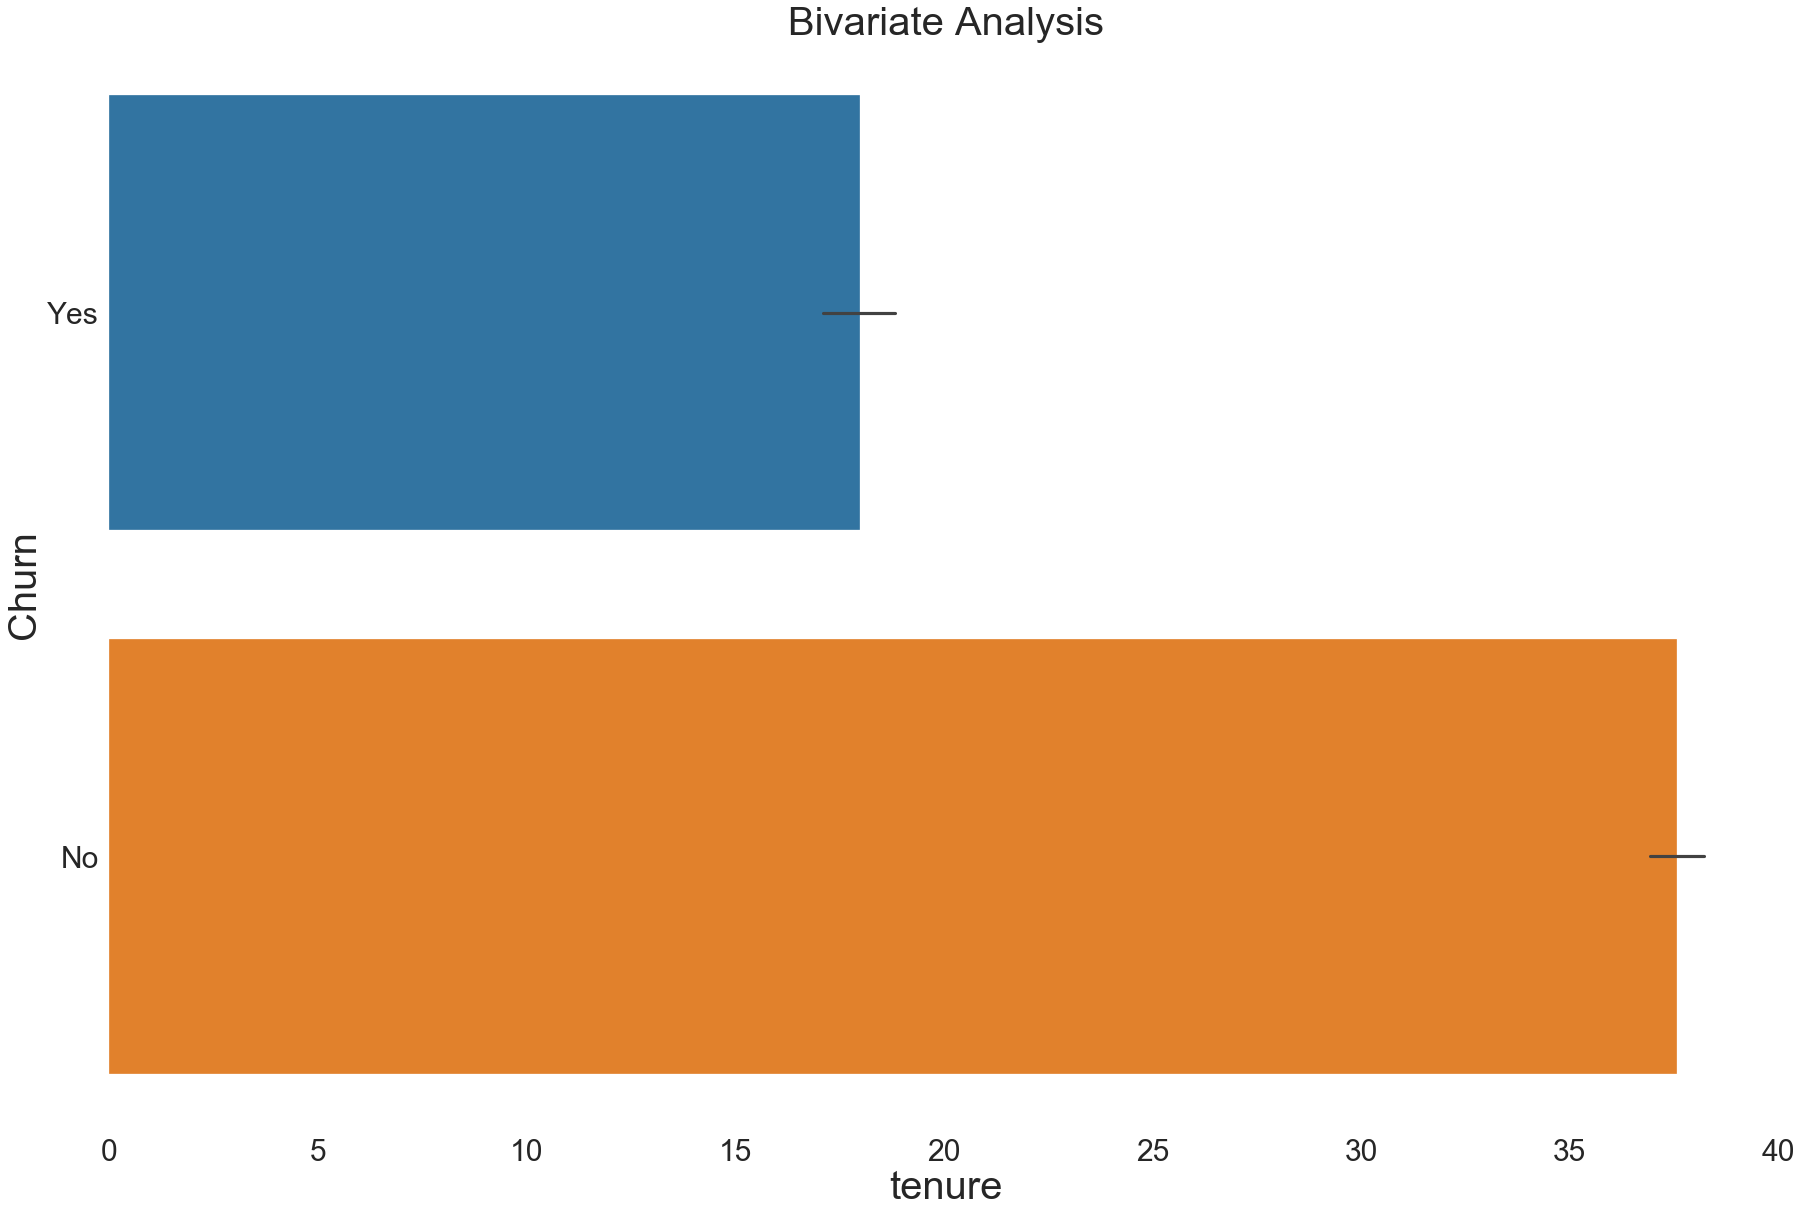

In [32]:
for col in categorical_data:
    Graphical_analysis.Categorical_data_analysis(data).bivarate_analysis_barplot(col,'tenure',None)

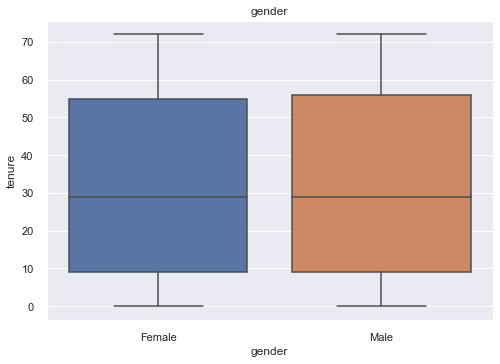

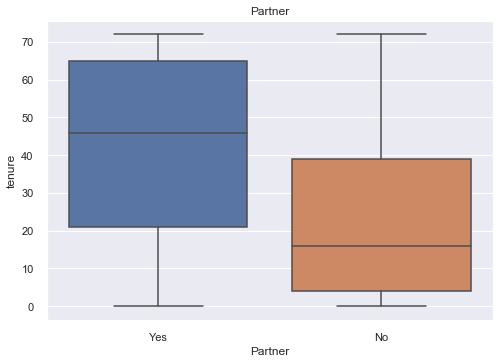

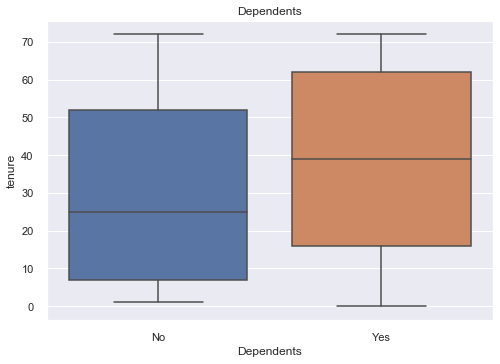

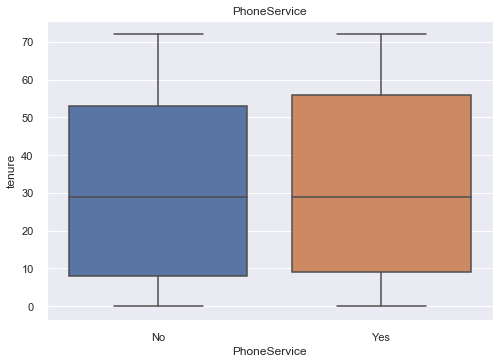

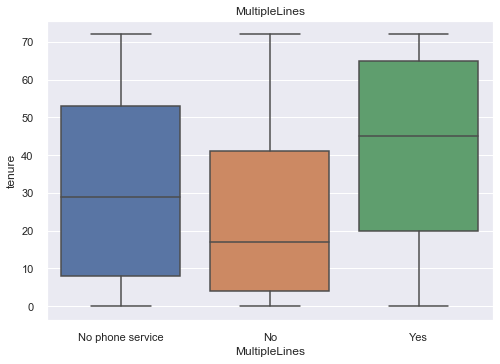

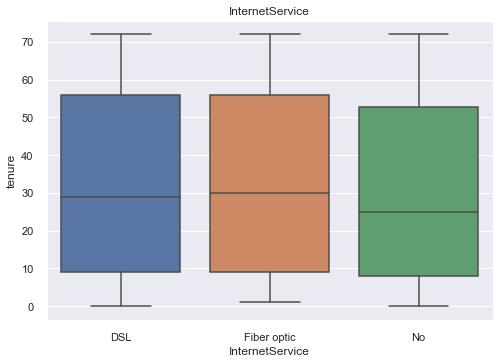

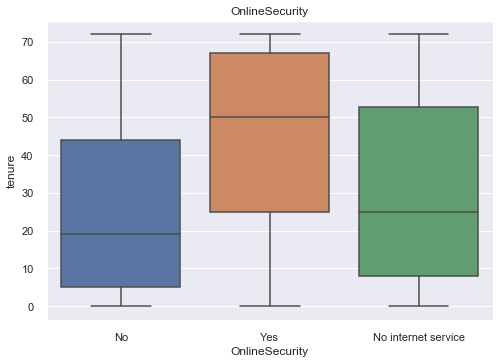

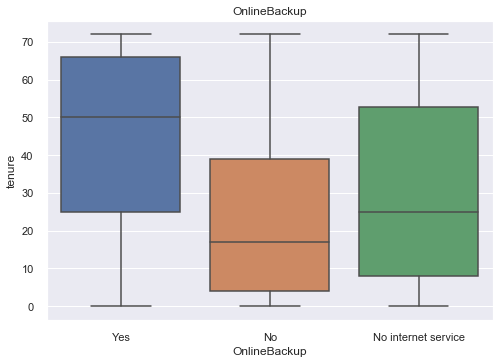

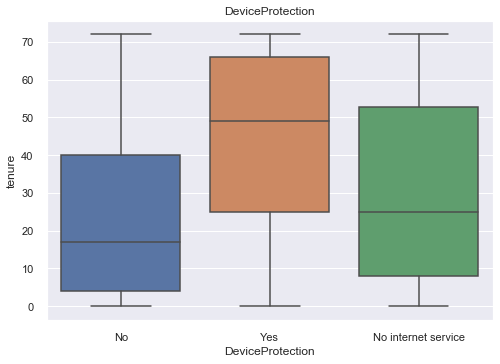

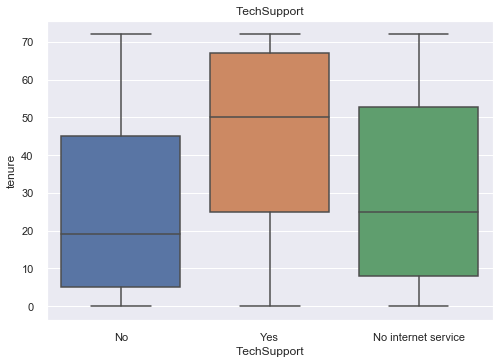

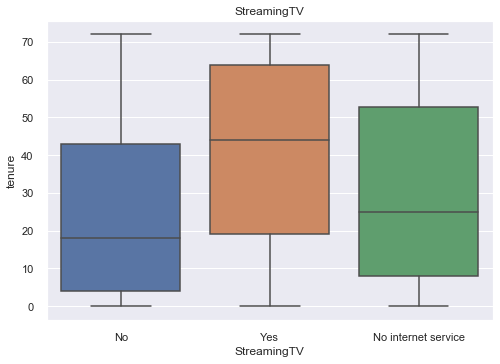

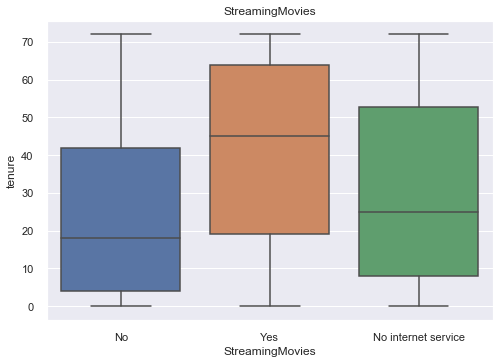

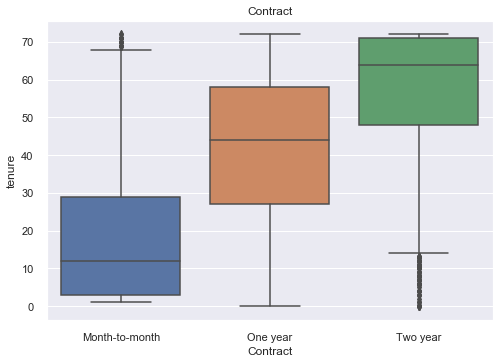

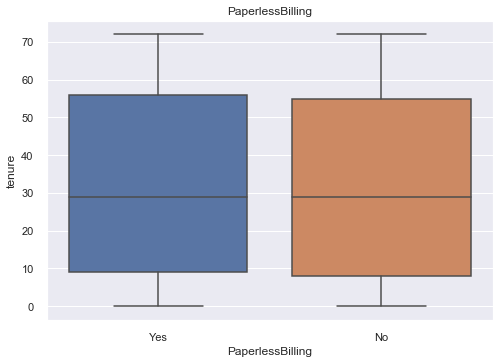

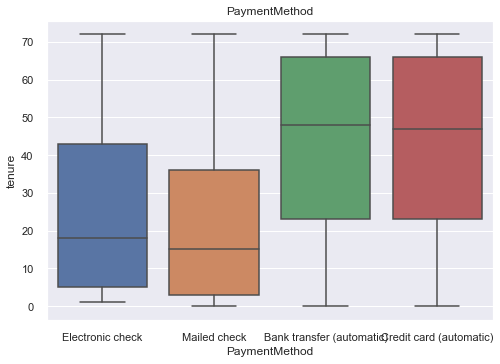

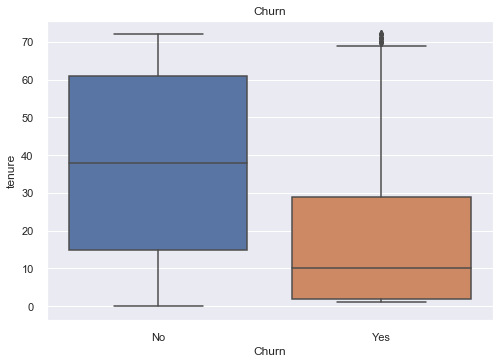

In [34]:
for col in categorical_data:
    Graphical_analysis.Categorical_data_analysis(data).bivariate_analysis_boxplot(col,'tenure')

In [36]:
from sklearn import preprocessing

In [41]:
#performing label encoding
le=preprocessing.LabelEncoder()
for col in data[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
                 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                 'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']]:
        data[col]=le.fit_transform(data[col])

In [42]:
X=data.drop(columns='Churn')
y=data['Churn']

In [43]:

X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)


In [44]:
X.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           29.85         29.85  
1                 0              3           56.95       1889.50  
2                 1              3           53.85        108.15  
3                 0              0           42.30       1840.75  
4                 1              2           70.70        151.65

In [45]:
#scaling the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
a=scaler.fit_transform(X)
X=pd.DataFrame(a,columns=X.columns)
X.head()

gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0 -1.009559      -0.439916  1.034530   -0.654012 -1.277445     -3.054010   
1  0.990532      -0.439916 -0.966622   -0.654012  0.066327      0.327438   
2  0.990532      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   
3  0.990532      -0.439916 -0.966622   -0.654012  0.514251     -3.054010   
4 -1.009559      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0       0.062723        -1.183234       -0.918838      1.242550   
1      -0.991588        -1.183234        1.407321     -1.029919   
2      -0.991588        -1.183234        1.407321      1.242550   
3       0.062723        -1.183234        1.407321     -1.029919   
4      -0.991588         0.172250       -0.918838     -1.029919   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0         -1.027910    -0.925262    -1.113495        -1.121405 -0.828207   
1          1.245111    -0.925262    -1.113495        -1.121405  0.371271   
2         -1.027910    -0.925262    -1.113495        -1.121405 -0.828207   
3          1.245111     1.396299    -1.113495        -1.121405  0.371271   
4         -1.027910    -0.925262    -1.113495        -1.121405 -0.828207   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0          0.829798       0.398558       -1.160323     -0.994971  
1         -1.205113       1.334863       -0.259629     -0.173876  
2          0.829798       1.334863       -0.362660     -0.960399  
3         -1.205113      -1.474052       -0.746535     -0.195400  
4          0.829798       0.398558        0.197365     -0.941193

In [46]:
#performing model selection

from sklearn.model_selection import train_test_split

In [47]:
#splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=20)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [50]:
for index in range(1, 20):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = index)
    sel.fit(X_train, y_train)
    X_train_rfe = sel.transform(X_train)
    X_test_rfe = sel.transform(X_test)
    print('Selected Feature: ', index)
    run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)
    print()

Selected Feature:  1
Accuracy:  0.6479772888573456

Selected Feature:  2
Accuracy:  0.7785663591199432

Selected Feature:  3
Accuracy:  0.7877927608232789

Selected Feature:  4
Accuracy:  0.7885024840312278

Selected Feature:  5
Accuracy:  0.7970191625266146

Selected Feature:  6
Accuracy:  0.801277501774308

Selected Feature:  7
Accuracy:  0.8069552874378992

Selected Feature:  8
Accuracy:  0.8026969481902059

Selected Feature:  9
Accuracy:  0.7984386089425124

Selected Feature:  10
Accuracy:  0.8026969481902059

Selected Feature:  11
Accuracy:  0.8112136266855926

Selected Feature:  12
Accuracy:  0.8161816891412349

Selected Feature:  13
Accuracy:  0.8112136266855926

Selected Feature:  14
Accuracy:  0.8026969481902059

Selected Feature:  15
Accuracy:  0.8119233498935415

Selected Feature:  16
Accuracy:  0.8112136266855926

Selected Feature:  17
Accuracy:  0.8105039034776437

Selected Feature:  18
Accuracy:  0.8097941802696949

Selected Feature:  19
Accuracy:  0.8119233498935415



In [66]:
#selecting optimum features
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0), n_features_to_select = 15)
sel.fit(X_train, y_train)
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)
print('Selected Feature: ', 15)
run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)
print()

Selected Feature:  15
Accuracy:  0.8119233498935415



In [67]:
features =X_train.columns[sel.get_support()]
features

Index(['gender', 'SeniorCitizen', 'Partner', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [68]:
X_train_Sel=X_train[['gender', 'SeniorCitizen', 'Partner', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']]

In [69]:
X_test_Sel=X_test[['gender', 'SeniorCitizen', 'Partner', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']]

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [71]:
model=RandomForestClassifier()

In [72]:
model.fit(X_train_Sel,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
grid_search = GridSearchCV(estimator=model,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [64]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  7.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [75]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 115}

In [76]:
rf=RandomForestClassifier(criterion= 'entropy',max_features='auto',min_samples_leaf=5,min_samples_split=8
                          ,n_estimators=150)

In [77]:
rf.fit(X_train_Sel,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
rf.score(X_train_Sel,y_train)

0.8668796592119276

In [79]:

rf.score(X_test_Sel,y_test)

0.8190205819730305

In [80]:
y_pred=rf.predict(X_test_Sel)

In [81]:
conf_mat=confusion_matrix(y_test,y_pred)

In [82]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [83]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8190205819730305

In [84]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9040451552210724

In [85]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8626570915619389

In [86]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8828663298116673

In [87]:
from sklearn.metrics import roc_auc_score,roc_curve
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7309243117145825

In [88]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

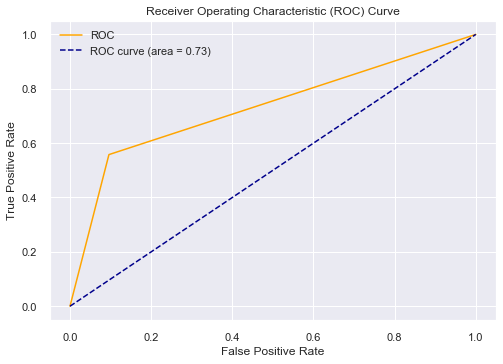

In [89]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()